In [1]:
%matplotlib inline

In [43]:
import os
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage.io as io
from allensdk.api.queries.grid_data_api import GridDataApi
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from nilearn.input_data import NiftiMasker
import seaborn as sns
from nighres.io import io_mesh
from scipy import stats

In [3]:
data_dir = '/home/julia/data/gradients/'

In [6]:
mask_img = nb.load(data_dir + 'allen_atlas/cortex_mask_tight_200um.nii.gz')
mask = np.array(mask_img.dataobj)
aff = mask_img.affine
hdr = mask_img.header

### Fixing up the table extracted from AGEA

In [7]:
df = pd.read_csv(data_dir + "allen_atlas/gene_expression/agea_download.csv")
symb =[]
name = []
for s in df['Gene Symbol Gene Name']:
    split = s.split()
    symb.append(split[0])
    name.append(' '.join(split[1:]))
df_fixed = pd.DataFrame(columns=['Gene Symbol', 'Gene Name', 'Image Series ID', 'Entrez Gene ID', 'NCBI Accession'], 
                       data=zip(symb, name, df['Image Series ID'], df['Entrez Gene ID'], df['NCBI Accession ']))
df_fixed = df_fixed[np.isnan(df_fixed['Image Series ID'])==False]

In [8]:
df_fixed.to_csv(data_dir + "allen_atlas/gene_expression/agea_fixed.csv", float_format='%.0f')

### Download data for all genes in the table

In [39]:
gda = GridDataApi()
no_data = []
for g in range(len(df_fixed)):
    try:
        print(df_fixed.iloc[g]['Image Series ID'])
        os.makedirs(data_dir+'allen_atlas/gene_expression/energy/{:.0f}/'.format(df_fixed.iloc[g]['Image Series ID']))
        gda.download_gene_expression_grid_data(section_data_set_id=int(df_fixed.iloc[g]['Image Series ID']), 
                                                       volume_type=GridDataApi.ENERGY, 
                                                       path=data_dir+'allen_atlas/gene_expression/energy/{:.0f}/'.format(df_fixed.iloc[g]['Image Series ID']))
    except IsADirectoryError:
        no_data.append(df_fixed.iloc[g]['Image Series ID'])
        os.rmdir(data_dir+'allen_atlas/gene_expression/energy/{:.0f}/'.format(df_fixed.iloc[g]['Image Series ID']))

2020-07-22 12:32:09,374 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/958?include=energy


958.0


2020-07-22 12:32:11,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/961?include=energy


961.0


2020-07-22 12:32:12,971 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927828?include=energy


70927828.0


2020-07-22 12:32:15,294 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015205?include=energy


71015205.0


2020-07-22 12:32:17,273 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1148?include=energy


1148.0


2020-07-22 12:32:19,322 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1464?include=energy


1464.0


2020-07-22 12:32:21,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363346?include=energy


74363346.0


2020-07-22 12:32:23,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957923?include=energy


74957923.0


2020-07-22 12:32:25,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079788?include=energy


75079788.0


2020-07-22 12:32:27,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75650863?include=energy


75650863.0


2020-07-22 12:32:29,454 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813929?include=energy


70813929.0


2020-07-22 12:32:31,302 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1942?include=energy


1942.0


2020-07-22 12:32:31,705 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1942/ from http://api.brain-map.org/grid_data/download/1942?include=energy
2020-07-22 12:32:31,716 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371805?include=energy


77371805.0


2020-07-22 12:32:33,758 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587781?include=energy


71587781.0


2020-07-22 12:32:36,127 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129250?include=energy


72129250.0


2020-07-22 12:32:38,198 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081396?include=energy


72081396.0


2020-07-22 12:32:40,528 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1150?include=energy


1150.0


2020-07-22 12:32:40,921 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1150/ from http://api.brain-map.org/grid_data/download/1150?include=energy
2020-07-22 12:32:40,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988461?include=energy


74988461.0


2020-07-22 12:32:43,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357561?include=energy


74357561.0


2020-07-22 12:32:45,038 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1946?include=energy


1946.0


2020-07-22 12:32:46,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015816?include=energy


71015816.0


2020-07-22 12:32:49,155 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436731?include=energy


70436731.0


2020-07-22 12:32:51,372 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819685?include=energy


74819685.0


2020-07-22 12:32:53,420 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1635?include=energy


1635.0


2020-07-22 12:32:55,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249079?include=energy


71249079.0


2020-07-22 12:32:57,512 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1637?include=energy


1637.0


2020-07-22 12:32:59,576 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/3?include=energy


3.0


2020-07-22 12:33:01,406 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934917?include=energy


75934917.0


2020-07-22 12:33:03,226 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2547?include=energy


2547.0


2020-07-22 12:33:05,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988462?include=energy


74988462.0


2020-07-22 12:33:07,290 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272042?include=energy


74272042.0


2020-07-22 12:33:09,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988721?include=energy


74988721.0


2020-07-22 12:33:11,338 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1313?include=energy


1313.0


2020-07-22 12:33:13,196 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358552?include=energy


71358552.0


2020-07-22 12:33:15,306 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144656?include=energy


75144656.0


2020-07-22 12:33:17,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332088?include=energy


77332088.0


2020-07-22 12:33:19,635 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957933?include=energy


74957933.0


2020-07-22 12:33:21,682 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015196?include=energy


71015196.0


2020-07-22 12:33:23,730 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081515?include=energy


72081515.0


2020-07-22 12:33:25,983 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1952?include=energy


1952.0


2020-07-22 12:33:28,030 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293464?include=energy


293464.0


2020-07-22 12:33:28,435 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/293464/ from http://api.brain-map.org/grid_data/download/293464?include=energy
2020-07-22 12:33:28,444 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414569?include=energy


77414569.0


2020-07-22 12:33:30,595 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1591?include=energy


1591.0


2020-07-22 12:33:32,843 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724762?include=energy


74724762.0


2020-07-22 12:33:34,891 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020390?include=energy


71020390.0


2020-07-22 12:33:37,263 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1315?include=energy


1315.0


2020-07-22 12:33:39,206 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743905?include=energy


70743905.0


2020-07-22 12:33:41,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929874?include=energy


73929874.0


2020-07-22 12:33:43,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1954?include=energy


1954.0


2020-07-22 12:33:44,926 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774674?include=energy


75774674.0


2020-07-22 12:33:46,873 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870083?include=energy


67870083.0


2020-07-22 12:33:48,715 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/12?include=energy


12.0


2020-07-22 12:33:50,661 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651168?include=energy


75651168.0


2020-07-22 12:33:52,811 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929875?include=energy


73929875.0


2020-07-22 12:33:54,859 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929885?include=energy


73929885.0


2020-07-22 12:33:56,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231999?include=energy


70231999.0


2020-07-22 12:33:58,853 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581399?include=energy


74581399.0


2020-07-22 12:34:00,799 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718050?include=energy


73718050.0


2020-07-22 12:34:02,846 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75233110?include=energy


75233110.0


2020-07-22 12:34:04,997 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774673?include=energy


75774673.0


2020-07-22 12:34:07,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581373?include=energy


74581373.0


2020-07-22 12:34:09,061 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324211?include=energy


324211.0


2020-07-22 12:34:10,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743908?include=energy


70743908.0


2020-07-22 12:34:13,087 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1643?include=energy


1643.0


2020-07-22 12:34:14,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/14?include=energy


14.0


2020-07-22 12:34:15,306 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/14/ from http://api.brain-map.org/grid_data/download/14?include=energy
2020-07-22 12:34:15,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2103?include=energy


2103.0


2020-07-22 12:34:15,744 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2103/ from http://api.brain-map.org/grid_data/download/2103?include=energy
2020-07-22 12:34:15,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77866852?include=energy


77866852.0


2020-07-22 12:34:17,593 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634224?include=energy


70634224.0


2020-07-22 12:34:19,742 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658242?include=energy


74658242.0


2020-07-22 12:34:21,893 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1958?include=energy


1958.0


2020-07-22 12:34:22,272 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1958/ from http://api.brain-map.org/grid_data/download/1958?include=energy
2020-07-22 12:34:22,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276072?include=energy


276072.0


2020-07-22 12:34:22,707 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/276072/ from http://api.brain-map.org/grid_data/download/276072?include=energy
2020-07-22 12:34:22,716 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1960?include=energy


1960.0


2020-07-22 12:34:24,555 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340486?include=energy


77340486.0


2020-07-22 12:34:26,921 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1962?include=energy


1962.0


2020-07-22 12:34:27,314 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1962/ from http://api.brain-map.org/grid_data/download/1962?include=energy
2020-07-22 12:34:27,324 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227165?include=energy


227165.0


2020-07-22 12:34:29,267 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340125?include=energy


72340125.0


2020-07-22 12:34:31,168 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743884?include=energy


70743884.0


2020-07-22 12:34:33,333 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929886?include=energy


73929886.0


2020-07-22 12:34:35,615 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332080?include=energy


77332080.0


2020-07-22 12:34:37,458 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988362?include=energy


74988362.0


2020-07-22 12:34:39,506 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74818623?include=energy


74818623.0


2020-07-22 12:34:41,553 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1992?include=energy


1992.0


2020-07-22 12:34:43,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007750?include=energy


72007750.0


2020-07-22 12:34:45,547 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293027?include=energy


293027.0


2020-07-22 12:34:47,493 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1647?include=energy


1647.0


2020-07-22 12:34:49,541 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743898?include=energy


70743898.0


2020-07-22 12:34:51,691 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1964?include=energy


1964.0


2020-07-22 12:34:53,841 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869146?include=energy


77869146.0


2020-07-22 12:34:56,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651167?include=energy


75651167.0


2020-07-22 12:34:58,454 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636038?include=energy


73636038.0


2020-07-22 12:35:00,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930821?include=energy


73930821.0


2020-07-22 12:35:02,312 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743888?include=energy


70743888.0


2020-07-22 12:35:04,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080175?include=energy


72080175.0


2020-07-22 12:35:06,540 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774665?include=energy


75774665.0


2020-07-22 12:35:08,587 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080185?include=energy


72080185.0


2020-07-22 12:35:10,737 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773705?include=energy


75773705.0


2020-07-22 12:35:12,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70805895?include=energy


70805895.0


2020-07-22 12:35:14,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340126?include=energy


72340126.0


2020-07-22 12:35:16,983 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1649?include=energy


1649.0


2020-07-22 12:35:19,032 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927829?include=energy


70927829.0


2020-07-22 12:35:20,977 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635774?include=energy


73635774.0


2020-07-22 12:35:23,025 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920515?include=energy


71920515.0


2020-07-22 12:35:25,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1651?include=energy


1651.0


2020-07-22 12:35:27,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583139?include=energy


74583139.0


2020-07-22 12:35:29,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774106?include=energy


75774106.0


2020-07-22 12:35:31,115 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512188?include=energy


73512188.0


2020-07-22 12:35:33,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920509?include=energy


71920509.0


2020-07-22 12:35:35,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357582?include=energy


74357582.0


2020-07-22 12:35:38,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836805?include=energy


71836805.0


2020-07-22 12:35:40,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988657?include=energy


74988657.0


2020-07-22 12:35:42,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931408?include=energy


73931408.0


2020-07-22 12:35:44,324 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634118?include=energy


70634118.0


2020-07-22 12:35:46,679 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774668?include=energy


75774668.0


2020-07-22 12:35:48,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015195?include=energy


71015195.0


2020-07-22 12:35:50,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773704?include=energy


75773704.0


2020-07-22 12:35:53,030 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907495?include=energy


73907495.0


2020-07-22 12:35:54,871 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773702?include=energy


75773702.0


2020-07-22 12:35:56,920 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930854?include=energy


73930854.0


2020-07-22 12:35:58,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773703?include=energy


75773703.0


2020-07-22 12:36:00,605 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587888?include=energy


71587888.0


2020-07-22 12:36:02,859 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357580?include=energy


74357580.0


2020-07-22 12:36:04,805 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70431430?include=energy


70431430.0


2020-07-22 12:36:07,057 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817984?include=energy


73817984.0


2020-07-22 12:36:09,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774685?include=energy


75774685.0


2020-07-22 12:36:11,460 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425569?include=energy


74425569.0


2020-07-22 12:36:13,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817933?include=energy


73817933.0


2020-07-22 12:36:15,966 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/83158?include=energy


83158.0


2020-07-22 12:36:17,809 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1968?include=energy


1968.0


2020-07-22 12:36:19,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280584?include=energy


77280584.0


2020-07-22 12:36:21,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047829?include=energy


74047829.0


2020-07-22 12:36:23,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819330?include=energy


74819330.0


2020-07-22 12:36:25,182 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724511?include=energy


74724511.0


2020-07-22 12:36:27,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276271?include=energy


276271.0


2020-07-22 12:36:29,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670711?include=energy


71670711.0


2020-07-22 12:36:31,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020430?include=energy


71020430.0


2020-07-22 12:36:33,104 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016632?include=energy


71016632.0


2020-07-22 12:36:35,423 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67850946?include=energy


67850946.0


2020-07-22 12:36:37,368 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817441?include=energy


73817441.0


2020-07-22 12:36:39,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272038?include=energy


74272038.0


2020-07-22 12:36:41,567 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425517?include=energy


74425517.0


2020-07-22 12:36:43,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276273?include=energy


276273.0


2020-07-22 12:36:45,662 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560266?include=energy


70560266.0


2020-07-22 12:36:47,915 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/31?include=energy


31.0


2020-07-22 12:36:49,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819241?include=energy


74819241.0


2020-07-22 12:36:51,806 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007932?include=energy


72007932.0


2020-07-22 12:36:54,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363334?include=energy


74363334.0


2020-07-22 12:36:55,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813926?include=energy


70813926.0


2020-07-22 12:36:57,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70612725?include=energy


70612725.0


2020-07-22 12:37:00,175 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2004?include=energy


2004.0


2020-07-22 12:37:00,607 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2004/ from http://api.brain-map.org/grid_data/download/2004?include=energy
2020-07-22 12:37:00,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276069?include=energy


276069.0


2020-07-22 12:37:02,456 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958537?include=energy


74958537.0


2020-07-22 12:37:04,299 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340482?include=energy


77340482.0


2020-07-22 12:37:06,142 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670712?include=energy


71670712.0


2020-07-22 12:37:08,087 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1653?include=energy


1653.0


2020-07-22 12:37:10,070 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724774?include=energy


74724774.0


2020-07-22 12:37:12,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047901?include=energy


74047901.0


2020-07-22 12:37:14,231 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293038?include=energy


293038.0


2020-07-22 12:37:16,175 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992709?include=energy


73992709.0


2020-07-22 12:37:18,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1466?include=energy


1466.0


2020-07-22 12:37:20,253 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774671?include=energy


75774671.0


2020-07-22 12:37:22,288 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743885?include=energy


70743885.0


2020-07-22 12:37:24,303 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581370?include=energy


74581370.0


2020-07-22 12:37:26,417 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925715?include=energy


73925715.0


2020-07-22 12:37:28,465 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272052?include=energy


74272052.0


2020-07-22 12:37:30,366 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670713?include=energy


71670713.0


2020-07-22 12:37:32,459 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1655?include=energy


1655.0


2020-07-22 12:37:34,622 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670714?include=energy


71670714.0


2020-07-22 12:37:36,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724775?include=energy


74724775.0


2020-07-22 12:37:38,603 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/35?include=energy


35.0


2020-07-22 12:37:40,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/37?include=energy


37.0


2020-07-22 12:37:42,596 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988755?include=energy


74988755.0


2020-07-22 12:37:44,746 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249081?include=energy


71249081.0


2020-07-22 12:37:46,795 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/39?include=energy


39.0


2020-07-22 12:37:48,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128753?include=energy


72128753.0


2020-07-22 12:37:50,583 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869820?include=energy


77869820.0


2020-07-22 12:37:52,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249082?include=energy


71249082.0


2020-07-22 12:37:54,886 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356084?include=energy


356084.0


2020-07-22 12:37:56,728 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340484?include=energy


77340484.0


2020-07-22 12:37:58,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293468?include=energy


293468.0


2020-07-22 12:38:00,618 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015800?include=energy


71015800.0


2020-07-22 12:38:03,250 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128754?include=energy


72128754.0


2020-07-22 12:38:05,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249083?include=energy


71249083.0


2020-07-22 12:38:07,274 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1978?include=energy


1978.0


2020-07-22 12:38:09,322 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817427?include=energy


73817427.0


2020-07-22 12:38:11,678 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771233?include=energy


73771233.0


2020-07-22 12:38:13,726 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771234?include=energy


73771234.0


2020-07-22 12:38:14,129 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73771234/ from http://api.brain-map.org/grid_data/download/73771234?include=energy
2020-07-22 12:38:14,138 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283796?include=energy


72283796.0


2020-07-22 12:38:16,388 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581400?include=energy


74581400.0


2020-07-22 12:38:18,419 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928306?include=energy


70928306.0


2020-07-22 12:38:20,791 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249084?include=energy


71249084.0


2020-07-22 12:38:22,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276269?include=energy


276269.0


2020-07-22 12:38:23,221 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/276269/ from http://api.brain-map.org/grid_data/download/276269?include=energy
2020-07-22 12:38:23,231 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414919?include=energy


77414919.0


2020-07-22 12:38:25,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651226?include=energy


75651226.0


2020-07-22 12:38:27,550 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958547?include=energy


74958547.0


2020-07-22 12:38:29,597 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363347?include=energy


74363347.0


2020-07-22 12:38:31,437 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081003?include=energy


75081003.0


2020-07-22 12:38:33,503 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70613978?include=energy


70613978.0


2020-07-22 12:38:35,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929896?include=energy


73929896.0


2020-07-22 12:38:37,994 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988741?include=energy


74988741.0


2020-07-22 12:38:40,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/876?include=energy


876.0


2020-07-22 12:38:42,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/870?include=energy


870.0


2020-07-22 12:38:44,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043137?include=energy


75043137.0


2020-07-22 12:38:46,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1980?include=energy


1980.0


2020-07-22 12:38:48,748 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717582?include=energy


71717582.0


2020-07-22 12:38:51,014 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521828?include=energy


73521828.0


2020-07-22 12:38:53,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047840?include=energy


74047840.0


2020-07-22 12:38:55,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744326?include=energy


70744326.0


2020-07-22 12:38:57,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129254?include=energy


72129254.0


2020-07-22 12:38:59,818 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324214?include=energy


324214.0


2020-07-22 12:39:01,850 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128755?include=energy


72128755.0


2020-07-22 12:39:03,898 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67779872?include=energy


67779872.0


2020-07-22 12:39:06,150 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670715?include=energy


71670715.0


2020-07-22 12:39:08,002 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047922?include=energy


74047922.0


2020-07-22 12:39:10,326 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819247?include=energy


74819247.0


2020-07-22 12:39:12,365 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1982?include=energy


1982.0


2020-07-22 12:39:14,244 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047400?include=energy


74047400.0


2020-07-22 12:39:16,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750013?include=energy


74750013.0


2020-07-22 12:39:18,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592537?include=energy


73592537.0


2020-07-22 12:39:20,455 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750011?include=energy


74750011.0


2020-07-22 12:39:22,538 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080180?include=energy


75080180.0


2020-07-22 12:39:24,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/322956?include=energy


322956.0


2020-07-22 12:39:26,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043136?include=energy


75043136.0


2020-07-22 12:39:28,682 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085749?include=energy


76085749.0


2020-07-22 12:39:30,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1317?include=energy


1317.0


2020-07-22 12:39:32,644 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008306?include=energy


72008306.0


2020-07-22 12:39:34,931 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363348?include=energy


74363348.0


2020-07-22 12:39:36,990 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924364?include=energy


71924364.0


2020-07-22 12:39:38,820 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819465?include=energy


74819465.0


2020-07-22 12:39:40,868 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1319?include=energy


1319.0


2020-07-22 12:39:42,714 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635776?include=energy


73635776.0


2020-07-22 12:39:44,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363338?include=energy


74363338.0


2020-07-22 12:39:46,704 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1321?include=energy


1321.0


2020-07-22 12:39:48,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819246?include=energy


74819246.0


2020-07-22 12:39:50,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425566?include=energy


74425566.0


2020-07-22 12:39:52,647 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988582?include=energy


74988582.0


2020-07-22 12:39:54,487 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724776?include=energy


74724776.0


2020-07-22 12:39:56,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76097699?include=energy


76097699.0


2020-07-22 12:39:58,788 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272053?include=energy


74272053.0


2020-07-22 12:40:00,948 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72079987?include=energy


72079987.0


2020-07-22 12:40:02,781 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988742?include=energy


74988742.0


2020-07-22 12:40:04,829 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077452?include=energy


72077452.0


2020-07-22 12:40:06,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249739?include=energy


71249739.0


2020-07-22 12:40:09,027 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641113?include=energy


74641113.0


2020-07-22 12:40:10,973 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043138?include=energy


75043138.0


2020-07-22 12:40:12,919 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249740?include=energy


71249740.0


2020-07-22 12:40:15,069 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920521?include=energy


71920521.0


2020-07-22 12:40:17,428 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015388?include=energy


71015388.0


2020-07-22 12:40:19,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249741?include=energy


71249741.0


2020-07-22 12:40:21,520 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301086?include=energy


70301086.0


2020-07-22 12:40:23,466 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276076?include=energy


276076.0


2020-07-22 12:40:23,870 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/276076/ from http://api.brain-map.org/grid_data/download/276076?include=energy
2020-07-22 12:40:23,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819486?include=energy


74819486.0


2020-07-22 12:40:25,720 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436739?include=energy


70436739.0


2020-07-22 12:40:28,074 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340182?include=energy


72340182.0


2020-07-22 12:40:30,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743869?include=energy


70743869.0


2020-07-22 12:40:32,357 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732151?include=energy


73732151.0


2020-07-22 12:40:34,320 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/322963?include=energy


322963.0


2020-07-22 12:40:36,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1986?include=energy


1986.0


2020-07-22 12:40:38,210 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1233?include=energy


1233.0


2020-07-22 12:40:40,026 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016692?include=energy


71016692.0


2020-07-22 12:40:42,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641323?include=energy


74641323.0


2020-07-22 12:40:44,289 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920518?include=energy


71920518.0


2020-07-22 12:40:46,404 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717144?include=energy


71717144.0


2020-07-22 12:40:48,660 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340183?include=energy


72340183.0


2020-07-22 12:40:50,709 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1988?include=energy


1988.0


2020-07-22 12:40:52,547 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128773?include=energy


72128773.0


2020-07-22 12:40:54,494 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635806?include=energy


73635806.0


2020-07-22 12:40:56,644 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128774?include=energy


72128774.0


2020-07-22 12:40:58,806 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280311?include=energy


77280311.0


2020-07-22 12:41:00,841 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988610?include=energy


75988610.0


2020-07-22 12:41:02,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925717?include=energy


73925717.0


2020-07-22 12:41:05,040 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249742?include=energy


71249742.0


2020-07-22 12:41:07,193 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988743?include=energy


74988743.0


2020-07-22 12:41:09,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927827?include=energy


70927827.0


2020-07-22 12:41:11,301 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080656?include=energy


75080656.0


2020-07-22 12:41:13,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356855?include=energy


356855.0


2020-07-22 12:41:15,359 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128747?include=energy


72128747.0


2020-07-22 12:41:17,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732150?include=energy


73732150.0


2020-07-22 12:41:19,167 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249743?include=energy


71249743.0


2020-07-22 12:41:21,322 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008118?include=energy


72008118.0


2020-07-22 12:41:23,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651150?include=energy


75651150.0


2020-07-22 12:41:25,725 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750012?include=energy


74750012.0


2020-07-22 12:41:27,670 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/45841?include=energy


45841.0


2020-07-22 12:41:29,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1990?include=energy


1990.0


2020-07-22 12:41:31,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560278?include=energy


70560278.0


2020-07-22 12:41:33,713 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020445?include=energy


71020445.0


2020-07-22 12:41:36,237 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819651?include=energy


74819651.0


2020-07-22 12:41:38,526 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931622?include=energy


73931622.0


2020-07-22 12:41:40,778 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958576?include=energy


74958576.0


2020-07-22 12:41:43,032 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988744?include=energy


74988744.0


2020-07-22 12:41:45,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363339?include=energy


74363339.0


2020-07-22 12:41:47,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043148?include=energy


75043148.0


2020-07-22 12:41:49,156 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920513?include=energy


71920513.0


2020-07-22 12:41:53,681 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958606?include=energy


74958606.0


2020-07-22 12:41:55,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249744?include=energy


71249744.0


2020-07-22 12:41:57,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135828?include=energy


76135828.0


2020-07-22 12:41:59,927 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931623?include=energy


73931623.0


2020-07-22 12:42:01,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774112?include=energy


75774112.0


2020-07-22 12:42:04,037 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581410?include=energy


74581410.0


2020-07-22 12:42:06,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129249?include=energy


72129249.0


2020-07-22 12:42:08,130 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007937?include=energy


72007937.0


2020-07-22 12:42:10,442 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/51?include=energy


51.0


2020-07-22 12:42:12,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924353?include=energy


71924353.0


2020-07-22 12:42:14,365 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587898?include=energy


71587898.0


2020-07-22 12:42:16,862 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635826?include=energy


73635826.0


2020-07-22 12:42:18,871 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881503?include=energy


74881503.0


2020-07-22 12:42:20,920 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436746?include=energy


70436746.0


2020-07-22 12:42:23,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1323?include=energy


1323.0


2020-07-22 12:42:23,575 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1323/ from http://api.brain-map.org/grid_data/download/1323?include=energy
2020-07-22 12:42:23,587 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749783?include=energy


75749783.0


2020-07-22 12:42:25,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301085?include=energy


70301085.0


2020-07-22 12:42:28,155 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634139?include=energy


70634139.0


2020-07-22 12:42:30,514 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988591?include=energy


74988591.0


2020-07-22 12:42:34,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560288?include=energy


70560288.0


2020-07-22 12:42:37,508 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249745?include=energy


71249745.0


2020-07-22 12:42:39,756 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081005?include=energy


75081005.0


2020-07-22 12:42:41,724 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249746?include=energy


71249746.0


2020-07-22 12:42:43,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043149?include=energy


75043149.0


2020-07-22 12:42:45,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988537?include=energy


75988537.0


2020-07-22 12:42:47,707 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717154?include=energy


71717154.0


2020-07-22 12:42:49,898 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1994?include=energy


1994.0


2020-07-22 12:42:51,946 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1996?include=energy


1996.0


2020-07-22 12:42:53,793 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988509?include=energy


74988509.0


2020-07-22 12:42:55,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080269?include=energy


75080269.0


2020-07-22 12:42:58,092 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249747?include=energy


71249747.0


2020-07-22 12:43:00,138 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280434?include=energy


77280434.0


2020-07-22 12:43:02,186 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080279?include=energy


75080279.0


2020-07-22 12:43:04,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670716?include=energy


71670716.0


2020-07-22 12:43:06,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636151?include=energy


73636151.0


2020-07-22 12:43:08,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249748?include=energy


71249748.0


2020-07-22 12:43:10,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249749?include=energy


71249749.0


2020-07-22 12:43:12,120 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249750?include=energy


71249750.0


2020-07-22 12:43:14,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283797?include=energy


72283797.0


2020-07-22 12:43:16,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340458?include=energy


77340458.0


2020-07-22 12:43:18,243 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988547?include=energy


75988547.0


2020-07-22 12:43:19,972 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043150?include=energy


75043150.0


2020-07-22 12:43:22,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128775?include=energy


72128775.0


2020-07-22 12:43:24,112 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363337?include=energy


74363337.0


2020-07-22 12:43:26,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1998?include=energy


1998.0


2020-07-22 12:43:27,902 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750014?include=energy


74750014.0


2020-07-22 12:43:29,938 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924279?include=energy


71924279.0


2020-07-22 12:43:31,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041574?include=energy


75041574.0


2020-07-22 12:43:33,933 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560265?include=energy


70560265.0


2020-07-22 12:43:35,788 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340194?include=energy


72340194.0


2020-07-22 12:43:37,446 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250292?include=energy


71250292.0


2020-07-22 12:43:38,996 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363335?include=energy


74363335.0


2020-07-22 12:43:40,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874616?include=energy


77874616.0


2020-07-22 12:43:42,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042236?include=energy


75042236.0


2020-07-22 12:43:44,358 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/55?include=energy


55.0


2020-07-22 12:43:46,186 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924374?include=energy


71924374.0


2020-07-22 12:43:48,277 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144634?include=energy


75144634.0


2020-07-22 12:43:50,223 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670719?include=energy


71670719.0


2020-07-22 12:43:52,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/57?include=energy


57.0


2020-07-22 12:43:53,895 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924290?include=energy


71924290.0


2020-07-22 12:43:55,749 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042237?include=energy


75042237.0


2020-07-22 12:43:57,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128776?include=energy


72128776.0


2020-07-22 12:43:59,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670720?include=energy


71670720.0


2020-07-22 12:44:01,887 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717165?include=energy


71717165.0


2020-07-22 12:44:04,039 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042238?include=energy


75042238.0


2020-07-22 12:44:06,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250305?include=energy


71250305.0


2020-07-22 12:44:08,132 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881514?include=energy


74881514.0


2020-07-22 12:44:10,182 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283798?include=energy


72283798.0


2020-07-22 12:44:12,742 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958626?include=energy


74958626.0


2020-07-22 12:44:14,996 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278971?include=energy


77278971.0


2020-07-22 12:44:15,398 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77278971/ from http://api.brain-map.org/grid_data/download/77278971?include=energy
2020-07-22 12:44:15,404 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144644?include=energy


75144644.0


2020-07-22 12:44:17,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930833?include=energy


73930833.0


2020-07-22 12:44:19,091 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925718?include=energy


73925718.0


2020-07-22 12:44:21,136 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042239?include=energy


75042239.0


2020-07-22 12:44:23,186 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280438?include=energy


77280438.0


2020-07-22 12:44:25,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144645?include=energy


75144645.0


2020-07-22 12:44:27,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250306?include=energy


71250306.0


2020-07-22 12:44:29,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73818758?include=energy


73818758.0


2020-07-22 12:44:30,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340208?include=energy


72340208.0


2020-07-22 12:44:33,018 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651161?include=energy


75651161.0


2020-07-22 12:44:34,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819036?include=energy


74819036.0


2020-07-22 12:44:36,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042240?include=energy


75042240.0


2020-07-22 12:44:38,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636150?include=energy


73636150.0


2020-07-22 12:44:41,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340221?include=energy


72340221.0


2020-07-22 12:44:43,156 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047747?include=energy


74047747.0


2020-07-22 12:44:45,102 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587930?include=energy


71587930.0


2020-07-22 12:44:47,351 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2006?include=energy


2006.0


2020-07-22 12:44:49,244 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724786?include=energy


74724786.0


2020-07-22 12:44:51,143 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080134?include=energy


72080134.0


2020-07-22 12:44:53,198 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581420?include=energy


74581420.0


2020-07-22 12:44:55,327 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355891?include=energy


355891.0


2020-07-22 12:44:55,746 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/355891/ from http://api.brain-map.org/grid_data/download/355891?include=energy
2020-07-22 12:44:55,757 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/275872?include=energy


275872.0


2020-07-22 12:44:56,156 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/275872/ from http://api.brain-map.org/grid_data/download/275872?include=energy
2020-07-22 12:44:56,166 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007746?include=energy


72007746.0


2020-07-22 12:44:58,415 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2008?include=energy


2008.0


2020-07-22 12:44:58,827 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2008/ from http://api.brain-map.org/grid_data/download/2008?include=energy
2020-07-22 12:44:58,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2010?include=energy


2010.0


2020-07-22 12:45:00,639 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988454?include=energy


74988454.0


2020-07-22 12:45:02,818 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881744?include=energy


74881744.0


2020-07-22 12:45:04,865 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641317?include=energy


74641317.0


2020-07-22 12:45:07,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636090?include=energy


73636090.0


2020-07-22 12:45:09,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72079931?include=energy


72079931.0


2020-07-22 12:45:11,215 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881353?include=energy


74881353.0


2020-07-22 12:45:13,464 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67881549?include=energy


67881549.0


2020-07-22 12:45:15,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749413?include=energy


75749413.0


2020-07-22 12:45:17,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356086?include=energy


356086.0


2020-07-22 12:45:19,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70616004?include=energy


70616004.0


2020-07-22 12:45:21,777 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744514?include=energy


70744514.0


2020-07-22 12:45:24,131 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047923?include=energy


74047923.0


2020-07-22 12:45:26,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2012?include=energy


2012.0


2020-07-22 12:45:28,111 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636039?include=energy


73636039.0


2020-07-22 12:45:30,158 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992943?include=energy


73992943.0


2020-07-22 12:45:32,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1659?include=energy


1659.0


2020-07-22 12:45:34,306 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924375?include=energy


71924375.0


2020-07-22 12:45:36,277 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881515?include=energy


74881515.0


2020-07-22 12:45:38,301 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081416?include=energy


72081416.0


2020-07-22 12:45:40,516 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227161?include=energy


227161.0


2020-07-22 12:45:42,550 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836840?include=energy


71836840.0


2020-07-22 12:45:44,598 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655500?include=energy


655500.0


2020-07-22 12:45:45,002 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/655500/ from http://api.brain-map.org/grid_data/download/655500?include=energy
2020-07-22 12:45:45,013 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869798?include=energy


77869798.0


2020-07-22 12:45:47,056 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930838?include=energy


73930838.0


2020-07-22 12:45:49,309 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924089?include=energy


71924089.0


2020-07-22 12:45:51,324 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512499?include=energy


73512499.0


2020-07-22 12:45:53,533 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301082?include=energy


70301082.0


2020-07-22 12:45:55,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135819?include=energy


76135819.0


2020-07-22 12:45:57,399 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293473?include=energy


293473.0


2020-07-22 12:45:57,802 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/293473/ from http://api.brain-map.org/grid_data/download/293473?include=energy
2020-07-22 12:45:57,811 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042266?include=energy


75042266.0


2020-07-22 12:45:59,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931635?include=energy


73931635.0


2020-07-22 12:46:01,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836810?include=energy


71836810.0


2020-07-22 12:46:03,645 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/60?include=energy


60.0


2020-07-22 12:46:05,693 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881516?include=energy


74881516.0


2020-07-22 12:46:07,751 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/62?include=energy


62.0


2020-07-22 12:46:09,789 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/64?include=energy


64.0


2020-07-22 12:46:11,632 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321206?include=energy


321206.0


2020-07-22 12:46:13,475 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67?include=energy


67.0


2020-07-22 12:46:15,301 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250307?include=energy


71250307.0


2020-07-22 12:46:17,162 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2014?include=energy


2014.0


2020-07-22 12:46:17,566 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2014/ from http://api.brain-map.org/grid_data/download/2014?include=energy
2020-07-22 12:46:17,608 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988760?include=energy


74988760.0


2020-07-22 12:46:19,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930820?include=energy


73930820.0


2020-07-22 12:46:21,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272054?include=energy


74272054.0


2020-07-22 12:46:23,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147767?include=energy


75147767.0


2020-07-22 12:46:25,867 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69?include=energy


69.0


2020-07-22 12:46:27,723 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332098?include=energy


77332098.0


2020-07-22 12:46:29,566 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276267?include=energy


276267.0


2020-07-22 12:46:31,396 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651128?include=energy


75651128.0


2020-07-22 12:46:33,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635973?include=energy


73635973.0


2020-07-22 12:46:35,507 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924385?include=energy


71924385.0


2020-07-22 12:46:37,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836845?include=energy


71836845.0


2020-07-22 12:46:39,589 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925719?include=energy


73925719.0


2020-07-22 12:46:41,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869834?include=energy


77869834.0


2020-07-22 12:46:42,040 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77869834/ from http://api.brain-map.org/grid_data/download/77869834?include=energy
2020-07-22 12:46:42,048 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881352?include=energy


74881352.0


2020-07-22 12:46:44,212 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925720?include=energy


73925720.0


2020-07-22 12:46:46,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636040?include=energy


73636040.0


2020-07-22 12:46:48,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925721?include=energy


73925721.0


2020-07-22 12:46:50,546 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743880?include=energy


70743880.0


2020-07-22 12:46:52,901 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71?include=energy


71.0


2020-07-22 12:46:55,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73?include=energy


73.0


2020-07-22 12:46:56,931 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75?include=energy


75.0


2020-07-22 12:46:59,048 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512495?include=energy


73512495.0


2020-07-22 12:47:01,210 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/79?include=energy


79.0


2020-07-22 12:47:03,211 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/81?include=energy


81.0


2020-07-22 12:47:05,087 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2017?include=energy


2017.0


2020-07-22 12:47:06,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77866898?include=energy


77866898.0


2020-07-22 12:47:07,312 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77866898/ from http://api.brain-map.org/grid_data/download/77866898?include=energy
2020-07-22 12:47:07,354 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280540?include=energy


77280540.0


2020-07-22 12:47:09,504 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/83?include=energy


83.0


2020-07-22 12:47:12,598 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511882?include=energy


74511882.0


2020-07-22 12:47:14,843 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988667?include=energy


74988667.0


2020-07-22 12:47:17,064 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61210?include=energy


61210.0


2020-07-22 12:47:20,971 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928196?include=energy


70928196.0


2020-07-22 12:47:23,110 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819251?include=energy


74819251.0


2020-07-22 12:47:25,352 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042247?include=energy


75042247.0


2020-07-22 12:47:27,379 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119628?include=energy


72119628.0


2020-07-22 12:47:29,458 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615550?include=energy


73615550.0


2020-07-22 12:47:31,539 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724532?include=energy


74724532.0


2020-07-22 12:47:33,667 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340494?include=energy


77340494.0


2020-07-22 12:47:35,500 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724787?include=energy


74724787.0


2020-07-22 12:47:37,549 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2019?include=energy


2019.0


2020-07-22 12:47:39,594 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72104185?include=energy


72104185.0


2020-07-22 12:47:41,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636152?include=energy


73636152.0


2020-07-22 12:47:43,811 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128777?include=energy


72128777.0


2020-07-22 12:47:45,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869840?include=energy


77869840.0


2020-07-22 12:47:47,897 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/85?include=energy


85.0


2020-07-22 12:47:49,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718048?include=energy


73718048.0


2020-07-22 12:47:51,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819325?include=energy


74819325.0


2020-07-22 12:47:53,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925722?include=energy


73925722.0


2020-07-22 12:47:55,776 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283799?include=energy


72283799.0


2020-07-22 12:47:57,927 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/87?include=energy


87.0


2020-07-22 12:48:00,011 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2021?include=energy


2021.0


2020-07-22 12:48:01,817 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724627?include=energy


74724627.0


2020-07-22 12:48:03,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1661?include=energy


1661.0


2020-07-22 12:48:05,811 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079777?include=energy


75079777.0


2020-07-22 12:48:07,859 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250308?include=energy


71250308.0


2020-07-22 12:48:09,907 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250309?include=energy


71250309.0


2020-07-22 12:48:11,956 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743879?include=energy


70743879.0


2020-07-22 12:48:16,681 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250310?include=energy


71250310.0


2020-07-22 12:48:18,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75650860?include=energy


75650860.0


2020-07-22 12:48:21,070 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250311?include=energy


71250311.0


2020-07-22 12:48:23,085 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634234?include=energy


70634234.0


2020-07-22 12:48:25,678 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250312?include=energy


71250312.0


2020-07-22 12:48:27,725 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1468?include=energy


1468.0


2020-07-22 12:48:29,992 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2023?include=energy


2023.0


2020-07-22 12:48:32,130 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250313?include=energy


71250313.0


2020-07-22 12:48:34,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323594?include=energy


323594.0


2020-07-22 12:48:34,683 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/323594/ from http://api.brain-map.org/grid_data/download/323594?include=energy
2020-07-22 12:48:34,692 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/89?include=energy


89.0


2020-07-22 12:48:36,533 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76097701?include=energy


76097701.0


2020-07-22 12:48:38,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819475?include=energy


74819475.0


2020-07-22 12:48:41,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250314?include=energy


71250314.0


2020-07-22 12:48:43,087 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636033?include=energy


73636033.0


2020-07-22 12:48:45,211 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958645?include=energy


74958645.0


2020-07-22 12:48:50,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819329?include=energy


74819329.0


2020-07-22 12:48:52,098 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340223?include=energy


72340223.0


2020-07-22 12:48:53,941 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080249?include=energy


75080249.0


2020-07-22 12:48:56,318 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71250315?include=energy


71250315.0


2020-07-22 12:48:58,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67855411?include=energy


67855411.0


2020-07-22 12:48:58,748 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67855411/ from http://api.brain-map.org/grid_data/download/67855411?include=energy
2020-07-22 12:48:58,758 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1327?include=energy


1327.0


2020-07-22 12:49:00,597 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/83164?include=energy


83164.0


2020-07-22 12:49:00,957 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/83164/ from http://api.brain-map.org/grid_data/download/83164?include=energy
2020-07-22 12:49:00,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414110?include=energy


77414110.0


2020-07-22 12:49:02,951 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641312?include=energy


74641312.0


2020-07-22 12:49:05,000 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77?include=energy


77.0


2020-07-22 12:49:06,855 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128778?include=energy


72128778.0


2020-07-22 12:49:08,994 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1448?include=energy


1448.0


2020-07-22 12:49:11,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/91?include=energy


91.0


2020-07-22 12:49:12,987 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813922?include=energy


70813922.0


2020-07-22 12:49:15,460 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425542?include=energy


74425542.0


2020-07-22 12:49:17,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356093?include=energy


356093.0


2020-07-22 12:49:19,348 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635974?include=energy


73635974.0


2020-07-22 12:49:21,396 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355881?include=energy


355881.0


2020-07-22 12:49:21,788 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/355881/ from http://api.brain-map.org/grid_data/download/355881?include=energy
2020-07-22 12:49:21,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869128?include=energy


77869128.0


2020-07-22 12:49:23,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928271?include=energy


70928271.0


2020-07-22 12:49:26,298 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103809?include=energy


72103809.0


2020-07-22 12:49:28,348 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2025?include=energy


2025.0


2020-07-22 12:49:30,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819240?include=energy


74819240.0


2020-07-22 12:49:32,034 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77925007?include=energy


77925007.0


2020-07-22 12:49:33,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371801?include=energy


77371801.0


2020-07-22 12:49:34,383 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77371801/ from http://api.brain-map.org/grid_data/download/77371801?include=energy
2020-07-22 12:49:34,392 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007559?include=energy


72007559.0


2020-07-22 12:49:34,793 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72007559/ from http://api.brain-map.org/grid_data/download/72007559?include=energy
2020-07-22 12:49:34,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70616016?include=energy


70616016.0


2020-07-22 12:49:36,914 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081004?include=energy


75081004.0


2020-07-22 12:49:38,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931383?include=energy


73931383.0


2020-07-22 12:49:40,738 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774105?include=energy


75774105.0


2020-07-22 12:49:42,586 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371829?include=energy


77371829.0


2020-07-22 12:49:44,629 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414882?include=energy


77414882.0


2020-07-22 12:49:46,692 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581421?include=energy


74581421.0


2020-07-22 12:49:48,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128779?include=energy


72128779.0


2020-07-22 12:49:51,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718055?include=energy


73718055.0


2020-07-22 12:49:53,129 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988275?include=energy


74988275.0


2020-07-22 12:49:55,177 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425553?include=energy


74425553.0


2020-07-22 12:49:57,239 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038463?include=energy


75038463.0


2020-07-22 12:49:59,376 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371807?include=energy


77371807.0


2020-07-22 12:50:01,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340233?include=energy


72340233.0


2020-07-22 12:50:03,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934916?include=energy


75934916.0


2020-07-22 12:50:05,432 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560276?include=energy


70560276.0


2020-07-22 12:50:07,364 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924087?include=energy


71924087.0


2020-07-22 12:50:09,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047925?include=energy


74047925.0


2020-07-22 12:50:11,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2027?include=energy


2027.0


2020-07-22 12:50:13,918 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1160?include=energy


1160.0


2020-07-22 12:50:16,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085741?include=energy


76085741.0


2020-07-22 12:50:18,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247671?include=energy


71247671.0


2020-07-22 12:50:20,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/33?include=energy


33.0


2020-07-22 12:50:22,006 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/94?include=energy


94.0


2020-07-22 12:50:24,157 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813897?include=energy


70813897.0


2020-07-22 12:50:26,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2029?include=energy


2029.0


2020-07-22 12:50:28,494 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928384?include=energy


70928384.0


2020-07-22 12:50:30,608 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283800?include=energy


72283800.0


2020-07-22 12:50:32,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436730?include=energy


70436730.0


2020-07-22 12:50:35,114 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1154?include=energy


1154.0


2020-07-22 12:50:35,518 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1154/ from http://api.brain-map.org/grid_data/download/1154?include=energy
2020-07-22 12:50:35,527 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332100?include=energy


77332100.0


2020-07-22 12:50:37,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425525?include=energy


74425525.0


2020-07-22 12:50:39,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356859?include=energy


356859.0


2020-07-22 12:50:41,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869778?include=energy


77869778.0


2020-07-22 12:50:43,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819476?include=energy


74819476.0


2020-07-22 12:50:45,777 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/96?include=energy


96.0


2020-07-22 12:50:47,811 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/100?include=energy


100.0


2020-07-22 12:50:49,860 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836889?include=energy


71836889.0


2020-07-22 12:50:51,774 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512483?include=energy


73512483.0


2020-07-22 12:50:53,751 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658000?include=energy


74658000.0


2020-07-22 12:50:56,004 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869854?include=energy


77869854.0


2020-07-22 12:50:58,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2031?include=energy


2031.0


2020-07-22 12:50:59,895 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771235?include=energy


73771235.0


2020-07-22 12:51:01,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771236?include=energy


73771236.0


2020-07-22 12:51:03,991 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2033?include=energy


2033.0


2020-07-22 12:51:05,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128788?include=energy


72128788.0


2020-07-22 12:51:08,101 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371771?include=energy


77371771.0


2020-07-22 12:51:10,238 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881517?include=energy


74881517.0


2020-07-22 12:51:12,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67850953?include=energy


67850953.0


2020-07-22 12:51:13,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278969?include=energy


77278969.0


2020-07-22 12:51:14,327 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77278969/ from http://api.brain-map.org/grid_data/download/77278969?include=energy
2020-07-22 12:51:14,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581422?include=energy


74581422.0


2020-07-22 12:51:16,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/106?include=energy


106.0


2020-07-22 12:51:18,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/121093?include=energy


121093.0


2020-07-22 12:51:19,556 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293692?include=energy


293692.0


2020-07-22 12:51:21,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/108?include=energy


108.0


2020-07-22 12:51:23,755 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2037?include=energy


2037.0


2020-07-22 12:51:25,597 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2039?include=energy


2039.0


2020-07-22 12:51:27,523 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047927?include=energy


74047927.0


2020-07-22 12:51:29,488 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273120?include=energy


74273120.0


2020-07-22 12:51:31,580 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/199390?include=energy


199390.0


2020-07-22 12:51:33,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414125?include=energy


77414125.0


2020-07-22 12:51:35,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655120?include=energy


655120.0


2020-07-22 12:51:37,393 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/110?include=energy


110.0


2020-07-22 12:51:39,231 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817442?include=energy


73817442.0


2020-07-22 12:51:41,573 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/162?include=energy


162.0


2020-07-22 12:51:41,976 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/162/ from http://api.brain-map.org/grid_data/download/162?include=energy
2020-07-22 12:51:41,987 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817927?include=energy


73817927.0


2020-07-22 12:51:44,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363341?include=energy


74363341.0


2020-07-22 12:51:46,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928338?include=energy


70928338.0


2020-07-22 12:51:49,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836846?include=energy


71836846.0


2020-07-22 12:51:51,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1413?include=energy


1413.0


2020-07-22 12:51:52,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128789?include=energy


72128789.0


2020-07-22 12:51:55,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080997?include=energy


75080997.0


2020-07-22 12:51:57,245 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774664?include=energy


75774664.0


2020-07-22 12:51:59,381 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/113?include=energy


113.0


2020-07-22 12:52:01,233 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774677?include=energy


75774677.0


2020-07-22 12:52:03,076 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2041?include=energy


2041.0


2020-07-22 12:52:03,480 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2041/ from http://api.brain-map.org/grid_data/download/2041?include=energy
2020-07-22 12:52:03,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280329?include=energy


77280329.0


2020-07-22 12:52:05,546 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2043?include=energy


2043.0


2020-07-22 12:52:07,799 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881537?include=energy


74881537.0


2020-07-22 12:52:09,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881547?include=energy


74881547.0


2020-07-22 12:52:11,986 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/982?include=energy


982.0


2020-07-22 12:52:13,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042267?include=energy


75042267.0


2020-07-22 12:52:16,266 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658019?include=energy


74658019.0


2020-07-22 12:52:18,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819344?include=energy


74819344.0


2020-07-22 12:52:20,177 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043143?include=energy


75043143.0


2020-07-22 12:52:22,294 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74274688?include=energy


74274688.0


2020-07-22 12:52:24,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651232?include=energy


75651232.0


2020-07-22 12:52:26,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988455?include=energy


74988455.0


2020-07-22 12:52:28,779 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358590?include=energy


71358590.0


2020-07-22 12:52:31,099 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2045?include=energy


2045.0


2020-07-22 12:52:32,877 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280335?include=energy


77280335.0


2020-07-22 12:52:34,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280426?include=energy


77280426.0


2020-07-22 12:52:36,972 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749415?include=energy


75749415.0


2020-07-22 12:52:39,041 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/118?include=energy


118.0


2020-07-22 12:52:41,047 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836891?include=energy


71836891.0


2020-07-22 12:52:43,116 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081558?include=energy


72081558.0


2020-07-22 12:52:45,338 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358591?include=energy


71358591.0


2020-07-22 12:52:47,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1599?include=energy


1599.0


2020-07-22 12:52:49,259 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276276?include=energy


276276.0


2020-07-22 12:52:51,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414921?include=energy


77414921.0


2020-07-22 12:52:53,560 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817423?include=energy


73817423.0


2020-07-22 12:52:55,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1156?include=energy


1156.0


2020-07-22 12:52:57,656 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2047?include=energy


2047.0


2020-07-22 12:52:59,704 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047788?include=energy


74047788.0


2020-07-22 12:53:01,855 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371803?include=energy


77371803.0


2020-07-22 12:53:03,906 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047748?include=energy


74047748.0


2020-07-22 12:53:06,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641308?include=energy


74641308.0


2020-07-22 12:53:08,306 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70814344?include=energy


70814344.0


2020-07-22 12:53:10,556 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881536?include=energy


74881536.0


2020-07-22 12:53:12,607 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988519?include=energy


74988519.0


2020-07-22 12:53:14,656 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077466?include=energy


72077466.0


2020-07-22 12:53:16,499 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1329?include=energy


1329.0


2020-07-22 12:53:18,240 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128790?include=energy


72128790.0


2020-07-22 12:53:20,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744324?include=energy


70744324.0


2020-07-22 12:53:22,541 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750077?include=energy


74750077.0


2020-07-22 12:53:24,601 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047410?include=energy


74047410.0


2020-07-22 12:53:26,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658053?include=energy


74658053.0


2020-07-22 12:53:28,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836844?include=energy


71836844.0


2020-07-22 12:53:30,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881263?include=energy


74881263.0


2020-07-22 12:53:33,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881548?include=energy


74881548.0


2020-07-22 12:53:35,033 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819255?include=energy


74819255.0


2020-07-22 12:53:37,095 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881549?include=energy


74881549.0


2020-07-22 12:53:38,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280449?include=energy


77280449.0


2020-07-22 12:53:40,987 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1579?include=energy


1579.0


2020-07-22 12:53:43,298 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371785?include=energy


77371785.0


2020-07-22 12:53:45,494 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/124?include=energy


124.0


2020-07-22 12:53:47,538 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323589?include=energy


323589.0


2020-07-22 12:53:49,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/126?include=energy


126.0


2020-07-22 12:53:51,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357094?include=energy


357094.0


2020-07-22 12:53:53,670 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293682?include=energy


293682.0


2020-07-22 12:53:55,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881559?include=energy


74881559.0


2020-07-22 12:53:57,966 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641315?include=energy


74641315.0


2020-07-22 12:54:00,223 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/129?include=energy


129.0


2020-07-22 12:54:01,960 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881265?include=energy


74881265.0


2020-07-22 12:54:04,320 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047915?include=energy


74047915.0


2020-07-22 12:54:06,333 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655501?include=energy


655501.0


2020-07-22 12:54:08,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881560?include=energy


74881560.0


2020-07-22 12:54:10,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925723?include=energy


73925723.0


2020-07-22 12:54:12,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272466?include=energy


74272466.0


2020-07-22 12:54:14,744 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280419?include=energy


77280419.0


2020-07-22 12:54:16,826 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774682?include=energy


75774682.0


2020-07-22 12:54:18,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881733?include=energy


74881733.0


2020-07-22 12:54:20,912 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047441?include=energy


74047441.0


2020-07-22 12:54:23,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1472?include=energy


1472.0


2020-07-22 12:54:25,119 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743883?include=energy


70743883.0


2020-07-22 12:54:27,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635975?include=energy


73635975.0


2020-07-22 12:54:29,138 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340234?include=energy


72340234.0


2020-07-22 12:54:31,120 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/131?include=energy


131.0


2020-07-22 12:54:32,991 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641316?include=energy


74641316.0


2020-07-22 12:54:35,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340236?include=energy


72340236.0


2020-07-22 12:54:37,307 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512501?include=energy


73512501.0


2020-07-22 12:54:39,341 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927811?include=energy


70927811.0


2020-07-22 12:54:41,692 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928373?include=energy


70928373.0


2020-07-22 12:54:43,849 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2051?include=energy


2051.0


2020-07-22 12:54:45,895 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472738?include=energy


72472738.0


2020-07-22 12:54:47,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1665?include=energy


1665.0


2020-07-22 12:54:48,346 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1665/ from http://api.brain-map.org/grid_data/download/1665?include=energy
2020-07-22 12:54:48,356 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2053?include=energy


2053.0


2020-07-22 12:54:50,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819487?include=energy


74819487.0


2020-07-22 12:54:52,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047917?include=energy


74047917.0


2020-07-22 12:54:54,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042241?include=energy


75042241.0


2020-07-22 12:54:56,749 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358589?include=energy


71358589.0


2020-07-22 12:54:58,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1667?include=energy


1667.0


2020-07-22 12:55:00,960 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043139?include=energy


75043139.0


2020-07-22 12:55:03,097 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/133?include=energy


133.0


2020-07-22 12:55:04,952 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2049?include=energy


2049.0


2020-07-22 12:55:06,887 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081547?include=energy


72081547.0


2020-07-22 12:55:09,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280313?include=energy


77280313.0


2020-07-22 12:55:11,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658020?include=energy


74658020.0


2020-07-22 12:55:13,543 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472747?include=energy


72472747.0


2020-07-22 12:55:15,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658022?include=energy


74658022.0


2020-07-22 12:55:17,741 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042242?include=energy


75042242.0


2020-07-22 12:55:19,791 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363336?include=energy


74363336.0


2020-07-22 12:55:21,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635786?include=energy


73635786.0


2020-07-22 12:55:23,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357567?include=energy


74357567.0


2020-07-22 12:55:26,046 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340460?include=energy


77340460.0


2020-07-22 12:55:27,997 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520818?include=energy


73520818.0


2020-07-22 12:55:29,824 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881364?include=energy


74881364.0


2020-07-22 12:55:31,874 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636086?include=energy


73636086.0


2020-07-22 12:55:33,920 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924291?include=energy


71924291.0


2020-07-22 12:55:35,969 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363354?include=energy


74363354.0


2020-07-22 12:55:37,815 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064081?include=energy


71064081.0


2020-07-22 12:55:39,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1158?include=energy


1158.0


2020-07-22 12:55:41,805 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280578?include=energy


77280578.0


2020-07-22 12:55:43,648 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73818755?include=energy


73818755.0


2020-07-22 12:55:46,004 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658033?include=energy


74658033.0


2020-07-22 12:55:47,834 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332102?include=energy


77332102.0


2020-07-22 12:55:49,691 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988600?include=energy


75988600.0


2020-07-22 12:55:51,739 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992711?include=energy


73992711.0


2020-07-22 12:55:53,889 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043140?include=energy


75043140.0


2020-07-22 12:55:55,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520819?include=energy


73520819.0


2020-07-22 12:55:57,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71063735?include=energy


71063735.0


2020-07-22 12:56:00,136 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357099?include=energy


357099.0


2020-07-22 12:56:01,978 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635976?include=energy


73635976.0


2020-07-22 12:56:03,822 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2055?include=energy


2055.0


2020-07-22 12:56:05,884 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042243?include=energy


75042243.0


2020-07-22 12:56:08,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881160?include=energy


74881160.0


2020-07-22 12:56:10,274 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587812?include=energy


71587812.0


2020-07-22 12:56:12,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042244?include=energy


75042244.0


2020-07-22 12:56:14,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042245?include=energy


75042245.0


2020-07-22 12:56:16,724 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927812?include=energy


70927812.0


2020-07-22 12:56:19,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042246?include=energy


75042246.0


2020-07-22 12:56:21,221 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520981?include=energy


73520981.0


2020-07-22 12:56:23,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340134?include=energy


72340134.0


2020-07-22 12:56:25,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/142?include=energy


142.0


2020-07-22 12:56:26,964 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511987?include=energy


74511987.0


2020-07-22 12:56:29,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520964?include=energy


73520964.0


2020-07-22 12:56:31,238 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520965?include=energy


73520965.0


2020-07-22 12:56:33,285 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/143?include=energy


143.0


2020-07-22 12:56:35,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/145?include=energy


145.0


2020-07-22 12:56:37,006 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881790?include=energy


74881790.0


2020-07-22 12:56:38,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043147?include=energy


75043147.0


2020-07-22 12:56:40,855 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634296?include=energy


70634296.0


2020-07-22 12:56:42,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247597?include=energy


71247597.0


2020-07-22 12:56:44,987 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520966?include=energy


73520966.0


2020-07-22 12:56:47,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67755432?include=energy


67755432.0


2020-07-22 12:56:47,542 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67755432/ from http://api.brain-map.org/grid_data/download/67755432?include=energy
2020-07-22 12:56:47,551 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881827?include=energy


74881827.0


2020-07-22 12:56:49,595 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2057?include=energy


2057.0


2020-07-22 12:56:51,642 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635977?include=energy


73635977.0


2020-07-22 12:56:53,603 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928307?include=energy


70928307.0


2020-07-22 12:56:55,753 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634406?include=energy


70634406.0


2020-07-22 12:56:57,992 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/654929?include=energy


654929.0


2020-07-22 12:57:00,157 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356856?include=energy


356856.0


2020-07-22 12:57:01,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321201?include=energy


321201.0


2020-07-22 12:57:03,844 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988761?include=energy


74988761.0


2020-07-22 12:57:05,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936203?include=energy


67936203.0


2020-07-22 12:57:07,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927830?include=energy


70927830.0


2020-07-22 12:57:10,179 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925724?include=energy


73925724.0


2020-07-22 12:57:12,121 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1379?include=energy


1379.0


2020-07-22 12:57:13,968 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512500?include=energy


73512500.0


2020-07-22 12:57:16,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634299?include=energy


70634299.0


2020-07-22 12:57:18,370 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743867?include=energy


70743867.0


2020-07-22 12:57:20,326 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836832?include=energy


71836832.0


2020-07-22 12:57:22,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015805?include=energy


71015805.0


2020-07-22 12:57:24,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472748?include=energy


72472748.0


2020-07-22 12:57:26,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819231?include=energy


74819231.0


2020-07-22 12:57:28,201 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636154?include=energy


73636154.0


2020-07-22 12:57:30,364 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520967?include=energy


73520967.0


2020-07-22 12:57:32,397 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2061?include=energy


2061.0


2020-07-22 12:57:32,802 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2061/ from http://api.brain-map.org/grid_data/download/2061?include=energy
2020-07-22 12:57:32,812 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371861?include=energy


77371861.0


2020-07-22 12:57:34,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836843?include=energy


71836843.0


2020-07-22 12:57:36,904 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750064?include=energy


74750064.0


2020-07-22 12:57:38,748 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744517?include=energy


70744517.0


2020-07-22 12:57:41,118 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920517?include=energy


71920517.0


2020-07-22 12:57:43,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718052?include=energy


73718052.0


2020-07-22 12:57:45,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371767?include=energy


77371767.0


2020-07-22 12:57:47,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2349?include=energy


2349.0


2020-07-22 12:57:47,753 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2349/ from http://api.brain-map.org/grid_data/download/2349?include=energy
2020-07-22 12:57:47,763 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77867708?include=energy


77867708.0


2020-07-22 12:57:49,803 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819239?include=energy


74819239.0


2020-07-22 12:57:51,957 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881867?include=energy


74881867.0


2020-07-22 12:57:54,212 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930839?include=energy


73930839.0


2020-07-22 12:57:56,225 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958656?include=energy


74958656.0


2020-07-22 12:57:58,306 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836848?include=energy


71836848.0


2020-07-22 12:58:00,559 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047914?include=energy


74047914.0


2020-07-22 12:58:02,402 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020388?include=energy


71020388.0


2020-07-22 12:58:04,669 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587929?include=energy


71587929.0


2020-07-22 12:58:06,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931405?include=energy


73931405.0


2020-07-22 12:58:08,662 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988601?include=energy


74988601.0


2020-07-22 12:58:10,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587835?include=energy


71587835.0


2020-07-22 12:58:12,642 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819326?include=energy


74819326.0


2020-07-22 12:58:14,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358555?include=energy


71358555.0


2020-07-22 12:58:16,738 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340462?include=energy


77340462.0


2020-07-22 12:58:18,799 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769320?include=energy


73769320.0


2020-07-22 12:58:20,834 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881879?include=energy


74881879.0


2020-07-22 12:58:22,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1446?include=energy


1446.0


2020-07-22 12:58:24,723 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332715?include=energy


77332715.0


2020-07-22 12:58:26,582 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436744?include=energy


70436744.0


2020-07-22 12:58:28,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340478?include=energy


77340478.0


2020-07-22 12:58:30,869 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283801?include=energy


72283801.0


2020-07-22 12:58:33,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925725?include=energy


73925725.0


2020-07-22 12:58:35,069 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/154?include=energy


154.0


2020-07-22 12:58:36,908 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/104826?include=energy


104826.0


2020-07-22 12:58:38,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371769?include=energy


77371769.0


2020-07-22 12:58:40,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371831?include=energy


77371831.0


2020-07-22 12:58:42,442 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016665?include=energy


71016665.0


2020-07-22 12:58:44,708 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881889?include=energy


74881889.0


2020-07-22 12:58:46,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836890?include=energy


71836890.0


2020-07-22 12:58:49,008 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836837?include=energy


71836837.0


2020-07-22 12:58:51,237 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658243?include=energy


74658243.0


2020-07-22 12:58:53,277 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064289?include=energy


71064289.0


2020-07-22 12:58:55,460 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651139?include=energy


75651139.0


2020-07-22 12:58:57,493 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1601?include=energy


1601.0


2020-07-22 12:58:59,351 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743235?include=energy


70743235.0


2020-07-22 12:58:59,749 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/70743235/ from http://api.brain-map.org/grid_data/download/70743235?include=energy
2020-07-22 12:58:59,790 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015808?include=energy


71015808.0


2020-07-22 12:59:00,253 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/71015808/ from http://api.brain-map.org/grid_data/download/71015808?include=energy
2020-07-22 12:59:00,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/157?include=energy


157.0


2020-07-22 12:59:00,662 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/157/ from http://api.brain-map.org/grid_data/download/157?include=energy
2020-07-22 12:59:00,671 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356488?include=energy


356488.0


2020-07-22 12:59:02,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521802?include=energy


73521802.0


2020-07-22 12:59:05,480 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1162?include=energy


1162.0


2020-07-22 12:59:07,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74274689?include=energy


74274689.0


2020-07-22 12:59:09,385 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836838?include=energy


71836838.0


2020-07-22 12:59:11,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016617?include=energy


71016617.0


2020-07-22 12:59:13,687 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819692?include=energy


74819692.0


2020-07-22 12:59:15,512 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472749?include=energy


72472749.0


2020-07-22 12:59:17,682 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1333?include=energy


1333.0


2020-07-22 12:59:18,072 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1333/ from http://api.brain-map.org/grid_data/download/1333?include=energy
2020-07-22 12:59:18,083 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1671?include=energy


1671.0


2020-07-22 12:59:18,480 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1671/ from http://api.brain-map.org/grid_data/download/1671?include=energy
2020-07-22 12:59:18,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817428?include=energy


73817428.0


2020-07-22 12:59:20,877 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2065?include=energy


2065.0


2020-07-22 12:59:22,991 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636164?include=energy


73636164.0


2020-07-22 12:59:24,952 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077193?include=energy


75077193.0


2020-07-22 12:59:26,986 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819594?include=energy


74819594.0


2020-07-22 12:59:29,136 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064032?include=energy


71064032.0


2020-07-22 12:59:31,252 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936202?include=energy


67936202.0


2020-07-22 12:59:31,690 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67936202/ from http://api.brain-map.org/grid_data/download/67936202?include=energy
2020-07-22 12:59:31,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414641?include=energy


77414641.0


2020-07-22 12:59:33,758 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1673?include=energy


1673.0


2020-07-22 12:59:35,586 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769326?include=energy


73769326.0


2020-07-22 12:59:40,092 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2067?include=energy


2067.0


2020-07-22 12:59:42,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560328?include=energy


70560328.0


2020-07-22 12:59:44,496 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592527?include=energy


73592527.0


2020-07-22 12:59:46,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358616?include=energy


71358616.0


2020-07-22 12:59:49,014 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988722?include=energy


74988722.0


2020-07-22 12:59:51,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/166?include=energy


166.0


2020-07-22 12:59:52,906 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992923?include=energy


73992923.0


2020-07-22 12:59:54,941 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769325?include=energy


73769325.0


2020-07-22 12:59:56,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743871?include=energy


70743871.0


2020-07-22 12:59:59,039 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016618?include=energy


71016618.0


2020-07-22 13:00:01,276 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2069?include=energy


2069.0


2020-07-22 13:00:03,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718576?include=energy


73718576.0


2020-07-22 13:00:05,591 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283802?include=energy


72283802.0


2020-07-22 13:00:07,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008120?include=energy


72008120.0


2020-07-22 13:00:09,994 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/168?include=energy


168.0


2020-07-22 13:00:12,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047905?include=energy


74047905.0


2020-07-22 13:00:14,102 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511935?include=energy


74511935.0


2020-07-22 13:00:16,312 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293465?include=energy


293465.0


2020-07-22 13:00:17,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2071?include=energy


2071.0


2020-07-22 13:00:19,837 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324215?include=energy


324215.0


2020-07-22 13:00:21,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115725?include=energy


76115725.0


2020-07-22 13:00:23,921 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992712?include=energy


73992712.0


2020-07-22 13:00:24,322 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73992712/ from http://api.brain-map.org/grid_data/download/73992712?include=energy
2020-07-22 13:00:24,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472750?include=energy


72472750.0


2020-07-22 13:00:26,383 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1474?include=energy


1474.0


2020-07-22 13:00:28,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2073?include=energy


2073.0


2020-07-22 13:00:28,623 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2073/ from http://api.brain-map.org/grid_data/download/2073?include=energy
2020-07-22 13:00:28,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472751?include=energy


72472751.0


2020-07-22 13:00:30,630 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520968?include=energy


73520968.0


2020-07-22 13:00:32,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881890?include=energy


74881890.0


2020-07-22 13:00:34,891 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881927?include=energy


74881927.0


2020-07-22 13:00:37,130 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144623?include=energy


75144623.0


2020-07-22 13:00:39,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511997?include=energy


74511997.0


2020-07-22 13:00:41,501 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472752?include=energy


72472752.0


2020-07-22 13:00:43,476 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930834?include=energy


73930834.0


2020-07-22 13:00:45,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70431434?include=energy


70431434.0


2020-07-22 13:00:47,678 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1675?include=energy


1675.0


2020-07-22 13:00:49,728 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1164?include=energy


1164.0


2020-07-22 13:00:51,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/172?include=energy


172.0


2020-07-22 13:00:53,420 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819236?include=energy


74819236.0


2020-07-22 13:00:55,469 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635978?include=energy


73635978.0


2020-07-22 13:00:57,507 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371775?include=energy


77371775.0


2020-07-22 13:00:59,348 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340474?include=energy


77340474.0


2020-07-22 13:01:01,362 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041550?include=energy


75041550.0


2020-07-22 13:01:03,664 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293664?include=energy


293664.0


2020-07-22 13:01:05,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813896?include=energy


70813896.0


2020-07-22 13:01:07,645 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874604?include=energy


77874604.0


2020-07-22 13:01:09,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472761?include=energy


72472761.0


2020-07-22 13:01:14,194 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992924?include=energy


73992924.0


2020-07-22 13:01:16,312 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520969?include=energy


73520969.0


2020-07-22 13:01:18,394 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581372?include=energy


74581372.0


2020-07-22 13:01:20,459 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283803?include=energy


72283803.0


2020-07-22 13:01:22,607 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988269?include=energy


74988269.0


2020-07-22 13:01:24,639 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931624?include=energy


73931624.0


2020-07-22 13:01:26,499 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992925?include=energy


73992925.0


2020-07-22 13:01:28,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636097?include=energy


73636097.0


2020-07-22 13:01:30,587 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67881555?include=energy


67881555.0


2020-07-22 13:01:32,129 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272930?include=energy


74272930.0


2020-07-22 13:01:34,282 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472763?include=energy


72472763.0


2020-07-22 13:01:36,635 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2075?include=energy


2075.0


2020-07-22 13:01:38,467 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356854?include=energy


356854.0


2020-07-22 13:01:38,871 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/356854/ from http://api.brain-map.org/grid_data/download/356854?include=energy
2020-07-22 13:01:38,881 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047758?include=energy


74047758.0


2020-07-22 13:01:41,332 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080646?include=energy


75080646.0


2020-07-22 13:01:43,385 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992926?include=energy


73992926.0


2020-07-22 13:01:45,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817426?include=energy


73817426.0


2020-07-22 13:01:47,698 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520970?include=energy


73520970.0


2020-07-22 13:01:49,834 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129253?include=energy


72129253.0


2020-07-22 13:01:51,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1677?include=energy


1677.0


2020-07-22 13:01:53,725 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273116?include=energy


74273116.0


2020-07-22 13:01:55,571 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/322962?include=energy


322962.0


2020-07-22 13:01:57,411 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658171?include=energy


74658171.0


2020-07-22 13:01:59,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749772?include=energy


75749772.0


2020-07-22 13:02:01,561 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015351?include=energy


71015351.0


2020-07-22 13:02:02,013 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/71015351/ from http://api.brain-map.org/grid_data/download/71015351?include=energy
2020-07-22 13:02:02,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371789?include=energy


77371789.0


2020-07-22 13:02:03,862 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72339555?include=energy


72339555.0


2020-07-22 13:02:06,027 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930835?include=energy


73930835.0


2020-07-22 13:02:08,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988669?include=energy


74988669.0


2020-07-22 13:02:10,223 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587822?include=energy


71587822.0


2020-07-22 13:02:12,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119638?include=energy


72119638.0


2020-07-22 13:02:14,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119649?include=energy


72119649.0


2020-07-22 13:02:16,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119650?include=energy


72119650.0


2020-07-22 13:02:18,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560338?include=energy


70560338.0


2020-07-22 13:02:19,113 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/70560338/ from http://api.brain-map.org/grid_data/download/70560338?include=energy
2020-07-22 13:02:19,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119651?include=energy


72119651.0


2020-07-22 13:02:21,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560340?include=energy


70560340.0


2020-07-22 13:02:23,540 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1679?include=energy


1679.0


2020-07-22 13:02:25,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615560?include=energy


73615560.0


2020-07-22 13:02:27,840 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119652?include=energy


72119652.0


2020-07-22 13:02:29,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560341?include=energy


70560341.0


2020-07-22 13:02:32,038 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750054?include=energy


74750054.0


2020-07-22 13:02:34,118 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72108823?include=energy


72108823.0


2020-07-22 13:02:36,196 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144703?include=energy


75144703.0


2020-07-22 13:02:38,270 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119581?include=energy


72119581.0


2020-07-22 13:02:40,332 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817429?include=energy


73817429.0


2020-07-22 13:02:42,669 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120566?include=energy


69120566.0


2020-07-22 13:02:43,076 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/69120566/ from http://api.brain-map.org/grid_data/download/69120566?include=energy
2020-07-22 13:02:43,086 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1166?include=energy


1166.0


2020-07-22 13:02:43,486 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1166/ from http://api.brain-map.org/grid_data/download/1166?include=energy
2020-07-22 13:02:43,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120619?include=energy


69120619.0


2020-07-22 13:02:43,896 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/69120619/ from http://api.brain-map.org/grid_data/download/69120619?include=energy
2020-07-22 13:02:43,904 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/177?include=energy


177.0


2020-07-22 13:02:44,305 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/177/ from http://api.brain-map.org/grid_data/download/177?include=energy
2020-07-22 13:02:44,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71063828?include=energy


71063828.0


2020-07-22 13:02:44,713 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/71063828/ from http://api.brain-map.org/grid_data/download/71063828?include=energy
2020-07-22 13:02:44,716 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72338699?include=energy


72338699.0


2020-07-22 13:02:47,092 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080999?include=energy


75080999.0


2020-07-22 13:02:49,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988670?include=energy


74988670.0


2020-07-22 13:02:51,786 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/179?include=energy


179.0


2020-07-22 13:02:54,038 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/182?include=energy


182.0


2020-07-22 13:02:56,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/184?include=energy


184.0


2020-07-22 13:02:58,339 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61003?include=energy


61003.0


2020-07-22 13:02:58,813 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/61003/ from http://api.brain-map.org/grid_data/download/61003?include=energy
2020-07-22 13:02:58,817 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992927?include=energy


73992927.0


2020-07-22 13:03:00,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743868?include=energy


70743868.0


2020-07-22 13:03:03,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/83160?include=energy


83160.0


2020-07-22 13:03:03,557 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/83160/ from http://api.brain-map.org/grid_data/download/83160?include=energy
2020-07-22 13:03:03,566 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016676?include=energy


71016676.0


2020-07-22 13:03:05,713 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/189?include=energy


189.0


2020-07-22 13:03:07,557 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038464?include=energy


75038464.0


2020-07-22 13:03:09,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930840?include=energy


73930840.0


2020-07-22 13:03:11,755 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743899?include=energy


70743899.0


2020-07-22 13:03:13,905 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280337?include=energy


77280337.0


2020-07-22 13:03:14,410 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77280337/ from http://api.brain-map.org/grid_data/download/77280337?include=energy
2020-07-22 13:03:14,420 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323396?include=energy


323396.0


2020-07-22 13:03:16,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436737?include=energy


70436737.0


2020-07-22 13:03:18,425 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817430?include=energy


73817430.0


2020-07-22 13:03:20,597 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934915?include=energy


75934915.0


2020-07-22 13:03:22,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079776?include=energy


75079776.0


2020-07-22 13:03:24,964 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587832?include=energy


71587832.0


2020-07-22 13:03:26,910 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081406?include=energy


72081406.0


2020-07-22 13:03:29,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103831?include=energy


72103831.0


2020-07-22 13:03:31,109 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928238?include=energy


70928238.0


2020-07-22 13:03:33,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511736?include=energy


74511736.0


2020-07-22 13:03:35,613 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/191?include=energy


191.0


2020-07-22 13:03:37,458 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988271?include=energy


74988271.0


2020-07-22 13:03:39,399 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038483?include=energy


75038483.0


2020-07-22 13:03:41,447 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512493?include=energy


73512493.0


2020-07-22 13:03:43,513 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077479?include=energy


72077479.0


2020-07-22 13:03:45,481 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038484?include=energy


75038484.0


2020-07-22 13:03:47,390 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1681?include=energy


1681.0


2020-07-22 13:03:49,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819254?include=energy


74819254.0


2020-07-22 13:03:51,476 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115726?include=energy


76115726.0


2020-07-22 13:03:53,546 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72338697?include=energy


72338697.0


2020-07-22 13:03:55,595 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928199?include=energy


70928199.0


2020-07-22 13:03:57,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/196?include=energy


196.0


2020-07-22 13:03:59,583 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70805935?include=energy


70805935.0


2020-07-22 13:04:01,931 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658238?include=energy


74658238.0


2020-07-22 13:04:03,993 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038485?include=energy


75038485.0


2020-07-22 13:04:06,027 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1168?include=energy


1168.0


2020-07-22 13:04:07,881 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988451?include=energy


74988451.0


2020-07-22 13:04:10,036 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231306?include=energy


70231306.0


2020-07-22 13:04:12,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283804?include=energy


72283804.0


2020-07-22 13:04:14,541 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2077?include=energy


2077.0


2020-07-22 13:04:16,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1335?include=energy


1335.0


2020-07-22 13:04:18,003 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/198?include=energy


198.0


2020-07-22 13:04:20,074 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724637?include=energy


74724637.0


2020-07-22 13:04:22,152 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651160?include=energy


75651160.0


2020-07-22 13:04:24,472 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/200?include=energy


200.0


2020-07-22 13:04:26,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869074?include=energy


77869074.0


2020-07-22 13:04:28,670 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/203?include=energy


203.0


2020-07-22 13:04:30,820 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560342?include=energy


70560342.0


2020-07-22 13:04:32,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/205?include=energy


205.0


2020-07-22 13:04:34,814 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324210?include=energy


324210.0


2020-07-22 13:04:36,641 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988529?include=energy


74988529.0


2020-07-22 13:04:38,795 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/211?include=energy


211.0


2020-07-22 13:04:40,843 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718058?include=energy


73718058.0


2020-07-22 13:04:42,687 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356082?include=energy


356082.0


2020-07-22 13:04:44,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2079?include=energy


2079.0


2020-07-22 13:04:48,843 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931384?include=energy


73931384.0


2020-07-22 13:04:50,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749771?include=energy


75749771.0


2020-07-22 13:04:52,721 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/219?include=energy


219.0


2020-07-22 13:04:54,778 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358579?include=energy


71358579.0


2020-07-22 13:04:57,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73787950?include=energy


73787950.0


2020-07-22 13:04:57,426 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73787950/ from http://api.brain-map.org/grid_data/download/73787950?include=energy
2020-07-22 13:04:57,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73787951?include=energy


73787951.0


2020-07-22 13:04:57,835 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73787951/ from http://api.brain-map.org/grid_data/download/73787951?include=energy
2020-07-22 13:04:57,845 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043153?include=energy


75043153.0


2020-07-22 13:04:59,906 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047898?include=energy


74047898.0


2020-07-22 13:05:01,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819249?include=energy


74819249.0


2020-07-22 13:05:03,985 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/224?include=energy


224.0


2020-07-22 13:05:06,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357100?include=energy


357100.0


2020-07-22 13:05:07,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992928?include=energy


73992928.0


2020-07-22 13:05:10,141 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357101?include=energy


357101.0


2020-07-22 13:05:11,729 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992715?include=energy


73992715.0


2020-07-22 13:05:13,932 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/226?include=energy


226.0


2020-07-22 13:05:16,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732149?include=energy


73732149.0


2020-07-22 13:05:18,232 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520971?include=energy


73520971.0


2020-07-22 13:05:20,280 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2081?include=energy


2081.0


2020-07-22 13:05:22,306 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425539?include=energy


74425539.0


2020-07-22 13:05:24,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74274686?include=energy


74274686.0


2020-07-22 13:05:26,001 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293466?include=energy


293466.0


2020-07-22 13:05:27,845 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70814345?include=energy


70814345.0


2020-07-22 13:05:30,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75146001?include=energy


75146001.0


2020-07-22 13:05:32,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520972?include=energy


73520972.0


2020-07-22 13:05:34,102 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/26?include=energy


26.0


2020-07-22 13:05:35,931 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512366?include=energy


73512366.0


2020-07-22 13:05:38,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592529?include=energy


73592529.0


2020-07-22 13:05:40,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/230?include=energy


230.0


2020-07-22 13:05:40,741 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/230/ from http://api.brain-map.org/grid_data/download/230?include=energy
2020-07-22 13:05:40,751 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881285?include=energy


74881285.0


2020-07-22 13:05:42,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/232?include=energy


232.0


2020-07-22 13:05:44,843 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/234?include=energy


234.0


2020-07-22 13:05:46,993 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869863?include=energy


77869863.0


2020-07-22 13:05:49,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869780?include=energy


77869780.0


2020-07-22 13:05:51,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/236?include=energy


236.0


2020-07-22 13:05:52,933 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283805?include=energy


72283805.0


2020-07-22 13:05:55,066 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231307?include=energy


70231307.0


2020-07-22 13:05:57,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1337?include=energy


1337.0


2020-07-22 13:05:59,295 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008309?include=energy


72008309.0


2020-07-22 13:05:59,690 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72008309/ from http://api.brain-map.org/grid_data/download/72008309?include=energy
2020-07-22 13:05:59,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2083?include=energy


2083.0


2020-07-22 13:06:01,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/238?include=energy


238.0


2020-07-22 13:06:03,424 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520973?include=energy


73520973.0


2020-07-22 13:06:05,528 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081552?include=energy


72081552.0


2020-07-22 13:06:05,929 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72081552/ from http://api.brain-map.org/grid_data/download/72081552?include=energy
2020-07-22 13:06:05,932 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/240?include=energy


240.0


2020-07-22 13:06:06,320 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/240/ from http://api.brain-map.org/grid_data/download/240?include=energy
2020-07-22 13:06:06,326 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472764?include=energy


72472764.0


2020-07-22 13:06:08,390 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/244?include=energy


244.0


2020-07-22 13:06:10,659 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/247?include=energy


247.0


2020-07-22 13:06:12,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147769?include=energy


75147769.0


2020-07-22 13:06:14,743 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2085?include=energy


2085.0


2020-07-22 13:06:16,790 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356491?include=energy


356491.0


2020-07-22 13:06:18,840 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1476?include=energy


1476.0


2020-07-22 13:06:20,887 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1683?include=energy


1683.0


2020-07-22 13:06:22,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1603?include=energy


1603.0


2020-07-22 13:06:24,749 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583197?include=energy


74583197.0


2020-07-22 13:06:26,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992716?include=energy


73992716.0


2020-07-22 13:06:29,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103808?include=energy


72103808.0


2020-07-22 13:06:31,538 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/250?include=energy


250.0


2020-07-22 13:06:33,381 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641321?include=energy


74641321.0


2020-07-22 13:06:35,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080228?include=energy


75080228.0


2020-07-22 13:06:37,385 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2087?include=energy


2087.0


2020-07-22 13:06:37,778 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2087/ from http://api.brain-map.org/grid_data/download/2087?include=energy
2020-07-22 13:06:37,789 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115722?include=energy


76115722.0


2020-07-22 13:06:39,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724639?include=energy


74724639.0


2020-07-22 13:06:41,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1631?include=energy


1631.0


2020-07-22 13:06:43,927 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658055?include=energy


74658055.0


2020-07-22 13:06:45,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881937?include=energy


74881937.0


2020-07-22 13:06:48,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2089?include=energy


2089.0


2020-07-22 13:06:50,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2091?include=energy


2091.0


2020-07-22 13:06:52,199 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472765?include=energy


72472765.0


2020-07-22 13:06:54,475 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008123?include=energy


72008123.0


2020-07-22 13:06:56,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/252?include=energy


252.0


2020-07-22 13:06:59,186 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272036?include=energy


74272036.0


2020-07-22 13:07:01,132 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870084?include=energy


67870084.0


2020-07-22 13:07:03,256 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/255?include=energy


255.0


2020-07-22 13:07:05,299 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283806?include=energy


72283806.0


2020-07-22 13:07:07,480 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340492?include=energy


77340492.0


2020-07-22 13:07:09,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836884?include=energy


71836884.0


2020-07-22 13:07:11,576 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2093?include=energy


2093.0


2020-07-22 13:07:13,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743886?include=energy


70743886.0


2020-07-22 13:07:15,994 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272476?include=energy


74272476.0


2020-07-22 13:07:18,130 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047442?include=energy


74047442.0


2020-07-22 13:07:20,076 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718053?include=energy


73718053.0


2020-07-22 13:07:22,215 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881162?include=energy


74881162.0


2020-07-22 13:07:24,376 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280428?include=energy


77280428.0


2020-07-22 13:07:26,426 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/257?include=energy


257.0


2020-07-22 13:07:28,437 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907497?include=energy


73907497.0


2020-07-22 13:07:30,520 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560343?include=energy


70560343.0


2020-07-22 13:07:32,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2095?include=energy


2095.0


2020-07-22 13:07:34,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/261?include=energy


261.0


2020-07-22 13:07:36,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/259?include=energy


259.0


2020-07-22 13:07:36,966 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/259/ from http://api.brain-map.org/grid_data/download/259?include=energy
2020-07-22 13:07:36,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75826557?include=energy


75826557.0


2020-07-22 13:07:39,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551465?include=energy


75551465.0


2020-07-22 13:07:41,273 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551460?include=energy


75551460.0


2020-07-22 13:07:43,013 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119655?include=energy


72119655.0


2020-07-22 13:07:45,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1173?include=energy


1173.0


2020-07-22 13:07:49,054 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75826567?include=energy


75826567.0


2020-07-22 13:07:51,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651213?include=energy


75651213.0


2020-07-22 13:07:53,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551461?include=energy


75551461.0


2020-07-22 13:07:55,416 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511738?include=energy


74511738.0


2020-07-22 13:07:57,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75826568?include=energy


75826568.0


2020-07-22 13:08:00,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75888752?include=energy


75888752.0


2020-07-22 13:08:02,469 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2097?include=energy


2097.0


2020-07-22 13:08:04,517 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436747?include=energy


70436747.0


2020-07-22 13:08:06,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/264?include=energy


264.0


2020-07-22 13:08:07,174 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/264/ from http://api.brain-map.org/grid_data/download/264?include=energy
2020-07-22 13:08:07,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988680?include=energy


74988680.0


2020-07-22 13:08:09,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75888738?include=energy


75888738.0


2020-07-22 13:08:11,763 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551466?include=energy


75551466.0


2020-07-22 13:08:13,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836872?include=energy


71836872.0


2020-07-22 13:08:15,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657931?include=energy


74657931.0


2020-07-22 13:08:18,149 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931625?include=energy


73931625.0


2020-07-22 13:08:20,184 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881144?include=energy


74881144.0


2020-07-22 13:08:22,541 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/266?include=energy


266.0


2020-07-22 13:08:24,588 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080187?include=energy


72080187.0


2020-07-22 13:08:26,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1685?include=energy


1685.0


2020-07-22 13:08:28,888 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1687?include=energy


1687.0


2020-07-22 13:08:30,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836803?include=energy


71836803.0


2020-07-22 13:08:32,985 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992929?include=energy


73992929.0


2020-07-22 13:08:35,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77925143?include=energy


77925143.0


2020-07-22 13:08:36,978 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634310?include=energy


70634310.0


2020-07-22 13:08:39,538 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079801?include=energy


75079801.0


2020-07-22 13:08:41,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641326?include=energy


74641326.0


2020-07-22 13:08:43,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363353?include=energy


74363353.0


2020-07-22 13:08:45,580 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927826?include=energy


70927826.0


2020-07-22 13:08:47,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2099?include=energy


2099.0


2020-07-22 13:08:49,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2101?include=energy


2101.0


2020-07-22 13:08:52,146 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115727?include=energy


76115727.0


2020-07-22 13:08:54,182 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/270?include=energy


270.0


2020-07-22 13:08:55,819 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74512038?include=energy


74512038.0


2020-07-22 13:08:58,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2105?include=energy


2105.0


2020-07-22 13:09:00,428 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301278?include=energy


70301278.0


2020-07-22 13:09:02,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119656?include=energy


72119656.0


2020-07-22 13:09:04,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749741?include=energy


75749741.0


2020-07-22 13:09:07,086 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70612723?include=energy


70612723.0


2020-07-22 13:09:09,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280580?include=energy


77280580.0


2020-07-22 13:09:11,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2107?include=energy


2107.0


2020-07-22 13:09:13,299 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425567?include=energy


74425567.0


2020-07-22 13:09:15,476 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67809267?include=energy


67809267.0


2020-07-22 13:09:17,735 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769125?include=energy


73769125.0


2020-07-22 13:09:19,576 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636094?include=energy


73636094.0


2020-07-22 13:09:21,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874610?include=energy


77874610.0


2020-07-22 13:09:23,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1984?include=energy


1984.0


2020-07-22 13:09:25,516 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356286?include=energy


356286.0


2020-07-22 13:09:27,358 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931626?include=energy


73931626.0


2020-07-22 13:09:29,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67881553?include=energy


67881553.0


2020-07-22 13:09:31,250 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/273?include=energy


273.0


2020-07-22 13:09:33,236 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544901?include=energy


544901.0


2020-07-22 13:09:35,284 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769319?include=energy


73769319.0


2020-07-22 13:09:36,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636091?include=energy


73636091.0


2020-07-22 13:09:38,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819690?include=energy


74819690.0


2020-07-22 13:09:40,773 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/275?include=energy


275.0


2020-07-22 13:09:42,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340129?include=energy


72340129.0


2020-07-22 13:09:44,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/278?include=energy


278.0


2020-07-22 13:09:46,608 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2109?include=energy


2109.0


2020-07-22 13:09:48,361 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273121?include=energy


74273121.0


2020-07-22 13:09:50,193 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992930?include=energy


73992930.0


2020-07-22 13:09:52,214 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581378?include=energy


74581378.0


2020-07-22 13:09:54,304 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321203?include=energy


321203.0


2020-07-22 13:09:56,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1175?include=energy


1175.0


2020-07-22 13:09:58,181 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371841?include=energy


77371841.0


2020-07-22 13:10:00,212 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/283?include=energy


283.0


2020-07-22 13:10:02,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2111?include=energy


2111.0


2020-07-22 13:10:03,916 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651138?include=energy


75651138.0


2020-07-22 13:10:05,961 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/414?include=energy


414.0


2020-07-22 13:10:08,013 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992717?include=energy


73992717.0


2020-07-22 13:10:08,415 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73992717/ from http://api.brain-map.org/grid_data/download/73992717?include=energy
2020-07-22 13:10:08,425 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992718?include=energy


73992718.0


2020-07-22 13:10:10,471 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882147?include=energy


74882147.0


2020-07-22 13:10:12,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992931?include=energy


73992931.0


2020-07-22 13:10:14,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544712?include=energy


544712.0


2020-07-22 13:10:16,513 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928361?include=energy


70928361.0


2020-07-22 13:10:18,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717614?include=energy


71717614.0


2020-07-22 13:10:20,791 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581398?include=energy


74581398.0


2020-07-22 13:10:21,215 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/74581398/ from http://api.brain-map.org/grid_data/download/74581398?include=energy
2020-07-22 13:10:21,225 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064195?include=energy


71064195.0


2020-07-22 13:10:23,082 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817431?include=energy


73817431.0


2020-07-22 13:10:24,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658056?include=energy


74658056.0


2020-07-22 13:10:26,751 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511791?include=energy


74511791.0


2020-07-22 13:10:28,898 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273122?include=energy


74273122.0


2020-07-22 13:10:30,942 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/287?include=energy


287.0


2020-07-22 13:10:32,790 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658066?include=energy


74658066.0


2020-07-22 13:10:34,818 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636092?include=energy


73636092.0


2020-07-22 13:10:36,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636093?include=energy


73636093.0


2020-07-22 13:10:38,748 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924301?include=energy


71924301.0


2020-07-22 13:10:40,792 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272916?include=energy


74272916.0


2020-07-22 13:10:42,610 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592540?include=energy


73592540.0


2020-07-22 13:10:44,543 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992932?include=energy


73992932.0


2020-07-22 13:10:46,365 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103841?include=energy


72103841.0


2020-07-22 13:10:48,476 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147768?include=energy


75147768.0


2020-07-22 13:10:50,493 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016666?include=energy


71016666.0


2020-07-22 13:10:52,508 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272917?include=energy


74272917.0


2020-07-22 13:10:54,311 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/290?include=energy


290.0


2020-07-22 13:10:56,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869097?include=energy


77869097.0


2020-07-22 13:10:58,201 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1177?include=energy


1177.0


2020-07-22 13:11:00,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081393?include=energy


75081393.0


2020-07-22 13:11:02,366 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064061?include=energy


71064061.0


2020-07-22 13:11:04,332 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750022?include=energy


74750022.0


2020-07-22 13:11:06,047 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928304?include=energy


70928304.0


2020-07-22 13:11:08,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1689?include=energy


1689.0


2020-07-22 13:11:10,066 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1341?include=energy


1341.0


2020-07-22 13:11:11,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67779873?include=energy


67779873.0


2020-07-22 13:11:14,061 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819259?include=energy


74819259.0


2020-07-22 13:11:16,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882166?include=energy


74882166.0


2020-07-22 13:11:18,170 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356493?include=energy


356493.0


2020-07-22 13:11:20,012 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/275874?include=energy


275874.0


2020-07-22 13:11:22,014 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651191?include=energy


75651191.0


2020-07-22 13:11:23,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077454?include=energy


72077454.0


2020-07-22 13:11:25,952 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280432?include=energy


77280432.0


2020-07-22 13:11:28,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472766?include=energy


72472766.0


2020-07-22 13:11:30,239 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472769?include=energy


72472769.0


2020-07-22 13:11:32,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928339?include=energy


70928339.0


2020-07-22 13:11:34,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992933?include=energy


73992933.0


2020-07-22 13:11:36,396 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836876?include=energy


71836876.0


2020-07-22 13:11:38,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641307?include=energy


74641307.0


2020-07-22 13:11:40,479 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870085?include=energy


67870085.0


2020-07-22 13:11:42,231 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1691?include=energy


1691.0


2020-07-22 13:11:44,069 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472770?include=energy


72472770.0


2020-07-22 13:11:46,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67752308?include=energy


67752308.0


2020-07-22 13:11:48,377 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743844?include=energy


70743844.0


2020-07-22 13:11:50,822 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988745?include=energy


74988745.0


2020-07-22 13:11:52,881 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544709?include=energy


544709.0


2020-07-22 13:11:55,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769322?include=energy


73769322.0


2020-07-22 13:11:57,185 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817432?include=energy


73817432.0


2020-07-22 13:11:59,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520974?include=energy


73520974.0


2020-07-22 13:12:01,369 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2115?include=energy


2115.0


2020-07-22 13:12:03,200 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1478?include=energy


1478.0


2020-07-22 13:12:04,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2117?include=energy


2117.0


2020-07-22 13:12:07,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1179?include=energy


1179.0


2020-07-22 13:12:08,983 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2119?include=energy


2119.0


2020-07-22 13:12:10,994 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1693?include=energy


1693.0


2020-07-22 13:12:12,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931627?include=energy


73931627.0


2020-07-22 13:12:14,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882195?include=energy


74882195.0


2020-07-22 13:12:16,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/292?include=energy


292.0


2020-07-22 13:12:18,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/297?include=energy


297.0


2020-07-22 13:12:20,530 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2121?include=energy


2121.0


2020-07-22 13:12:20,895 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2121/ from http://api.brain-map.org/grid_data/download/2121?include=energy
2020-07-22 13:12:20,903 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583118?include=energy


74583118.0


2020-07-22 13:12:22,669 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283807?include=energy


72283807.0


2020-07-22 13:12:25,082 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70612727?include=energy


70612727.0


2020-07-22 13:12:27,293 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077456?include=energy


72077456.0


2020-07-22 13:12:29,324 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283808?include=energy


72283808.0


2020-07-22 13:12:31,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2123?include=energy


2123.0


2020-07-22 13:12:33,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2125?include=energy


2125.0


2020-07-22 13:12:35,777 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61004?include=energy


61004.0


2020-07-22 13:12:39,473 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992934?include=energy


73992934.0


2020-07-22 13:12:41,520 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749739?include=energy


75749739.0


2020-07-22 13:12:43,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/302?include=energy


302.0


2020-07-22 13:12:45,377 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2127?include=energy


2127.0


2020-07-22 13:12:47,360 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592526?include=energy


73592526.0


2020-07-22 13:12:49,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/304?include=energy


304.0


2020-07-22 13:12:51,852 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658130?include=energy


74658130.0


2020-07-22 13:12:54,037 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887884?include=energy


77887884.0


2020-07-22 13:12:56,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587887?include=energy


71587887.0


2020-07-22 13:12:58,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992937?include=energy


73992937.0


2020-07-22 13:13:00,258 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651192?include=energy


75651192.0


2020-07-22 13:13:02,707 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658110?include=energy


74658110.0


2020-07-22 13:13:04,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520975?include=energy


73520975.0


2020-07-22 13:13:06,598 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931385?include=energy


73931385.0


2020-07-22 13:13:08,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2129?include=energy


2129.0


2020-07-22 13:13:10,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276275?include=energy


276275.0


2020-07-22 13:13:12,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332671?include=energy


77332671.0


2020-07-22 13:13:14,599 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120555?include=energy


69120555.0


2020-07-22 13:13:16,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041560?include=energy


75041560.0


2020-07-22 13:13:18,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1343?include=energy


1343.0


2020-07-22 13:13:20,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2131?include=energy


2131.0


2020-07-22 13:13:22,297 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472771?include=energy


72472771.0


2020-07-22 13:13:24,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70615583?include=energy


70615583.0


2020-07-22 13:13:26,669 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1695?include=energy


1695.0


2020-07-22 13:13:28,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1183?include=energy


1183.0


2020-07-22 13:13:30,457 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042264?include=energy


75042264.0


2020-07-22 13:13:32,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472772?include=energy


72472772.0


2020-07-22 13:13:34,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079745?include=energy


75079745.0


2020-07-22 13:13:36,186 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363355?include=energy


74363355.0


2020-07-22 13:13:38,546 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641320?include=energy


74641320.0


2020-07-22 13:13:40,901 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1185?include=energy


1185.0


2020-07-22 13:13:42,757 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67779877?include=energy


67779877.0


2020-07-22 13:13:44,998 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1187?include=energy


1187.0


2020-07-22 13:13:47,046 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371797?include=energy


77371797.0


2020-07-22 13:13:49,108 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041420?include=energy


75041420.0


2020-07-22 13:13:50,938 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015377?include=energy


71015377.0


2020-07-22 13:13:53,102 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70616018?include=energy


70616018.0


2020-07-22 13:13:55,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74586669?include=energy


74586669.0


2020-07-22 13:13:57,083 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041430?include=energy


75041430.0


2020-07-22 13:13:59,345 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67755428?include=energy


67755428.0


2020-07-22 13:13:59,739 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67755428/ from http://api.brain-map.org/grid_data/download/67755428?include=energy
2020-07-22 13:13:59,748 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749399?include=energy


75749399.0


2020-07-22 13:14:01,894 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2133?include=energy


2133.0


2020-07-22 13:14:02,250 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2133/ from http://api.brain-map.org/grid_data/download/2133?include=energy
2020-07-22 13:14:02,253 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128748?include=energy


72128748.0


2020-07-22 13:14:04,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2135?include=energy


2135.0


2020-07-22 13:14:06,412 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1605?include=energy


1605.0


2020-07-22 13:14:08,459 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/308?include=energy


308.0


2020-07-22 13:14:12,543 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819234?include=energy


74819234.0


2020-07-22 13:14:14,398 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272041?include=energy


74272041.0


2020-07-22 13:14:16,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043146?include=energy


75043146.0


2020-07-22 13:14:18,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020402?include=energy


71020402.0


2020-07-22 13:14:20,736 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357103?include=energy


357103.0


2020-07-22 13:14:22,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819653?include=energy


74819653.0


2020-07-22 13:14:24,846 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103830?include=energy


72103830.0


2020-07-22 13:14:26,878 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293033?include=energy


293033.0


2020-07-22 13:14:27,283 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/293033/ from http://api.brain-map.org/grid_data/download/293033?include=energy
2020-07-22 13:14:27,293 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414565?include=energy


77414565.0


2020-07-22 13:14:29,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992938?include=energy


73992938.0


2020-07-22 13:14:31,398 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2137?include=energy


2137.0


2020-07-22 13:14:33,126 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081548?include=energy


72081548.0


2020-07-22 13:14:35,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/310?include=energy


310.0


2020-07-22 13:14:35,680 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/310/ from http://api.brain-map.org/grid_data/download/310?include=energy
2020-07-22 13:14:35,690 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634300?include=energy


70634300.0


2020-07-22 13:14:38,145 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278979?include=energy


77278979.0


2020-07-22 13:14:40,739 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836847?include=energy


71836847.0


2020-07-22 13:14:42,970 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874608?include=energy


77874608.0


2020-07-22 13:14:44,698 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70613977?include=energy


70613977.0


2020-07-22 13:14:46,965 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1189?include=energy


1189.0


2020-07-22 13:14:48,998 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882196?include=energy


74882196.0


2020-07-22 13:14:51,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934914?include=energy


75934914.0


2020-07-22 13:14:53,107 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927813?include=energy


70927813.0


2020-07-22 13:14:55,322 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1191?include=energy


1191.0


2020-07-22 13:14:57,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651227?include=energy


75651227.0


2020-07-22 13:14:59,238 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931628?include=energy


73931628.0


2020-07-22 13:15:01,197 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472773?include=energy


72472773.0


2020-07-22 13:15:03,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882206?include=energy


74882206.0


2020-07-22 13:15:05,268 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936212?include=energy


67936212.0


2020-07-22 13:15:07,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988646?include=energy


75988646.0


2020-07-22 13:15:09,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293463?include=energy


293463.0


2020-07-22 13:15:11,220 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934529?include=energy


75934529.0


2020-07-22 13:15:13,264 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988740?include=energy


74988740.0


2020-07-22 13:15:15,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881365?include=energy


74881365.0


2020-07-22 13:15:17,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819575?include=energy


74819575.0


2020-07-22 13:15:19,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425565?include=energy


74425565.0


2020-07-22 13:15:21,766 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047910?include=energy


74047910.0


2020-07-22 13:15:23,828 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358617?include=energy


71358617.0


2020-07-22 13:15:26,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472775?include=energy


72472775.0


2020-07-22 13:15:28,116 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472776?include=energy


72472776.0


2020-07-22 13:15:30,266 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931629?include=energy


73931629.0


2020-07-22 13:15:32,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231303?include=energy


70231303.0


2020-07-22 13:15:34,874 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363342?include=energy


74363342.0


2020-07-22 13:15:36,730 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355887?include=energy


355887.0


2020-07-22 13:15:38,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992939?include=energy


73992939.0


2020-07-22 13:15:40,506 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/318?include=energy


318.0


2020-07-22 13:15:42,553 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047888?include=energy


74047888.0


2020-07-22 13:15:44,603 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817443?include=energy


73817443.0


2020-07-22 13:15:46,753 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356861?include=energy


356861.0


2020-07-22 13:15:48,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882216?include=energy


74882216.0


2020-07-22 13:15:50,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272918?include=energy


74272918.0


2020-07-22 13:15:53,114 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/45668?include=energy


45668.0


2020-07-22 13:15:54,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882217?include=energy


74882217.0


2020-07-22 13:15:57,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992940?include=energy


73992940.0


2020-07-22 13:16:00,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283809?include=energy


72283809.0


2020-07-22 13:16:02,182 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144624?include=energy


75144624.0


2020-07-22 13:16:04,877 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081395?include=energy


75081395.0


2020-07-22 13:16:07,233 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992941?include=energy


73992941.0


2020-07-22 13:16:09,382 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634108?include=energy


70634108.0


2020-07-22 13:16:13,480 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992719?include=energy


73992719.0


2020-07-22 13:16:15,630 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472777?include=energy


72472777.0


2020-07-22 13:16:17,677 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/322?include=energy


322.0


2020-07-22 13:16:19,534 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657927?include=energy


74657927.0


2020-07-22 13:16:21,376 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819463?include=energy


74819463.0


2020-07-22 13:16:23,185 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924008?include=energy


71924008.0


2020-07-22 13:16:25,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658111?include=energy


74658111.0


2020-07-22 13:16:27,405 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817983?include=energy


73817983.0


2020-07-22 13:16:29,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882227?include=energy


74882227.0


2020-07-22 13:16:31,004 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75259443?include=energy


75259443.0


2020-07-22 13:16:32,752 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1697?include=energy


1697.0


2020-07-22 13:16:34,280 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992942?include=energy


73992942.0


2020-07-22 13:16:36,109 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144655?include=energy


75144655.0


2020-07-22 13:16:37,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472778?include=energy


72472778.0


2020-07-22 13:16:39,493 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930807?include=energy


73930807.0


2020-07-22 13:16:41,448 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293034?include=energy


293034.0


2020-07-22 13:16:43,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931630?include=energy


73931630.0


2020-07-22 13:16:45,296 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2139?include=energy


2139.0


2020-07-22 13:16:47,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1565?include=energy


1565.0


2020-07-22 13:16:47,573 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1565/ from http://api.brain-map.org/grid_data/download/1565?include=energy
2020-07-22 13:16:47,589 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472779?include=energy


72472779.0


2020-07-22 13:16:49,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472780?include=energy


72472780.0


2020-07-22 13:16:51,384 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511880?include=energy


74511880.0


2020-07-22 13:16:53,461 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924090?include=energy


71924090.0


2020-07-22 13:16:55,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047769?include=energy


74047769.0


2020-07-22 13:16:57,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819331?include=energy


74819331.0


2020-07-22 13:16:59,467 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064219?include=energy


71064219.0


2020-07-22 13:17:01,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819345?include=energy


74819345.0


2020-07-22 13:17:03,553 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472783?include=energy


72472783.0


2020-07-22 13:17:05,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355892?include=energy


355892.0


2020-07-22 13:17:07,239 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592541?include=energy


73592541.0


2020-07-22 13:17:07,643 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73592541/ from http://api.brain-map.org/grid_data/download/73592541?include=energy
2020-07-22 13:17:07,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472784?include=energy


72472784.0


2020-07-22 13:17:09,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/326?include=energy


326.0


2020-07-22 13:17:11,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836880?include=energy


71836880.0


2020-07-22 13:17:13,186 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928198?include=energy


70928198.0


2020-07-22 13:17:15,296 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819497?include=energy


74819497.0


2020-07-22 13:17:17,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1193?include=energy


1193.0


2020-07-22 13:17:19,220 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2141?include=energy


2141.0


2020-07-22 13:17:21,303 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72079921?include=energy


72079921.0


2020-07-22 13:17:23,110 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992944?include=energy


73992944.0


2020-07-22 13:17:25,173 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472785?include=energy


72472785.0


2020-07-22 13:17:27,001 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472786?include=energy


72472786.0


2020-07-22 13:17:28,845 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/329?include=energy


329.0


2020-07-22 13:17:30,906 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323597?include=energy


323597.0


2020-07-22 13:17:32,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/334?include=energy


334.0


2020-07-22 13:17:34,897 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615805?include=energy


73615805.0


2020-07-22 13:17:37,002 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512377?include=energy


73512377.0


2020-07-22 13:17:39,085 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836878?include=energy


71836878.0


2020-07-22 13:17:41,338 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472787?include=energy


72472787.0


2020-07-22 13:17:43,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882459?include=energy


74882459.0


2020-07-22 13:17:45,639 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081209?include=energy


75081209.0


2020-07-22 13:17:47,803 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227168?include=energy


227168.0


2020-07-22 13:17:48,193 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/227168/ from http://api.brain-map.org/grid_data/download/227168?include=energy
2020-07-22 13:17:48,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414162?include=energy


77414162.0


2020-07-22 13:17:50,012 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/337?include=energy


337.0


2020-07-22 13:17:52,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2143?include=energy


2143.0


2020-07-22 13:17:53,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/340?include=energy


340.0


2020-07-22 13:17:56,098 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425550?include=energy


74425550.0


2020-07-22 13:17:57,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924363?include=energy


71924363.0


2020-07-22 13:17:59,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70615596?include=energy


70615596.0


2020-07-22 13:18:00,173 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/70615596/ from http://api.brain-map.org/grid_data/download/70615596?include=energy
2020-07-22 13:18:00,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718051?include=energy


73718051.0


2020-07-22 13:18:02,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749773?include=energy


75749773.0


2020-07-22 13:18:04,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135830?include=energy


76135830.0


2020-07-22 13:18:06,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930841?include=energy


73930841.0


2020-07-22 13:18:08,269 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819257?include=energy


74819257.0


2020-07-22 13:18:10,111 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581383?include=energy


74581383.0


2020-07-22 13:18:12,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077467?include=energy


72077467.0


2020-07-22 13:18:14,221 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592535?include=energy


73592535.0


2020-07-22 13:18:16,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73787952?include=energy


73787952.0


2020-07-22 13:18:18,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73787953?include=energy


73787953.0


2020-07-22 13:18:18,913 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73787953/ from http://api.brain-map.org/grid_data/download/73787953?include=energy
2020-07-22 13:18:18,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/343?include=energy


343.0


2020-07-22 13:18:20,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992945?include=energy


73992945.0


2020-07-22 13:18:23,015 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658043?include=energy


74658043.0


2020-07-22 13:18:25,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016721?include=energy


71016721.0


2020-07-22 13:18:27,214 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70612728?include=energy


70612728.0


2020-07-22 13:18:29,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2145?include=energy


2145.0


2020-07-22 13:18:31,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70806049?include=energy


70806049.0


2020-07-22 13:18:33,238 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081208?include=energy


75081208.0


2020-07-22 13:18:35,405 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592533?include=energy


73592533.0


2020-07-22 13:18:37,556 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988272?include=energy


74988272.0


2020-07-22 13:18:39,502 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717188?include=energy


71717188.0


2020-07-22 13:18:41,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2147?include=energy


2147.0


2020-07-22 13:18:43,480 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080165?include=energy


72080165.0


2020-07-22 13:18:45,646 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103819?include=energy


72103819.0


2020-07-22 13:18:47,454 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72339397?include=energy


72339397.0


2020-07-22 13:18:49,639 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511801?include=energy


74511801.0


2020-07-22 13:18:52,097 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2149?include=energy


2149.0


2020-07-22 13:18:54,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120613?include=energy


69120613.0


2020-07-22 13:18:54,549 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/69120613/ from http://api.brain-map.org/grid_data/download/69120613?include=energy
2020-07-22 13:18:54,558 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/346?include=energy


346.0


2020-07-22 13:18:56,397 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1480?include=energy


1480.0


2020-07-22 13:18:58,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634395?include=energy


70634395.0


2020-07-22 13:19:00,698 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743896?include=energy


70743896.0


2020-07-22 13:19:02,746 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924386?include=energy


71924386.0


2020-07-22 13:19:04,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992720?include=energy


73992720.0


2020-07-22 13:19:06,842 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817444?include=energy


73817444.0


2020-07-22 13:19:09,095 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587885?include=energy


71587885.0


2020-07-22 13:19:11,348 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321200?include=energy


321200.0


2020-07-22 13:19:13,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008490?include=energy


72008490.0


2020-07-22 13:19:15,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/348?include=energy


348.0


2020-07-22 13:19:17,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1482?include=energy


1482.0


2020-07-22 13:19:19,023 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/350?include=energy


350.0


2020-07-22 13:19:20,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1450?include=energy


1450.0


2020-07-22 13:19:22,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511936?include=energy


74511936.0


2020-07-22 13:19:24,468 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819342?include=energy


74819342.0


2020-07-22 13:19:26,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2151?include=energy


2151.0


2020-07-22 13:19:28,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520976?include=energy


73520976.0


2020-07-22 13:19:30,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988273?include=energy


74988273.0


2020-07-22 13:19:32,386 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472774?include=energy


72472774.0


2020-07-22 13:19:34,285 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744391?include=energy


70744391.0


2020-07-22 13:19:36,311 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836748?include=energy


71836748.0


2020-07-22 13:19:38,226 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2153?include=energy


2153.0


2020-07-22 13:19:40,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718054?include=energy


73718054.0


2020-07-22 13:19:42,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358627?include=energy


71358627.0


2020-07-22 13:19:44,526 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047778?include=energy


74047778.0


2020-07-22 13:19:46,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323592?include=energy


323592.0


2020-07-22 13:19:48,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1699?include=energy


1699.0


2020-07-22 13:19:50,582 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641219?include=energy


74641219.0


2020-07-22 13:19:52,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718056?include=energy


73718056.0


2020-07-22 13:19:54,868 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135829?include=energy


76135829.0


2020-07-22 13:19:56,810 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283810?include=energy


72283810.0


2020-07-22 13:19:59,477 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881341?include=energy


74881341.0


2020-07-22 13:20:01,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047443?include=energy


74047443.0


2020-07-22 13:20:03,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041548?include=energy


75041548.0


2020-07-22 13:20:06,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042248?include=energy


75042248.0


2020-07-22 13:20:08,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2155?include=energy


2155.0


2020-07-22 13:20:10,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1486?include=energy


1486.0


2020-07-22 13:20:11,970 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2157?include=energy


2157.0


2020-07-22 13:20:14,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882515?include=energy


74882515.0


2020-07-22 13:20:16,064 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2159?include=energy


2159.0


2020-07-22 13:20:18,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129252?include=energy


72129252.0


2020-07-22 13:20:20,263 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2161?include=energy


2161.0


2020-07-22 13:20:22,288 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72104183?include=energy


72104183.0


2020-07-22 13:20:24,357 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077203?include=energy


75077203.0


2020-07-22 13:20:26,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042226?include=energy


75042226.0


2020-07-22 13:20:28,263 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836886?include=energy


71836886.0


2020-07-22 13:20:30,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/654928?include=energy


654928.0


2020-07-22 13:20:32,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1345?include=energy


1345.0


2020-07-22 13:20:34,496 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635770?include=energy


73635770.0


2020-07-22 13:20:36,303 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/352?include=energy


352.0


2020-07-22 13:20:38,387 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357?include=energy


357.0


2020-07-22 13:20:40,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038431?include=energy


75038431.0


2020-07-22 13:20:42,996 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2163?include=energy


2163.0


2020-07-22 13:20:43,400 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2163/ from http://api.brain-map.org/grid_data/download/2163?include=energy
2020-07-22 13:20:43,410 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/362?include=energy


362.0


2020-07-22 13:20:45,453 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064278?include=energy


71064278.0


2020-07-22 13:20:47,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2165?include=energy


2165.0


2020-07-22 13:20:49,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/367?include=energy


367.0


2020-07-22 13:20:52,019 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76097696?include=energy


76097696.0


2020-07-22 13:20:52,387 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/76097696/ from http://api.brain-map.org/grid_data/download/76097696?include=energy
2020-07-22 13:20:52,396 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658076?include=energy


74658076.0


2020-07-22 13:20:54,568 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67752311?include=energy


67752311.0


2020-07-22 13:20:54,970 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67752311/ from http://api.brain-map.org/grid_data/download/67752311?include=energy
2020-07-22 13:20:54,979 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413704?include=energy


77413704.0


2020-07-22 13:20:57,230 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651202?include=energy


75651202.0


2020-07-22 13:20:59,497 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2167?include=energy


2167.0


2020-07-22 13:21:01,530 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324212?include=energy


324212.0


2020-07-22 13:21:03,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771239?include=energy


73771239.0


2020-07-22 13:21:05,742 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927831?include=energy


70927831.0


2020-07-22 13:21:08,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634129?include=energy


70634129.0


2020-07-22 13:21:10,235 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512497?include=energy


73512497.0


2020-07-22 13:21:12,590 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472788?include=energy


72472788.0


2020-07-22 13:21:14,740 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75650864?include=energy


75650864.0


2020-07-22 13:21:16,891 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103853?include=energy


72103853.0


2020-07-22 13:21:19,247 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774684?include=energy


75774684.0


2020-07-22 13:21:21,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2169?include=energy


2169.0


2020-07-22 13:21:21,902 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2169/ from http://api.brain-map.org/grid_data/download/2169?include=energy
2020-07-22 13:21:21,912 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717583?include=energy


71717583.0


2020-07-22 13:21:23,868 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988748?include=energy


74988748.0


2020-07-22 13:21:25,869 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520977?include=energy


73520977.0


2020-07-22 13:21:27,949 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472789?include=energy


72472789.0


2020-07-22 13:21:29,996 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081006?include=energy


75081006.0


2020-07-22 13:21:32,217 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363349?include=energy


74363349.0


2020-07-22 13:21:34,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992946?include=energy


73992946.0


2020-07-22 13:21:36,316 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1488?include=energy


1488.0


2020-07-22 13:21:38,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472790?include=energy


72472790.0


2020-07-22 13:21:40,352 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670742?include=energy


71670742.0


2020-07-22 13:21:42,358 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75146005?include=energy


75146005.0


2020-07-22 13:21:44,450 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2171?include=energy


2171.0


2020-07-22 13:21:46,266 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/371?include=energy


371.0


2020-07-22 13:21:48,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1490?include=energy


1490.0


2020-07-22 13:21:49,966 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67855419?include=energy


67855419.0


2020-07-22 13:21:51,948 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1195?include=energy


1195.0


2020-07-22 13:21:53,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2173?include=energy


2173.0


2020-07-22 13:21:55,815 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658077?include=energy


74658077.0


2020-07-22 13:21:57,850 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280559?include=energy


77280559.0


2020-07-22 13:21:59,707 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744322?include=energy


70744322.0


2020-07-22 13:22:01,756 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670721?include=energy


71670721.0


2020-07-22 13:22:03,805 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1199?include=energy


1199.0


2020-07-22 13:22:05,648 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280557?include=energy


77280557.0


2020-07-22 13:22:07,681 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020443?include=energy


71020443.0


2020-07-22 13:22:09,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323392?include=energy


323392.0


2020-07-22 13:22:11,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332686?include=energy


77332686.0


2020-07-22 13:22:14,044 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231305?include=energy


70231305.0


2020-07-22 13:22:16,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836871?include=energy


71836871.0


2020-07-22 13:22:18,433 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414911?include=energy


77414911.0


2020-07-22 13:22:20,291 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043142?include=energy


75043142.0


2020-07-22 13:22:22,361 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/101289?include=energy


101289.0


2020-07-22 13:22:22,728 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/101289/ from http://api.brain-map.org/grid_data/download/101289?include=energy
2020-07-22 13:22:22,736 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67779874?include=energy


67779874.0


2020-07-22 13:22:23,137 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67779874/ from http://api.brain-map.org/grid_data/download/67779874?include=energy
2020-07-22 13:22:23,146 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2175?include=energy


2175.0


2020-07-22 13:22:25,199 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750017?include=energy


74750017.0


2020-07-22 13:22:27,239 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817934?include=energy


73817934.0


2020-07-22 13:22:29,493 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934526?include=energy


75934526.0


2020-07-22 13:22:31,745 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819238?include=energy


74819238.0


2020-07-22 13:22:33,896 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936204?include=energy


67936204.0


2020-07-22 13:22:35,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472791?include=energy


72472791.0


2020-07-22 13:22:37,991 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788010?include=energy


73788010.0


2020-07-22 13:22:40,244 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788011?include=energy


73788011.0


2020-07-22 13:22:40,648 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788011/ from http://api.brain-map.org/grid_data/download/73788011?include=energy
2020-07-22 13:22:40,656 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2177?include=energy


2177.0


2020-07-22 13:22:42,557 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1347?include=energy


1347.0


2020-07-22 13:22:44,339 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/381?include=energy


381.0


2020-07-22 13:22:46,184 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/383?include=energy


383.0


2020-07-22 13:22:48,232 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72079959?include=energy


72079959.0


2020-07-22 13:22:50,382 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/387?include=energy


387.0


2020-07-22 13:22:50,786 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/387/ from http://api.brain-map.org/grid_data/download/387?include=energy
2020-07-22 13:22:50,795 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658078?include=energy


74658078.0


2020-07-22 13:22:52,737 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1701?include=energy


1701.0


2020-07-22 13:22:53,141 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1701/ from http://api.brain-map.org/grid_data/download/1701?include=energy
2020-07-22 13:22:53,150 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340476?include=energy


77340476.0


2020-07-22 13:22:55,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247672?include=energy


71247672.0


2020-07-22 13:22:57,345 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128749?include=energy


72128749.0


2020-07-22 13:22:59,393 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581377?include=energy


74581377.0


2020-07-22 13:23:01,660 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800827?include=energy


74800827.0


2020-07-22 13:23:03,396 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931407?include=energy


73931407.0


2020-07-22 13:23:03,791 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73931407/ from http://api.brain-map.org/grid_data/download/73931407?include=energy
2020-07-22 13:23:03,799 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836903?include=energy


71836903.0


2020-07-22 13:23:05,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74275102?include=energy


74275102.0


2020-07-22 13:23:06,324 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/74275102/ from http://api.brain-map.org/grid_data/download/74275102?include=energy
2020-07-22 13:23:06,332 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2179?include=energy


2179.0


2020-07-22 13:23:08,404 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988539?include=energy


74988539.0


2020-07-22 13:23:10,656 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651231?include=energy


75651231.0


2020-07-22 13:23:13,012 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2181?include=energy


2181.0


2020-07-22 13:23:15,058 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321196?include=energy


321196.0


2020-07-22 13:23:16,903 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355885?include=energy


355885.0


2020-07-22 13:23:17,410 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/355885/ from http://api.brain-map.org/grid_data/download/355885?include=energy
2020-07-22 13:23:17,419 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2183?include=energy


2183.0


2020-07-22 13:23:19,259 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992947?include=energy


73992947.0


2020-07-22 13:23:21,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340123?include=energy


72340123.0


2020-07-22 13:23:23,867 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1349?include=energy


1349.0


2020-07-22 13:23:25,709 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2185?include=energy


2185.0


2020-07-22 13:23:27,758 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743907?include=energy


70743907.0


2020-07-22 13:23:30,420 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015802?include=energy


71015802.0


2020-07-22 13:23:32,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718049?include=energy


73718049.0


2020-07-22 13:23:34,503 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924269?include=energy


71924269.0


2020-07-22 13:23:36,118 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882527?include=energy


74882527.0


2020-07-22 13:23:37,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273118?include=energy


74273118.0


2020-07-22 13:23:39,572 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425551?include=energy


74425551.0


2020-07-22 13:23:41,786 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930836?include=energy


73930836.0


2020-07-22 13:23:43,530 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992948?include=energy


73992948.0


2020-07-22 13:23:45,689 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280421?include=energy


77280421.0


2020-07-22 13:23:47,523 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988733?include=energy


74988733.0


2020-07-22 13:23:49,339 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/390?include=energy


390.0


2020-07-22 13:23:51,003 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/82991?include=energy


82991.0


2020-07-22 13:23:51,406 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/82991/ from http://api.brain-map.org/grid_data/download/82991?include=energy
2020-07-22 13:23:51,415 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769289?include=energy


73769289.0


2020-07-22 13:23:53,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70613967?include=energy


70613967.0


2020-07-22 13:23:55,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413700?include=energy


77413700.0


2020-07-22 13:23:57,454 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882555?include=energy


74882555.0


2020-07-22 13:23:59,915 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/393?include=energy


393.0


2020-07-22 13:24:01,969 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732144?include=energy


73732144.0


2020-07-22 13:24:04,007 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511804?include=energy


74511804.0


2020-07-22 13:24:06,232 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/395?include=energy


395.0


2020-07-22 13:24:06,664 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/395/ from http://api.brain-map.org/grid_data/download/395?include=energy
2020-07-22 13:24:06,675 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047777?include=energy


74047777.0


2020-07-22 13:24:08,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70431433?include=energy


70431433.0


2020-07-22 13:24:11,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/398?include=energy


398.0


2020-07-22 13:24:11,477 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/398/ from http://api.brain-map.org/grid_data/download/398?include=energy
2020-07-22 13:24:11,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881156?include=energy


74881156.0


2020-07-22 13:24:13,635 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74640882?include=energy


74640882.0


2020-07-22 13:24:15,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930823?include=energy


73930823.0


2020-07-22 13:24:18,036 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472792?include=energy


72472792.0


2020-07-22 13:24:20,394 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2187?include=energy


2187.0


2020-07-22 13:24:22,441 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472793?include=energy


72472793.0


2020-07-22 13:24:24,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/402?include=energy


402.0


2020-07-22 13:24:26,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472794?include=energy


72472794.0


2020-07-22 13:24:28,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077478?include=energy


72077478.0


2020-07-22 13:24:30,192 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1492?include=energy


1492.0


2020-07-22 13:24:31,760 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2191?include=energy


2191.0


2020-07-22 13:24:33,807 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813923?include=energy


70813923.0


2020-07-22 13:24:35,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357584?include=energy


74357584.0


2020-07-22 13:24:37,904 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080144?include=energy


72080144.0


2020-07-22 13:24:39,952 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2193?include=energy


2193.0


2020-07-22 13:24:41,796 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1705?include=energy


1705.0


2020-07-22 13:24:43,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1707?include=energy


1707.0


2020-07-22 13:24:45,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658244?include=energy


74658244.0


2020-07-22 13:24:47,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/404?include=energy


404.0


2020-07-22 13:24:49,240 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1709?include=energy


1709.0


2020-07-22 13:24:51,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472797?include=energy


72472797.0


2020-07-22 13:24:53,233 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/378?include=energy


378.0


2020-07-22 13:24:54,902 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2195?include=energy


2195.0


2020-07-22 13:24:56,986 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2197?include=energy


2197.0


2020-07-22 13:24:57,352 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2197/ from http://api.brain-map.org/grid_data/download/2197?include=energy
2020-07-22 13:24:57,361 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472798?include=energy


72472798.0


2020-07-22 13:24:59,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340145?include=energy


72340145.0


2020-07-22 13:25:01,761 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007751?include=energy


72007751.0


2020-07-22 13:25:03,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1454?include=energy


1454.0


2020-07-22 13:25:04,315 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1454/ from http://api.brain-map.org/grid_data/download/1454?include=energy
2020-07-22 13:25:04,324 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670737?include=energy


71670737.0


2020-07-22 13:25:06,472 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1351?include=energy


1351.0


2020-07-22 13:25:08,315 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73616033?include=energy


73616033.0


2020-07-22 13:25:10,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581380?include=energy


74581380.0


2020-07-22 13:25:12,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2199?include=energy


2199.0


2020-07-22 13:25:14,983 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1201?include=energy


1201.0


2020-07-22 13:25:15,373 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1201/ from http://api.brain-map.org/grid_data/download/1201?include=energy
2020-07-22 13:25:15,376 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119595?include=energy


72119595.0


2020-07-22 13:25:17,428 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1494?include=energy


1494.0


2020-07-22 13:25:19,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70613989?include=energy


70613989.0


2020-07-22 13:25:21,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1353?include=energy


1353.0


2020-07-22 13:25:23,471 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670743?include=energy


71670743.0


2020-07-22 13:25:25,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/408?include=energy


408.0


2020-07-22 13:25:27,463 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2203?include=energy


2203.0


2020-07-22 13:25:29,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658079?include=energy


74658079.0


2020-07-22 13:25:31,528 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70613979?include=energy


70613979.0


2020-07-22 13:25:33,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/411?include=energy


411.0


2020-07-22 13:25:35,286 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73818759?include=energy


73818759.0


2020-07-22 13:25:37,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743234?include=energy


70743234.0


2020-07-22 13:25:39,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280436?include=energy


77280436.0


2020-07-22 13:25:42,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773698?include=energy


75773698.0


2020-07-22 13:25:44,373 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882565?include=energy


74882565.0


2020-07-22 13:25:46,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1711?include=energy


1711.0


2020-07-22 13:25:48,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/199391?include=energy


199391.0


2020-07-22 13:25:50,516 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280341?include=energy


77280341.0


2020-07-22 13:25:52,541 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992763?include=energy


73992763.0


2020-07-22 13:25:54,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144622?include=energy


75144622.0


2020-07-22 13:25:56,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301273?include=energy


70301273.0


2020-07-22 13:25:59,002 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280430?include=energy


77280430.0


2020-07-22 13:26:01,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882584?include=energy


74882584.0


2020-07-22 13:26:03,098 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/418?include=energy


418.0


2020-07-22 13:26:04,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634396?include=energy


70634396.0


2020-07-22 13:26:07,297 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72104184?include=energy


72104184.0


2020-07-22 13:26:09,447 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635979?include=energy


73635979.0


2020-07-22 13:26:11,510 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425543?include=energy


74425543.0


2020-07-22 13:26:13,668 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363356?include=energy


74363356.0


2020-07-22 13:26:15,809 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2205?include=energy


2205.0


2020-07-22 13:26:17,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321208?include=energy


321208.0


2020-07-22 13:26:19,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472799?include=energy


72472799.0


2020-07-22 13:26:21,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2207?include=energy


2207.0


2020-07-22 13:26:23,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/422?include=energy


422.0


2020-07-22 13:26:25,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293462?include=energy


293462.0


2020-07-22 13:26:27,450 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2210?include=energy


2210.0


2020-07-22 13:26:29,308 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634119?include=energy


70634119.0


2020-07-22 13:26:32,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882585?include=energy


74882585.0


2020-07-22 13:26:34,264 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340498?include=energy


77340498.0


2020-07-22 13:26:36,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800954?include=energy


74800954.0


2020-07-22 13:26:38,120 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355882?include=energy


355882.0


2020-07-22 13:26:39,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128750?include=energy


72128750.0


2020-07-22 13:26:42,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041432?include=energy


75041432.0


2020-07-22 13:26:44,162 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085745?include=energy


76085745.0


2020-07-22 13:26:46,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2212?include=energy


2212.0


2020-07-22 13:26:48,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272477?include=energy


74272477.0


2020-07-22 13:26:50,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472800?include=energy


72472800.0


2020-07-22 13:26:52,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357548?include=energy


74357548.0


2020-07-22 13:26:54,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655498?include=energy


655498.0


2020-07-22 13:26:54,601 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/655498/ from http://api.brain-map.org/grid_data/download/655498?include=energy
2020-07-22 13:26:54,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2214?include=energy


2214.0


2020-07-22 13:26:55,010 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2214/ from http://api.brain-map.org/grid_data/download/2214?include=energy
2020-07-22 13:26:55,021 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/424?include=energy


424.0


2020-07-22 13:26:56,961 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/427?include=energy


427.0


2020-07-22 13:26:58,806 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1715?include=energy


1715.0


2020-07-22 13:27:00,864 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/440?include=energy


440.0


2020-07-22 13:27:02,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743887?include=energy


70743887.0


2020-07-22 13:27:05,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/445?include=energy


445.0


2020-07-22 13:27:06,997 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/448?include=energy


448.0


2020-07-22 13:27:08,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1581?include=energy


1581.0


2020-07-22 13:27:10,785 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355890?include=energy


355890.0


2020-07-22 13:27:12,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2218?include=energy


2218.0


2020-07-22 13:27:14,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743903?include=energy


70743903.0


2020-07-22 13:27:16,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924400?include=energy


71924400.0


2020-07-22 13:27:19,080 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472801?include=energy


72472801.0


2020-07-22 13:27:21,138 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081550?include=energy


72081550.0


2020-07-22 13:27:23,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635796?include=energy


73635796.0


2020-07-22 13:27:24,938 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994666?include=energy


73994666.0


2020-07-22 13:27:26,862 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1203?include=energy


1203.0


2020-07-22 13:27:28,707 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2220?include=energy


2220.0


2020-07-22 13:27:30,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2222?include=energy


2222.0


2020-07-22 13:27:32,494 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227163?include=energy


227163.0


2020-07-22 13:27:34,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67752111?include=energy


67752111.0


2020-07-22 13:27:36,488 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511805?include=energy


74511805.0


2020-07-22 13:27:38,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931417?include=energy


73931417.0


2020-07-22 13:27:40,481 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931404?include=energy


73931404.0


2020-07-22 13:27:42,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2224?include=energy


2224.0


2020-07-22 13:27:44,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/248334?include=energy


248334.0


2020-07-22 13:27:44,776 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/248334/ from http://api.brain-map.org/grid_data/download/248334?include=energy
2020-07-22 13:27:44,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041433?include=energy


75041433.0


2020-07-22 13:27:46,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008121?include=energy


72008121.0


2020-07-22 13:27:48,881 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119593?include=energy


72119593.0


2020-07-22 13:27:50,721 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992908?include=energy


73992908.0


2020-07-22 13:27:52,988 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988759?include=energy


74988759.0


2020-07-22 13:27:55,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293665?include=energy


293665.0


2020-07-22 13:27:56,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635989?include=energy


73635989.0


2020-07-22 13:27:58,913 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2226?include=energy


2226.0


2020-07-22 13:28:00,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1717?include=energy


1717.0


2020-07-22 13:28:02,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/458?include=energy


458.0


2020-07-22 13:28:03,106 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/458/ from http://api.brain-map.org/grid_data/download/458?include=energy
2020-07-22 13:28:03,115 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2228?include=energy


2228.0


2020-07-22 13:28:03,515 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2228/ from http://api.brain-map.org/grid_data/download/2228?include=energy
2020-07-22 13:28:03,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869794?include=energy


77869794.0


2020-07-22 13:28:05,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1722?include=energy


1722.0


2020-07-22 13:28:05,974 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1722/ from http://api.brain-map.org/grid_data/download/1722?include=energy
2020-07-22 13:28:06,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/460?include=energy


460.0


2020-07-22 13:28:06,382 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/460/ from http://api.brain-map.org/grid_data/download/460?include=energy
2020-07-22 13:28:06,391 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1609?include=energy


1609.0


2020-07-22 13:28:08,549 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1496?include=energy


1496.0


2020-07-22 13:28:10,396 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2230?include=energy


2230.0


2020-07-22 13:28:12,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2232?include=energy


2232.0


2020-07-22 13:28:14,479 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249055?include=energy


71249055.0


2020-07-22 13:28:16,664 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249056?include=energy


71249056.0


2020-07-22 13:28:18,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72079884?include=energy


72079884.0


2020-07-22 13:28:20,419 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994667?include=energy


73994667.0


2020-07-22 13:28:22,158 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1553?include=energy


1553.0


2020-07-22 13:28:23,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332082?include=energy


77332082.0


2020-07-22 13:28:25,742 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931382?include=energy


73931382.0


2020-07-22 13:28:27,587 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520978?include=energy


73520978.0


2020-07-22 13:28:29,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2234?include=energy


2234.0


2020-07-22 13:28:31,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2237?include=energy


2237.0


2020-07-22 13:28:31,471 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2237/ from http://api.brain-map.org/grid_data/download/2237?include=energy
2020-07-22 13:28:31,481 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658080?include=energy


74658080.0


2020-07-22 13:28:33,290 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283811?include=energy


72283811.0


2020-07-22 13:28:35,573 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016596?include=energy


71016596.0


2020-07-22 13:28:37,827 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717187?include=energy


71717187.0


2020-07-22 13:28:40,079 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283812?include=energy


72283812.0


2020-07-22 13:28:42,536 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1724?include=energy


1724.0


2020-07-22 13:28:44,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1355?include=energy


1355.0


2020-07-22 13:28:46,426 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007749?include=energy


72007749.0


2020-07-22 13:28:48,680 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819694?include=energy


74819694.0


2020-07-22 13:28:50,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592534?include=energy


73592534.0


2020-07-22 13:28:52,981 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592536?include=energy


73592536.0


2020-07-22 13:28:55,205 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70615595?include=energy


70615595.0


2020-07-22 13:28:57,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2239?include=energy


2239.0


2020-07-22 13:28:59,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/466?include=energy


466.0


2020-07-22 13:29:01,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2241?include=energy


2241.0


2020-07-22 13:29:03,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77925095?include=energy


77925095.0


2020-07-22 13:29:04,859 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1500?include=energy


1500.0


2020-07-22 13:29:06,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047775?include=energy


74047775.0


2020-07-22 13:29:08,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2243?include=energy


2243.0


2020-07-22 13:29:09,356 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2243/ from http://api.brain-map.org/grid_data/download/2243?include=energy
2020-07-22 13:29:09,365 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/470?include=energy


470.0


2020-07-22 13:29:11,003 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907498?include=energy


73907498.0


2020-07-22 13:29:13,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356090?include=energy


356090.0


2020-07-22 13:29:14,894 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869861?include=energy


77869861.0


2020-07-22 13:29:17,147 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2245?include=energy


2245.0


2020-07-22 13:29:19,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/654925?include=energy


654925.0


2020-07-22 13:29:21,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/121098?include=energy


121098.0


2020-07-22 13:29:22,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340131?include=energy


72340131.0


2020-07-22 13:29:24,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988690?include=energy


74988690.0


2020-07-22 13:29:26,978 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562043?include=energy


70562043.0


2020-07-22 13:29:28,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924402?include=energy


71924402.0


2020-07-22 13:29:30,768 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077453?include=energy


72077453.0


2020-07-22 13:29:32,757 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551467?include=energy


75551467.0


2020-07-22 13:29:34,862 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2247?include=energy


2247.0


2020-07-22 13:29:36,705 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/472?include=energy


472.0


2020-07-22 13:29:38,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551468?include=energy


75551468.0


2020-07-22 13:29:40,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76097697?include=energy


76097697.0


2020-07-22 13:29:41,104 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/76097697/ from http://api.brain-map.org/grid_data/download/76097697?include=energy
2020-07-22 13:29:41,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551464?include=energy


75551464.0


2020-07-22 13:29:41,512 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/75551464/ from http://api.brain-map.org/grid_data/download/75551464?include=energy
2020-07-22 13:29:41,523 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749417?include=energy


75749417.0


2020-07-22 13:29:43,464 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551469?include=energy


75551469.0


2020-07-22 13:29:45,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/474?include=energy


474.0


2020-07-22 13:29:48,175 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587875?include=energy


71587875.0


2020-07-22 13:29:50,530 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75888749?include=energy


75888749.0


2020-07-22 13:29:52,748 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788021?include=energy


73788021.0


2020-07-22 13:29:53,182 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788021/ from http://api.brain-map.org/grid_data/download/73788021?include=energy
2020-07-22 13:29:53,192 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788031?include=energy


73788031.0


2020-07-22 13:29:53,595 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788031/ from http://api.brain-map.org/grid_data/download/73788031?include=energy
2020-07-22 13:29:53,604 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551470?include=energy


75551470.0


2020-07-22 13:29:55,857 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436735?include=energy


70436735.0


2020-07-22 13:29:56,237 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/70436735/ from http://api.brain-map.org/grid_data/download/70436735?include=energy
2020-07-22 13:29:56,245 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472802?include=energy


72472802.0


2020-07-22 13:29:58,312 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120554?include=energy


69120554.0


2020-07-22 13:29:58,715 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/69120554/ from http://api.brain-map.org/grid_data/download/69120554?include=energy
2020-07-22 13:29:58,724 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/479?include=energy


479.0


2020-07-22 13:30:00,779 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/481?include=energy


481.0


2020-07-22 13:30:01,276 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/481/ from http://api.brain-map.org/grid_data/download/481?include=energy
2020-07-22 13:30:01,285 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928374?include=energy


70928374.0


2020-07-22 13:30:03,432 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634407?include=energy


70634407.0


2020-07-22 13:30:06,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231997?include=energy


70231997.0


2020-07-22 13:30:08,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2249?include=energy


2249.0


2020-07-22 13:30:10,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70612726?include=energy


70612726.0


2020-07-22 13:30:12,648 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70814342?include=energy


70814342.0


2020-07-22 13:30:14,799 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472803?include=energy


72472803.0


2020-07-22 13:30:17,054 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472804?include=energy


72472804.0


2020-07-22 13:30:19,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882595?include=energy


74882595.0


2020-07-22 13:30:21,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817422?include=energy


73817422.0


2020-07-22 13:30:23,608 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717305?include=energy


71717305.0


2020-07-22 13:30:25,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928328?include=energy


70928328.0


2020-07-22 13:30:28,418 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283790?include=energy


72283790.0


2020-07-22 13:30:30,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928270?include=energy


70928270.0


2020-07-22 13:30:33,128 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994668?include=energy


73994668.0


2020-07-22 13:30:35,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882606?include=energy


74882606.0


2020-07-22 13:30:37,329 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2251?include=energy


2251.0


2020-07-22 13:30:39,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/483?include=energy


483.0


2020-07-22 13:30:41,421 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008122?include=energy


72008122.0


2020-07-22 13:30:43,675 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992909?include=energy


73992909.0


2020-07-22 13:30:46,210 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/485?include=energy


485.0


2020-07-22 13:30:48,079 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931427?include=energy


73931427.0


2020-07-22 13:30:50,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1205?include=energy


1205.0


2020-07-22 13:30:52,252 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1611?include=energy


1611.0


2020-07-22 13:30:54,324 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819681?include=energy


74819681.0


2020-07-22 13:30:56,373 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042250?include=energy


75042250.0


2020-07-22 13:30:58,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/488?include=energy


488.0


2020-07-22 13:30:59,029 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/488/ from http://api.brain-map.org/grid_data/download/488?include=energy
2020-07-22 13:30:59,040 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77868786?include=energy


77868786.0


2020-07-22 13:31:01,083 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749416?include=energy


75749416.0


2020-07-22 13:31:03,132 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1613?include=energy


1613.0


2020-07-22 13:31:05,383 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813921?include=energy


70813921.0


2020-07-22 13:31:07,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511806?include=energy


74511806.0


2020-07-22 13:31:10,416 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74274683?include=energy


74274683.0


2020-07-22 13:31:12,657 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047444?include=energy


74047444.0


2020-07-22 13:31:15,108 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357577?include=energy


74357577.0


2020-07-22 13:31:17,535 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774676?include=energy


75774676.0


2020-07-22 13:31:19,720 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/275871?include=energy


275871.0


2020-07-22 13:31:20,124 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/275871/ from http://api.brain-map.org/grid_data/download/275871?include=energy
2020-07-22 13:31:20,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414567?include=energy


77414567.0


2020-07-22 13:31:20,534 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77414567/ from http://api.brain-map.org/grid_data/download/77414567?include=energy
2020-07-22 13:31:20,542 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081205?include=energy


75081205.0


2020-07-22 13:31:22,485 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272478?include=energy


74272478.0


2020-07-22 13:31:24,738 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/491?include=energy


491.0


2020-07-22 13:31:26,888 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047789?include=energy


74047789.0


2020-07-22 13:31:29,040 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817928?include=energy


73817928.0


2020-07-22 13:31:31,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74818624?include=energy


74818624.0


2020-07-22 13:31:33,558 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1357?include=energy


1357.0


2020-07-22 13:31:35,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425526?include=energy


74425526.0


2020-07-22 13:31:37,061 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064217?include=energy


71064217.0


2020-07-22 13:31:39,487 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472805?include=energy


72472805.0


2020-07-22 13:31:41,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75145998?include=energy


75145998.0


2020-07-22 13:31:43,581 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1207?include=energy


1207.0


2020-07-22 13:31:45,528 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/496?include=energy


496.0


2020-07-22 13:31:47,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511739?include=energy


74511739.0


2020-07-22 13:31:49,326 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658141?include=energy


74658141.0


2020-07-22 13:31:51,366 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819688?include=energy


74819688.0


2020-07-22 13:31:53,412 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2255?include=energy


2255.0


2020-07-22 13:31:55,258 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064139?include=energy


71064139.0


2020-07-22 13:31:55,657 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/71064139/ from http://api.brain-map.org/grid_data/download/71064139?include=energy
2020-07-22 13:31:55,665 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887876?include=energy


77887876.0


2020-07-22 13:31:57,714 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836902?include=energy


71836902.0


2020-07-22 13:31:59,761 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1359?include=energy


1359.0


2020-07-22 13:32:01,601 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2259?include=energy


2259.0


2020-07-22 13:32:03,547 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2261?include=energy


2261.0


2020-07-22 13:32:05,597 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425568?include=energy


74425568.0


2020-07-22 13:32:07,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641306?include=energy


74641306.0


2020-07-22 13:32:10,001 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658091?include=energy


74658091.0


2020-07-22 13:32:12,086 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887886?include=energy


77887886.0


2020-07-22 13:32:13,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042254?include=energy


75042254.0


2020-07-22 13:32:15,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1615?include=energy


1615.0


2020-07-22 13:32:17,886 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74586665?include=energy


74586665.0


2020-07-22 13:32:19,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047916?include=energy


74047916.0


2020-07-22 13:32:21,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511737?include=energy


74511737.0


2020-07-22 13:32:24,030 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72108824?include=energy


72108824.0


2020-07-22 13:32:25,874 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636121?include=energy


73636121.0


2020-07-22 13:32:28,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788474?include=energy


73788474.0


2020-07-22 13:32:30,379 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788475?include=energy


73788475.0


2020-07-22 13:32:30,781 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788475/ from http://api.brain-map.org/grid_data/download/73788475?include=energy
2020-07-22 13:32:30,789 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551476?include=energy


75551476.0


2020-07-22 13:32:33,013 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/498?include=energy


498.0


2020-07-22 13:32:35,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931409?include=energy


73931409.0


2020-07-22 13:32:37,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/500?include=energy


500.0


2020-07-22 13:32:39,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/503?include=energy


503.0


2020-07-22 13:32:41,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047918?include=energy


74047918.0


2020-07-22 13:32:43,692 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511881?include=energy


74511881.0


2020-07-22 13:32:45,942 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924165?include=energy


71924165.0


2020-07-22 13:32:48,026 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340470?include=energy


77340470.0


2020-07-22 13:32:50,316 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047714?include=energy


74047714.0


2020-07-22 13:32:52,600 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988767?include=energy


74988767.0


2020-07-22 13:32:54,853 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658081?include=energy


74658081.0


2020-07-22 13:32:57,000 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670725?include=energy


71670725.0


2020-07-22 13:32:59,152 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988285?include=energy


74988285.0


2020-07-22 13:33:01,096 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562045?include=energy


70562045.0


2020-07-22 13:33:03,452 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988274?include=energy


74988274.0


2020-07-22 13:33:05,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988549?include=energy


74988549.0


2020-07-22 13:33:07,345 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931633?include=energy


73931633.0


2020-07-22 13:33:09,393 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931406?include=energy


73931406.0


2020-07-22 13:33:11,441 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931632?include=energy


73931632.0


2020-07-22 13:33:13,233 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147761?include=energy


75147761.0


2020-07-22 13:33:15,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511956?include=energy


74511956.0


2020-07-22 13:33:17,483 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511946?include=energy


74511946.0


2020-07-22 13:33:19,734 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717560?include=energy


71717560.0


2020-07-22 13:33:22,092 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1375?include=energy


1375.0


2020-07-22 13:33:23,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931634?include=energy


73931634.0


2020-07-22 13:33:25,777 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924145?include=energy


71924145.0


2020-07-22 13:33:27,924 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636095?include=energy


73636095.0


2020-07-22 13:33:29,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924155?include=energy


71924155.0


2020-07-22 13:33:32,124 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081206?include=energy


75081206.0


2020-07-22 13:33:34,072 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2419?include=energy


2419.0


2020-07-22 13:33:36,015 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1726?include=energy


1726.0


2020-07-22 13:33:37,860 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73818757?include=energy


73818757.0


2020-07-22 13:33:42,571 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581368?include=energy


74581368.0


2020-07-22 13:33:44,619 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1361?include=energy


1361.0


2020-07-22 13:33:46,666 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472806?include=energy


72472806.0


2020-07-22 13:33:48,714 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2263?include=energy


2263.0


2020-07-22 13:33:50,864 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472807?include=energy


72472807.0


2020-07-22 13:33:52,913 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081553?include=energy


72081553.0


2020-07-22 13:33:55,474 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/506?include=energy


506.0


2020-07-22 13:33:57,491 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/509?include=energy


509.0


2020-07-22 13:33:59,605 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2265?include=energy


2265.0


2020-07-22 13:34:01,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1730?include=energy


1730.0


2020-07-22 13:34:03,868 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61413?include=energy


61413.0


2020-07-22 13:34:05,508 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/512?include=energy


512.0


2020-07-22 13:34:07,657 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047771?include=energy


74047771.0


2020-07-22 13:34:10,015 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1456?include=energy


1456.0


2020-07-22 13:34:12,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1732?include=energy


1732.0


2020-07-22 13:34:14,110 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080065?include=energy


72080065.0


2020-07-22 13:34:16,159 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615561?include=energy


73615561.0


2020-07-22 13:34:18,309 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936006?include=energy


67936006.0


2020-07-22 13:34:20,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414160?include=energy


77414160.0


2020-07-22 13:34:22,814 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1209?include=energy


1209.0


2020-07-22 13:34:24,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/515?include=energy


515.0


2020-07-22 13:34:27,012 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1734?include=energy


1734.0


2020-07-22 13:34:29,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371857?include=energy


77371857.0


2020-07-22 13:34:31,210 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2267?include=energy


2267.0


2020-07-22 13:34:33,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080152?include=energy


75080152.0


2020-07-22 13:34:35,276 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73616036?include=energy


73616036.0


2020-07-22 13:34:37,864 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67855413?include=energy


67855413.0


2020-07-22 13:34:39,914 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115728?include=energy


76115728.0


2020-07-22 13:34:42,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994669?include=energy


73994669.0


2020-07-22 13:34:43,908 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72472808?include=energy


72472808.0


2020-07-22 13:34:45,956 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020431?include=energy


71020431.0


2020-07-22 13:34:48,312 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1617?include=energy


1617.0


2020-07-22 13:34:50,257 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047712?include=energy


74047712.0


2020-07-22 13:34:52,613 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1736?include=energy


1736.0


2020-07-22 13:34:54,354 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74586667?include=energy


74586667.0


2020-07-22 13:34:56,607 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988763?include=energy


74988763.0


2020-07-22 13:34:58,830 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70615598?include=energy


70615598.0


2020-07-22 13:35:01,145 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1211?include=energy


1211.0


2020-07-22 13:35:03,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544520?include=energy


544520.0


2020-07-22 13:35:05,413 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581367?include=energy


74581367.0


2020-07-22 13:35:07,461 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511758?include=energy


74511758.0


2020-07-22 13:35:09,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008495?include=energy


72008495.0


2020-07-22 13:35:10,217 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72008495/ from http://api.brain-map.org/grid_data/download/72008495?include=energy
2020-07-22 13:35:10,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1213?include=energy


1213.0


2020-07-22 13:35:10,627 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1213/ from http://api.brain-map.org/grid_data/download/1213?include=energy
2020-07-22 13:35:10,635 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717619?include=energy


71717619.0


2020-07-22 13:35:12,887 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1619?include=energy


1619.0


2020-07-22 13:35:14,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587931?include=energy


71587931.0


2020-07-22 13:35:16,981 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907496?include=energy


73907496.0


2020-07-22 13:35:19,135 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817425?include=energy


73817425.0


2020-07-22 13:35:21,397 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924056?include=energy


71924056.0


2020-07-22 13:35:23,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988700?include=energy


74988700.0


2020-07-22 13:35:25,687 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520982?include=energy


73520982.0


2020-07-22 13:35:27,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511759?include=energy


74511759.0


2020-07-22 13:35:30,092 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651149?include=energy


75651149.0


2020-07-22 13:35:32,313 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76097698?include=energy


76097698.0


2020-07-22 13:35:32,746 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/76097698/ from http://api.brain-map.org/grid_data/download/76097698?include=energy
2020-07-22 13:35:32,756 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332084?include=energy


77332084.0


2020-07-22 13:35:33,131 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77332084/ from http://api.brain-map.org/grid_data/download/77332084?include=energy
2020-07-22 13:35:33,139 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2059?include=energy


2059.0


2020-07-22 13:35:35,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371845?include=energy


77371845.0


2020-07-22 13:35:37,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724649?include=energy


74724649.0


2020-07-22 13:35:39,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1950?include=energy


1950.0


2020-07-22 13:35:39,504 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1950/ from http://api.brain-map.org/grid_data/download/1950?include=energy
2020-07-22 13:35:39,512 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562055?include=energy


70562055.0


2020-07-22 13:35:41,765 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641322?include=energy


74641322.0


2020-07-22 13:35:43,813 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658160?include=energy


74658160.0


2020-07-22 13:35:45,963 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641313?include=energy


74641313.0


2020-07-22 13:35:48,217 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007564?include=energy


72007564.0


2020-07-22 13:35:50,775 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1713?include=energy


1713.0


2020-07-22 13:35:52,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016711?include=energy


71016711.0


2020-07-22 13:35:54,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724531?include=energy


74724531.0


2020-07-22 13:35:56,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015809?include=energy


71015809.0


2020-07-22 13:35:58,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724659?include=energy


74724659.0


2020-07-22 13:36:01,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562057?include=energy


70562057.0


2020-07-22 13:36:03,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511769?include=energy


74511769.0


2020-07-22 13:36:05,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293673?include=energy


293673.0


2020-07-22 13:36:07,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2271?include=energy


2271.0


2020-07-22 13:36:09,309 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724670?include=energy


74724670.0


2020-07-22 13:36:11,359 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724680?include=energy


74724680.0


2020-07-22 13:36:13,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511770?include=energy


74511770.0


2020-07-22 13:36:15,761 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247614?include=energy


71247614.0


2020-07-22 13:36:17,949 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2273?include=energy


2273.0


2020-07-22 13:36:18,415 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2273/ from http://api.brain-map.org/grid_data/download/2273?include=energy
2020-07-22 13:36:18,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015815?include=energy


71015815.0


2020-07-22 13:36:20,678 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247615?include=energy


71247615.0


2020-07-22 13:36:22,827 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724728?include=energy


74724728.0


2020-07-22 13:36:24,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511780?include=energy


74511780.0


2020-07-22 13:36:27,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562070?include=energy


70562070.0


2020-07-22 13:36:29,381 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72338696?include=energy


72338696.0


2020-07-22 13:36:31,633 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1583?include=energy


1583.0


2020-07-22 13:36:33,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1738?include=energy


1738.0


2020-07-22 13:36:35,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/519?include=energy


519.0


2020-07-22 13:36:36,029 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/519/ from http://api.brain-map.org/grid_data/download/519?include=energy
2020-07-22 13:36:36,038 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67881554?include=energy


67881554.0


2020-07-22 13:36:38,083 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414145?include=energy


77414145.0


2020-07-22 13:36:39,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836881?include=energy


71836881.0


2020-07-22 13:36:42,181 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077243?include=energy


75077243.0


2020-07-22 13:36:44,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1621?include=energy


1621.0


2020-07-22 13:36:44,631 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1621/ from http://api.brain-map.org/grid_data/download/1621?include=energy
2020-07-22 13:36:44,639 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371851?include=energy


77371851.0


2020-07-22 13:36:46,892 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544902?include=energy


544902.0


2020-07-22 13:36:49,041 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1657?include=energy


1657.0


2020-07-22 13:36:51,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819652?include=energy


74819652.0


2020-07-22 13:36:53,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080750?include=energy


75080750.0


2020-07-22 13:36:55,185 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/522?include=energy


522.0


2020-07-22 13:36:57,233 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997150?include=energy


73997150.0


2020-07-22 13:36:59,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1502?include=energy


1502.0


2020-07-22 13:37:01,327 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924412?include=energy


71924412.0


2020-07-22 13:37:03,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992910?include=energy


73992910.0


2020-07-22 13:37:05,294 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/524?include=energy


524.0


2020-07-22 13:37:05,726 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/524/ from http://api.brain-map.org/grid_data/download/524?include=energy
2020-07-22 13:37:05,737 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551462?include=energy


75551462.0


2020-07-22 13:37:07,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247616?include=energy


71247616.0


2020-07-22 13:37:10,012 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358628?include=energy


71358628.0


2020-07-22 13:37:12,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724739?include=energy


74724739.0


2020-07-22 13:37:14,333 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247617?include=energy


71247617.0


2020-07-22 13:37:16,493 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670479?include=energy


71670479.0


2020-07-22 13:37:18,327 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749751?include=energy


75749751.0


2020-07-22 13:37:20,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247618?include=energy


71247618.0


2020-07-22 13:37:22,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749418?include=energy


75749418.0


2020-07-22 13:37:24,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551459?include=energy


75551459.0


2020-07-22 13:37:27,032 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551478?include=energy


75551478.0


2020-07-22 13:37:29,080 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/527?include=energy


527.0


2020-07-22 13:37:31,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1585?include=energy


1585.0


2020-07-22 13:37:32,971 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081000?include=energy


75081000.0


2020-07-22 13:37:35,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988710?include=energy


74988710.0


2020-07-22 13:37:37,272 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75888748?include=energy


75888748.0


2020-07-22 13:37:39,525 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551479?include=energy


75551479.0


2020-07-22 13:37:41,573 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907499?include=energy


73907499.0


2020-07-22 13:37:43,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/535?include=energy


535.0


2020-07-22 13:37:44,022 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/535/ from http://api.brain-map.org/grid_data/download/535?include=energy
2020-07-22 13:37:44,030 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869800?include=energy


77869800.0


2020-07-22 13:37:46,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1948?include=energy


1948.0


2020-07-22 13:37:48,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1740?include=energy


1740.0


2020-07-22 13:37:50,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988749?include=energy


74988749.0


2020-07-22 13:37:52,299 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651127?include=energy


75651127.0


2020-07-22 13:37:54,372 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750053?include=energy


74750053.0


2020-07-22 13:37:54,774 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/74750053/ from http://api.brain-map.org/grid_data/download/74750053?include=energy
2020-07-22 13:37:54,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/537?include=energy


537.0


2020-07-22 13:37:56,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/539?include=energy


539.0


2020-07-22 13:37:58,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247631?include=energy


71247631.0


2020-07-22 13:38:00,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512423?include=energy


73512423.0


2020-07-22 13:38:03,177 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771227?include=energy


73771227.0


2020-07-22 13:38:05,535 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771230?include=energy


73771230.0


2020-07-22 13:38:05,937 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73771230/ from http://api.brain-map.org/grid_data/download/73771230?include=energy
2020-07-22 13:38:05,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371839?include=energy


77371839.0


2020-07-22 13:38:07,991 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1363?include=energy


1363.0


2020-07-22 13:38:09,834 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015817?include=energy


71015817.0


2020-07-22 13:38:12,088 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994670?include=energy


73994670.0


2020-07-22 13:38:14,136 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817988?include=energy


73817988.0


2020-07-22 13:38:16,491 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081395?include=energy


72081395.0


2020-07-22 13:38:19,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273307?include=energy


74273307.0


2020-07-22 13:38:21,304 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278951?include=energy


77278951.0


2020-07-22 13:38:23,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129245?include=energy


72129245.0


2020-07-22 13:38:27,551 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743872?include=energy


70743872.0


2020-07-22 13:38:30,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511807?include=energy


74511807.0


2020-07-22 13:38:32,568 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425541?include=energy


74425541.0


2020-07-22 13:38:34,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870080?include=energy


67870080.0


2020-07-22 13:38:39,119 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634256?include=energy


70634256.0


2020-07-22 13:38:41,374 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1458?include=energy


1458.0


2020-07-22 13:38:43,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2277?include=energy


2277.0


2020-07-22 13:38:45,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/7?include=energy


7.0


2020-07-22 13:38:47,724 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/543?include=energy


543.0


2020-07-22 13:38:48,124 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/543/ from http://api.brain-map.org/grid_data/download/543?include=energy
2020-07-22 13:38:48,131 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77866848?include=energy


77866848.0


2020-07-22 13:38:50,386 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992911?include=energy


73992911.0


2020-07-22 13:38:53,048 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74640883?include=energy


74640883.0


2020-07-22 13:38:55,403 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2279?include=energy


2279.0


2020-07-22 13:38:59,601 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817930?include=energy


73817930.0


2020-07-22 13:39:02,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520983?include=energy


73520983.0


2020-07-22 13:39:04,312 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749388?include=energy


75749388.0


2020-07-22 13:39:06,464 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75259440?include=energy


75259440.0


2020-07-22 13:39:08,512 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007561?include=energy


72007561.0


2020-07-22 13:39:11,070 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/552?include=energy


552.0


2020-07-22 13:39:12,709 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/549?include=energy


549.0


2020-07-22 13:39:14,960 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332706?include=energy


77332706.0


2020-07-22 13:39:17,007 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717078?include=energy


71717078.0


2020-07-22 13:39:19,462 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/554?include=energy


554.0


2020-07-22 13:39:21,412 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1742?include=energy


1742.0


2020-07-22 13:39:23,327 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332708?include=energy


77332708.0


2020-07-22 13:39:25,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340464?include=energy


77340464.0


2020-07-22 13:39:27,388 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936011?include=energy


67936011.0


2020-07-22 13:39:29,503 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371773?include=energy


77371773.0


2020-07-22 13:39:31,551 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992912?include=energy


73992912.0


2020-07-22 13:39:33,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280561?include=energy


77280561.0


2020-07-22 13:39:35,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512185?include=energy


73512185.0


2020-07-22 13:39:37,386 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2283?include=energy


2283.0


2020-07-22 13:39:37,789 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2283/ from http://api.brain-map.org/grid_data/download/2283?include=energy
2020-07-22 13:39:37,798 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1215?include=energy


1215.0


2020-07-22 13:39:38,198 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1215/ from http://api.brain-map.org/grid_data/download/1215?include=energy
2020-07-22 13:39:38,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77868713?include=energy


77868713.0


2020-07-22 13:39:40,254 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1395?include=energy


1395.0


2020-07-22 13:39:40,656 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1395/ from http://api.brain-map.org/grid_data/download/1395?include=energy
2020-07-22 13:39:40,664 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819462?include=energy


74819462.0


2020-07-22 13:39:42,814 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077262?include=energy


75077262.0


2020-07-22 13:39:45,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016663?include=energy


71016663.0


2020-07-22 13:39:47,320 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2285?include=energy


2285.0


2020-07-22 13:39:49,266 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819232?include=energy


74819232.0


2020-07-22 13:39:51,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988456?include=energy


74988456.0


2020-07-22 13:39:53,873 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357092?include=energy


357092.0


2020-07-22 13:39:58,006 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2002?include=energy


2002.0


2020-07-22 13:39:59,915 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882685?include=energy


74882685.0


2020-07-22 13:40:02,341 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958616?include=energy


74958616.0


2020-07-22 13:40:04,623 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/556?include=energy


556.0


2020-07-22 13:40:06,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2287?include=energy


2287.0


2020-07-22 13:40:08,926 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1504?include=energy


1504.0


2020-07-22 13:40:10,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2289?include=energy


2289.0


2020-07-22 13:40:13,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340466?include=energy


77340466.0


2020-07-22 13:40:15,173 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273119?include=energy


74273119.0


2020-07-22 13:40:17,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/558?include=energy


558.0


2020-07-22 13:40:19,474 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77867710?include=energy


77867710.0


2020-07-22 13:40:21,828 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358556?include=energy


71358556.0


2020-07-22 13:40:23,878 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414177?include=energy


77414177.0


2020-07-22 13:40:25,927 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2291?include=energy


2291.0


2020-07-22 13:40:27,972 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520984?include=energy


73520984.0


2020-07-22 13:40:30,328 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2293?include=energy


2293.0


2020-07-22 13:40:32,376 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817935?include=energy


73817935.0


2020-07-22 13:40:34,835 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988764?include=energy


74988764.0


2020-07-22 13:40:36,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272040?include=energy


74272040.0


2020-07-22 13:40:39,066 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/560?include=energy


560.0


2020-07-22 13:40:41,285 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769308?include=energy


73769308.0


2020-07-22 13:40:43,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129296?include=energy


72129296.0


2020-07-22 13:40:45,485 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583150?include=energy


74583150.0


2020-07-22 13:40:47,327 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/247974?include=energy


247974.0


2020-07-22 13:40:49,477 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1940?include=energy


1940.0


2020-07-22 13:40:51,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/565?include=energy


565.0


2020-07-22 13:40:53,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357093?include=energy


357093.0


2020-07-22 13:40:55,007 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2295?include=energy


2295.0


2020-07-22 13:40:56,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079789?include=energy


75079789.0


2020-07-22 13:40:58,897 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1744?include=energy


1744.0


2020-07-22 13:40:59,300 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1744/ from http://api.brain-map.org/grid_data/download/1744?include=energy
2020-07-22 13:40:59,308 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774681?include=energy


75774681.0


2020-07-22 13:41:03,913 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641309?include=energy


74641309.0


2020-07-22 13:41:05,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1746?include=energy


1746.0


2020-07-22 13:41:08,184 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/571?include=energy


571.0


2020-07-22 13:41:10,232 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61001?include=energy


61001.0


2020-07-22 13:41:10,666 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/61001/ from http://api.brain-map.org/grid_data/download/61001?include=energy
2020-07-22 13:41:10,670 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869111?include=energy


77869111.0


2020-07-22 13:41:12,927 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/573?include=energy


573.0


2020-07-22 13:41:14,806 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77866868?include=energy


77866868.0


2020-07-22 13:41:16,920 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2297?include=energy


2297.0


2020-07-22 13:41:17,322 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2297/ from http://api.brain-map.org/grid_data/download/2297?include=energy
2020-07-22 13:41:17,333 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1748?include=energy


1748.0


2020-07-22 13:41:19,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015814?include=energy


71015814.0


2020-07-22 13:41:21,734 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356087?include=energy


356087.0


2020-07-22 13:41:23,577 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1197?include=energy


1197.0


2020-07-22 13:41:25,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544903?include=energy


544903.0


2020-07-22 13:41:27,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2299?include=energy


2299.0


2020-07-22 13:41:29,720 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1623?include=energy


1623.0


2020-07-22 13:41:31,666 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129291?include=energy


72129291.0


2020-07-22 13:41:33,714 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581395?include=energy


74581395.0


2020-07-22 13:41:35,760 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520985?include=energy


73520985.0


2020-07-22 13:41:38,015 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774666?include=energy


75774666.0


2020-07-22 13:41:39,858 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356492?include=energy


356492.0


2020-07-22 13:41:41,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340468?include=energy


77340468.0


2020-07-22 13:41:43,749 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2301?include=energy


2301.0


2020-07-22 13:41:45,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283792?include=energy


72283792.0


2020-07-22 13:41:47,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724750?include=energy


74724750.0


2020-07-22 13:41:49,995 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636034?include=energy


73636034.0


2020-07-22 13:41:52,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/577?include=energy


577.0


2020-07-22 13:41:54,091 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2303?include=energy


2303.0


2020-07-22 13:41:55,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2305?include=energy


2305.0


2020-07-22 13:41:57,981 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988765?include=energy


74988765.0


2020-07-22 13:42:00,243 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819258?include=energy


74819258.0


2020-07-22 13:42:02,250 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129255?include=energy


72129255.0


2020-07-22 13:42:04,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520986?include=energy


73520986.0


2020-07-22 13:42:06,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581381?include=energy


74581381.0


2020-07-22 13:42:08,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520987?include=energy


73520987.0


2020-07-22 13:42:10,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047906?include=energy


74047906.0


2020-07-22 13:42:12,730 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67810538?include=energy


67810538.0


2020-07-22 13:42:15,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047899?include=energy


74047899.0


2020-07-22 13:42:17,131 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041442?include=energy


75041442.0


2020-07-22 13:42:19,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749390?include=energy


75749390.0


2020-07-22 13:42:21,368 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436749?include=energy


70436749.0


2020-07-22 13:42:23,582 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363357?include=energy


74363357.0


2020-07-22 13:42:25,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520988?include=energy


73520988.0


2020-07-22 13:42:27,577 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882616?include=energy


74882616.0


2020-07-22 13:42:29,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/579?include=energy


579.0


2020-07-22 13:42:31,468 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1181?include=energy


1181.0


2020-07-22 13:42:33,516 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77866850?include=energy


77866850.0


2020-07-22 13:42:35,463 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/581?include=energy


581.0


2020-07-22 13:42:35,863 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/581/ from http://api.brain-map.org/grid_data/download/581?include=energy
2020-07-22 13:42:35,872 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/584?include=energy


584.0


2020-07-22 13:42:37,919 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1627?include=energy


1627.0


2020-07-22 13:42:38,320 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1627/ from http://api.brain-map.org/grid_data/download/1627?include=energy
2020-07-22 13:42:38,329 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67862429?include=energy


67862429.0


2020-07-22 13:42:38,731 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67862429/ from http://api.brain-map.org/grid_data/download/67862429?include=energy
2020-07-22 13:42:38,741 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636098?include=energy


73636098.0


2020-07-22 13:42:41,196 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724760?include=energy


74724760.0


2020-07-22 13:42:43,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641318?include=energy


74641318.0


2020-07-22 13:42:45,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119658?include=energy


72119658.0


2020-07-22 13:42:47,034 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247644?include=energy


71247644.0


2020-07-22 13:42:49,079 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2307?include=energy


2307.0


2020-07-22 13:42:50,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958491?include=energy


74958491.0


2020-07-22 13:42:53,175 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836839?include=energy


71836839.0


2020-07-22 13:42:55,196 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988482?include=energy


75988482.0


2020-07-22 13:42:57,272 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2309?include=energy


2309.0


2020-07-22 13:42:57,674 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2309/ from http://api.brain-map.org/grid_data/download/2309?include=energy
2020-07-22 13:42:57,684 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520989?include=energy


73520989.0


2020-07-22 13:42:59,729 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/585?include=energy


585.0


2020-07-22 13:43:01,572 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1217?include=energy


1217.0


2020-07-22 13:43:03,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1558?include=energy


1558.0


2020-07-22 13:43:03,818 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1558/ from http://api.brain-map.org/grid_data/download/1558?include=energy
2020-07-22 13:43:03,827 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836806?include=energy


71836806.0


2020-07-22 13:43:05,978 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724763?include=energy


74724763.0


2020-07-22 13:43:08,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357547?include=energy


74357547.0


2020-07-22 13:43:10,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511808?include=energy


74511808.0


2020-07-22 13:43:12,296 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994671?include=energy


73994671.0


2020-07-22 13:43:14,375 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836849?include=energy


71836849.0


2020-07-22 13:43:16,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008119?include=energy


72008119.0


2020-07-22 13:43:18,368 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931410?include=energy


73931410.0


2020-07-22 13:43:22,667 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079787?include=energy


75079787.0


2020-07-22 13:43:24,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988457?include=energy


74988457.0


2020-07-22 13:43:26,970 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047911?include=energy


74047911.0


2020-07-22 13:43:29,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/588?include=energy


588.0


2020-07-22 13:43:30,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1460?include=energy


1460.0


2020-07-22 13:43:32,909 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2313?include=energy


2313.0


2020-07-22 13:43:34,751 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272920?include=energy


74272920.0


2020-07-22 13:43:36,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924311?include=energy


71924311.0


2020-07-22 13:43:38,846 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592530?include=energy


73592530.0


2020-07-22 13:43:41,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928248?include=energy


70928248.0


2020-07-22 13:43:43,265 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1974?include=energy


1974.0


2020-07-22 13:43:45,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732153?include=energy


73732153.0


2020-07-22 13:43:47,449 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103820?include=energy


72103820.0


2020-07-22 13:43:49,497 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357578?include=energy


74357578.0


2020-07-22 13:43:51,649 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081517?include=energy


72081517.0


2020-07-22 13:43:53,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635999?include=energy


73635999.0


2020-07-22 13:43:56,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1750?include=energy


1750.0


2020-07-22 13:43:58,201 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041443?include=energy


75041443.0


2020-07-22 13:44:00,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2315?include=energy


2315.0


2020-07-22 13:44:02,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041444?include=energy


75041444.0


2020-07-22 13:44:04,138 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819256?include=energy


74819256.0


2020-07-22 13:44:05,985 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064290?include=energy


71064290.0


2020-07-22 13:44:08,207 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520990?include=energy


73520990.0


2020-07-22 13:44:10,356 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2317?include=energy


2317.0


2020-07-22 13:44:12,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2319?include=energy


2319.0


2020-07-22 13:44:14,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1462?include=energy


1462.0


2020-07-22 13:44:16,290 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994672?include=energy


73994672.0


2020-07-22 13:44:18,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881366?include=energy


74881366.0


2020-07-22 13:44:20,419 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/119507?include=energy


119507.0


2020-07-22 13:44:20,823 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/119507/ from http://api.brain-map.org/grid_data/download/119507?include=energy
2020-07-22 13:44:20,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413692?include=energy


77413692.0


2020-07-22 13:44:22,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425549?include=energy


74425549.0


2020-07-22 13:44:25,029 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641325?include=energy


74641325.0


2020-07-22 13:44:27,282 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/594?include=energy


594.0


2020-07-22 13:44:29,125 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2321?include=energy


2321.0


2020-07-22 13:44:31,182 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819536?include=energy


74819536.0


2020-07-22 13:44:33,196 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836833?include=energy


71836833.0


2020-07-22 13:44:35,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357097?include=energy


357097.0


2020-07-22 13:44:37,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70431432?include=energy


70431432.0


2020-07-22 13:44:39,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636087?include=energy


73636087.0


2020-07-22 13:44:41,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870434?include=energy


67870434.0


2020-07-22 13:44:43,053 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080054?include=energy


72080054.0


2020-07-22 13:44:45,408 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994713?include=energy


73994713.0


2020-07-22 13:44:47,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041453?include=energy


75041453.0


2020-07-22 13:44:49,298 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670480?include=energy


71670480.0


2020-07-22 13:44:51,347 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658174?include=energy


74658174.0


2020-07-22 13:44:53,395 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332673?include=energy


77332673.0


2020-07-22 13:44:55,443 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636153?include=energy


73636153.0


2020-07-22 13:44:57,695 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2323?include=energy


2323.0


2020-07-22 13:44:59,641 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363343?include=energy


74363343.0


2020-07-22 13:45:01,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717079?include=energy


71717079.0


2020-07-22 13:45:03,735 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2325?include=energy


2325.0


2020-07-22 13:45:05,785 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1752?include=energy


1752.0


2020-07-22 13:45:07,630 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2329?include=energy


2329.0


2020-07-22 13:45:09,677 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/596?include=energy


596.0


2020-07-22 13:45:11,313 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732145?include=energy


73732145.0


2020-07-22 13:45:13,158 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75145997?include=energy


75145997.0


2020-07-22 13:45:15,276 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882626?include=energy


74882626.0


2020-07-22 13:45:17,353 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/598?include=energy


598.0


2020-07-22 13:45:19,199 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882636?include=energy


74882636.0


2020-07-22 13:45:21,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520991?include=energy


73520991.0


2020-07-22 13:45:23,091 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658082?include=energy


74658082.0


2020-07-22 13:45:25,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115730?include=energy


76115730.0


2020-07-22 13:45:27,185 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015806?include=energy


71015806.0


2020-07-22 13:45:29,543 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920512?include=energy


71920512.0


2020-07-22 13:45:31,488 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931631?include=energy


73931631.0


2020-07-22 13:45:33,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988458?include=energy


74988458.0


2020-07-22 13:45:35,687 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/600?include=energy


600.0


2020-07-22 13:45:37,734 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881146?include=energy


74881146.0


2020-07-22 13:45:39,987 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936207?include=energy


67936207.0


2020-07-22 13:45:42,004 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414652?include=energy


77414652.0


2020-07-22 13:45:44,082 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71923998?include=energy


71923998.0


2020-07-22 13:45:46,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743897?include=energy


70743897.0


2020-07-22 13:45:46,633 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/70743897/ from http://api.brain-map.org/grid_data/download/70743897?include=energy
2020-07-22 13:45:46,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520992?include=energy


73520992.0


2020-07-22 13:45:48,691 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119596?include=energy


72119596.0


2020-07-22 13:45:50,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047776?include=energy


74047776.0


2020-07-22 13:45:52,992 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1365?include=energy


1365.0


2020-07-22 13:45:55,040 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813898?include=energy


70813898.0


2020-07-22 13:45:57,395 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581365?include=energy


74581365.0


2020-07-22 13:45:59,444 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/602?include=energy


602.0


2020-07-22 13:46:01,523 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/592?include=energy


592.0


2020-07-22 13:46:03,301 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/604?include=energy


604.0


2020-07-22 13:46:03,736 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/604/ from http://api.brain-map.org/grid_data/download/604?include=energy
2020-07-22 13:46:03,743 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2331?include=energy


2331.0


2020-07-22 13:46:05,689 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2333?include=energy


2333.0


2020-07-22 13:46:07,942 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2335?include=energy


2335.0


2020-07-22 13:46:10,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/606?include=energy


606.0


2020-07-22 13:46:12,136 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930842?include=energy


73930842.0


2020-07-22 13:46:14,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425547?include=energy


74425547.0


2020-07-22 13:46:16,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750042?include=energy


74750042.0


2020-07-22 13:46:18,382 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988611?include=energy


74988611.0


2020-07-22 13:46:20,538 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994714?include=energy


73994714.0


2020-07-22 13:46:22,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038432?include=energy


75038432.0


2020-07-22 13:46:24,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819554?include=energy


74819554.0


2020-07-22 13:46:26,681 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301087?include=energy


70301087.0


2020-07-22 13:46:29,139 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1754?include=energy


1754.0


2020-07-22 13:46:30,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817925?include=energy


73817925.0


2020-07-22 13:46:33,028 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047856?include=energy


74047856.0


2020-07-22 13:46:35,076 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581424?include=energy


74581424.0


2020-07-22 13:46:36,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72108825?include=energy


72108825.0


2020-07-22 13:46:39,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147765?include=energy


75147765.0


2020-07-22 13:46:41,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670481?include=energy


71670481.0


2020-07-22 13:46:42,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1756?include=energy


1756.0


2020-07-22 13:46:44,818 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020432?include=energy


71020432.0


2020-07-22 13:46:47,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147766?include=energy


75147766.0


2020-07-22 13:46:49,005 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1758?include=energy


1758.0


2020-07-22 13:46:51,053 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2337?include=energy


2337.0


2020-07-22 13:46:53,101 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371863?include=energy


77371863.0


2020-07-22 13:46:55,149 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819245?include=energy


74819245.0


2020-07-22 13:46:57,197 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358578?include=energy


71358578.0


2020-07-22 13:46:59,450 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717451?include=energy


71717451.0


2020-07-22 13:47:01,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081560?include=energy


72081560.0


2020-07-22 13:47:04,056 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636099?include=energy


73636099.0


2020-07-22 13:47:06,193 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641310?include=energy


74641310.0


2020-07-22 13:47:08,357 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562103?include=energy


70562103.0


2020-07-22 13:47:10,714 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562113?include=energy


70562113.0


2020-07-22 13:47:12,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1760?include=energy


1760.0


2020-07-22 13:47:15,012 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924387?include=energy


71924387.0


2020-07-22 13:47:17,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882646?include=energy


74882646.0


2020-07-22 13:47:19,214 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67853369?include=energy


67853369.0


2020-07-22 13:47:21,362 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651203?include=energy


75651203.0


2020-07-22 13:47:24,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2339?include=energy


2339.0


2020-07-22 13:47:26,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2341?include=energy


2341.0


2020-07-22 13:47:28,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636088?include=energy


73636088.0


2020-07-22 13:47:28,626 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73636088/ from http://api.brain-map.org/grid_data/download/73636088?include=energy
2020-07-22 13:47:28,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874598?include=energy


77874598.0


2020-07-22 13:47:30,886 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340132?include=energy


72340132.0


2020-07-22 13:47:33,037 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357568?include=energy


74357568.0


2020-07-22 13:47:35,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119660?include=energy


72119660.0


2020-07-22 13:47:37,132 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/609?include=energy


609.0


2020-07-22 13:47:39,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2343?include=energy


2343.0


2020-07-22 13:47:41,023 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119580?include=energy


72119580.0


2020-07-22 13:47:43,174 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67850952?include=energy


67850952.0


2020-07-22 13:47:45,426 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1762?include=energy


1762.0


2020-07-22 13:47:47,269 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147764?include=energy


75147764.0


2020-07-22 13:47:49,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283793?include=energy


72283793.0


2020-07-22 13:47:52,083 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371815?include=energy


77371815.0


2020-07-22 13:47:53,926 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/130911?include=energy


130911.0


2020-07-22 13:47:55,873 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562114?include=energy


70562114.0


2020-07-22 13:47:58,432 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635775?include=energy


73635775.0


2020-07-22 13:48:00,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128745?include=energy


72128745.0


2020-07-22 13:48:02,424 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924259?include=energy


71924259.0


2020-07-22 13:48:04,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371817?include=energy


77371817.0


2020-07-22 13:48:06,417 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1764?include=energy


1764.0


2020-07-22 13:48:08,465 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744515?include=energy


70744515.0


2020-07-22 13:48:10,718 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520993?include=energy


73520993.0


2020-07-22 13:48:12,769 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636009?include=energy


73636009.0


2020-07-22 13:48:14,816 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340180?include=energy


72340180.0


2020-07-22 13:48:16,864 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71063818?include=energy


71063818.0


2020-07-22 13:48:19,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1629?include=energy


1629.0


2020-07-22 13:48:21,162 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357550?include=energy


74357550.0


2020-07-22 13:48:23,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670722?include=energy


71670722.0


2020-07-22 13:48:25,670 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813924?include=energy


70813924.0


2020-07-22 13:48:27,819 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/130912?include=energy


130912.0


2020-07-22 13:48:29,869 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2345?include=energy


2345.0


2020-07-22 13:48:31,713 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2347?include=energy


2347.0


2020-07-22 13:48:33,325 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769321?include=energy


73769321.0


2020-07-22 13:48:35,499 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2351?include=energy


2351.0


2020-07-22 13:48:35,903 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2351/ from http://api.brain-map.org/grid_data/download/2351?include=energy
2020-07-22 13:48:35,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2353?include=energy


2353.0


2020-07-22 13:48:37,753 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511818?include=energy


74511818.0


2020-07-22 13:48:40,007 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/614?include=energy


614.0


2020-07-22 13:48:42,054 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717081?include=energy


71717081.0


2020-07-22 13:48:44,410 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658089?include=energy


74658089.0


2020-07-22 13:48:46,325 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920516?include=energy


71920516.0


2020-07-22 13:48:48,608 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520994?include=energy


73520994.0


2020-07-22 13:48:50,656 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/616?include=energy


616.0


2020-07-22 13:48:52,499 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119590?include=energy


72119590.0


2020-07-22 13:48:54,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/618?include=energy


618.0


2020-07-22 13:48:56,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2355?include=energy


2355.0


2020-07-22 13:48:58,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520995?include=energy


73520995.0


2020-07-22 13:49:00,391 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115731?include=energy


76115731.0


2020-07-22 13:49:02,195 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988762?include=energy


74988762.0


2020-07-22 13:49:04,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928269?include=energy


70928269.0


2020-07-22 13:49:06,631 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1506?include=energy


1506.0


2020-07-22 13:49:08,473 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2357?include=energy


2357.0


2020-07-22 13:49:10,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2359?include=energy


2359.0


2020-07-22 13:49:12,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340472?include=energy


77340472.0


2020-07-22 13:49:14,824 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2362?include=energy


2362.0


2020-07-22 13:49:15,202 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2362/ from http://api.brain-map.org/grid_data/download/2362?include=energy
2020-07-22 13:49:15,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670723?include=energy


71670723.0


2020-07-22 13:49:17,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1367?include=energy


1367.0


2020-07-22 13:49:19,510 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/620?include=energy


620.0


2020-07-22 13:49:21,476 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2363?include=energy


2363.0


2020-07-22 13:49:23,284 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670482?include=energy


71670482.0


2020-07-22 13:49:25,473 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/623?include=energy


623.0


2020-07-22 13:49:25,874 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/623/ from http://api.brain-map.org/grid_data/download/623?include=energy
2020-07-22 13:49:25,884 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77868319?include=energy


77868319.0


2020-07-22 13:49:27,928 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988766?include=energy


74988766.0


2020-07-22 13:49:30,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881159?include=energy


74881159.0


2020-07-22 13:49:32,539 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925716?include=energy


73925716.0


2020-07-22 13:49:34,583 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651225?include=energy


75651225.0


2020-07-22 13:49:36,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670483?include=energy


71670483.0


2020-07-22 13:49:38,886 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/176962?include=energy


176962.0


2020-07-22 13:49:40,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2367?include=energy


2367.0


2020-07-22 13:49:42,776 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931411?include=energy


73931411.0


2020-07-22 13:49:44,827 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907504?include=energy


73907504.0


2020-07-22 13:49:46,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042269?include=energy


75042269.0


2020-07-22 13:49:49,023 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931621?include=energy


73931621.0


2020-07-22 13:49:50,867 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641311?include=energy


74641311.0


2020-07-22 13:49:52,915 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2369?include=energy


2369.0


2020-07-22 13:49:54,964 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869087?include=energy


77869087.0


2020-07-22 13:49:57,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425554?include=energy


74425554.0


2020-07-22 13:49:59,159 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1766?include=energy


1766.0


2020-07-22 13:50:01,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/631?include=energy


631.0


2020-07-22 13:50:01,619 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/631/ from http://api.brain-map.org/grid_data/download/631?include=energy
2020-07-22 13:50:01,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/628?include=energy


628.0


2020-07-22 13:50:02,021 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/628/ from http://api.brain-map.org/grid_data/download/628?include=energy
2020-07-22 13:50:02,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77866900?include=energy


77866900.0


2020-07-22 13:50:03,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1641?include=energy


1641.0


2020-07-22 13:50:04,274 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1641/ from http://api.brain-map.org/grid_data/download/1641?include=energy
2020-07-22 13:50:04,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1944?include=energy


1944.0


2020-07-22 13:50:06,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930822?include=energy


73930822.0


2020-07-22 13:50:08,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2371?include=energy


2371.0


2020-07-22 13:50:10,323 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047912?include=energy


74047912.0


2020-07-22 13:50:12,345 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773649?include=energy


75773649.0


2020-07-22 13:50:14,419 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2373?include=energy


2373.0


2020-07-22 13:50:16,232 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651181?include=energy


75651181.0


2020-07-22 13:50:18,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634417?include=energy


70634417.0


2020-07-22 13:50:20,769 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670484?include=energy


71670484.0


2020-07-22 13:50:22,917 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670485?include=energy


71670485.0


2020-07-22 13:50:25,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520996?include=energy


73520996.0


2020-07-22 13:50:27,217 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283791?include=energy


72283791.0


2020-07-22 13:50:29,574 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562124?include=energy


70562124.0


2020-07-22 13:50:31,829 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907500?include=energy


73907500.0


2020-07-22 13:50:33,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323588?include=energy


323588.0


2020-07-22 13:50:36,025 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283794?include=energy


72283794.0


2020-07-22 13:50:38,381 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869818?include=energy


77869818.0


2020-07-22 13:50:40,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769323?include=energy


73769323.0


2020-07-22 13:50:42,477 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007934?include=energy


72007934.0


2020-07-22 13:50:44,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635972?include=energy


73635972.0


2020-07-22 13:50:46,573 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/633?include=energy


633.0


2020-07-22 13:50:48,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2375?include=energy


2375.0


2020-07-22 13:50:50,635 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2377?include=energy


2377.0


2020-07-22 13:50:52,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1369?include=energy


1369.0


2020-07-22 13:50:54,355 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/635?include=energy


635.0


2020-07-22 13:50:56,403 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2379?include=energy


2379.0


2020-07-22 13:50:58,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2381?include=energy


2381.0


2020-07-22 13:51:00,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016573?include=energy


71016573.0


2020-07-22 13:51:02,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/637?include=energy


637.0


2020-07-22 13:51:04,593 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/640?include=energy


640.0


2020-07-22 13:51:06,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61002?include=energy


61002.0


2020-07-22 13:51:08,075 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75145999?include=energy


75145999.0


2020-07-22 13:51:09,920 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520997?include=energy


73520997.0


2020-07-22 13:51:12,242 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129290?include=energy


72129290.0


2020-07-22 13:51:14,320 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280417?include=energy


77280417.0


2020-07-22 13:51:16,235 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272035?include=energy


74272035.0


2020-07-22 13:51:18,309 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/643?include=energy


643.0


2020-07-22 13:51:20,363 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/645?include=energy


645.0


2020-07-22 13:51:22,513 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928340?include=energy


70928340.0


2020-07-22 13:51:24,663 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718047?include=energy


73718047.0


2020-07-22 13:51:26,708 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512494?include=energy


73512494.0


2020-07-22 13:51:28,859 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1373?include=energy


1373.0


2020-07-22 13:51:30,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2383?include=energy


2383.0


2020-07-22 13:51:32,547 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73616037?include=energy


73616037.0


2020-07-22 13:51:34,597 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2385?include=energy


2385.0


2020-07-22 13:51:36,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636019?include=energy


73636019.0


2020-07-22 13:51:38,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1508?include=energy


1508.0


2020-07-22 13:51:40,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881158?include=energy


74881158.0


2020-07-22 13:51:42,683 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1633?include=energy


1633.0


2020-07-22 13:51:44,563 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041516?include=energy


75041516.0


2020-07-22 13:51:46,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817932?include=energy


73817932.0


2020-07-22 13:51:48,826 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988750?include=energy


74988750.0


2020-07-22 13:51:50,667 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988751?include=energy


74988751.0


2020-07-22 13:51:52,715 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670724?include=energy


71670724.0


2020-07-22 13:51:54,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750043?include=energy


74750043.0


2020-07-22 13:51:56,606 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988752?include=energy


74988752.0


2020-07-22 13:51:58,452 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924431?include=energy


71924431.0


2020-07-22 13:52:00,496 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931418?include=energy


73931418.0


2020-07-22 13:52:02,547 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924441?include=energy


71924441.0


2020-07-22 13:52:04,390 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931419?include=energy


73931419.0


2020-07-22 13:52:06,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924451?include=energy


71924451.0


2020-07-22 13:52:08,075 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74512007?include=energy


74512007.0


2020-07-22 13:52:10,328 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340480?include=energy


77340480.0


2020-07-22 13:52:12,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924480?include=energy


71924480.0


2020-07-22 13:52:14,423 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511966?include=energy


74511966.0


2020-07-22 13:52:16,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924481?include=energy


71924481.0


2020-07-22 13:52:18,827 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581425?include=energy


74581425.0


2020-07-22 13:52:20,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988753?include=energy


74988753.0


2020-07-22 13:52:23,023 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931420?include=energy


73931420.0


2020-07-22 13:52:24,868 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931421?include=energy


73931421.0


2020-07-22 13:52:26,915 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931422?include=energy


73931422.0


2020-07-22 13:52:28,758 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988754?include=energy


74988754.0


2020-07-22 13:52:30,777 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72338724?include=energy


72338724.0


2020-07-22 13:52:33,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924491?include=energy


71924491.0


2020-07-22 13:52:35,107 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670744?include=energy


71670744.0


2020-07-22 13:52:37,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670726?include=energy


71670726.0


2020-07-22 13:52:39,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988756?include=energy


74988756.0


2020-07-22 13:52:41,659 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425521?include=energy


74425521.0


2020-07-22 13:52:43,707 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717570?include=energy


71717570.0


2020-07-22 13:52:45,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047713?include=energy


74047713.0


2020-07-22 13:52:48,009 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924184?include=energy


71924184.0


2020-07-22 13:52:49,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109262?include=energy


72109262.0


2020-07-22 13:52:52,001 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924492?include=energy


71924492.0


2020-07-22 13:52:54,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641294?include=energy


74641294.0


2020-07-22 13:52:55,892 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931423?include=energy


73931423.0


2020-07-22 13:52:57,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924502?include=energy


71924502.0


2020-07-22 13:53:00,087 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363340?include=energy


74363340.0


2020-07-22 13:53:02,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931424?include=energy


73931424.0


2020-07-22 13:53:04,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008307?include=energy


72008307.0


2020-07-22 13:53:04,793 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72008307/ from http://api.brain-map.org/grid_data/download/72008307?include=energy
2020-07-22 13:53:04,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924504?include=energy


71924504.0


2020-07-22 13:53:06,642 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924514?include=energy


71924514.0


2020-07-22 13:53:08,590 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788454?include=energy


73788454.0


2020-07-22 13:53:10,941 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788464?include=energy


73788464.0


2020-07-22 13:53:11,346 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788464/ from http://api.brain-map.org/grid_data/download/73788464?include=energy
2020-07-22 13:53:11,355 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72108822?include=energy


72108822.0


2020-07-22 13:53:13,170 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931636?include=energy


73931636.0


2020-07-22 13:53:15,441 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988757?include=energy


74988757.0


2020-07-22 13:53:17,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988758?include=energy


74988758.0


2020-07-22 13:53:19,339 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931425?include=energy


73931425.0


2020-07-22 13:53:21,318 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636096?include=energy


73636096.0


2020-07-22 13:53:23,432 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931426?include=energy


73931426.0


2020-07-22 13:53:25,483 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340488?include=energy


77340488.0


2020-07-22 13:53:27,600 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109295?include=energy


72109295.0


2020-07-22 13:53:29,681 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363344?include=energy


74363344.0


2020-07-22 13:53:31,523 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340490?include=energy


77340490.0


2020-07-22 13:53:33,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581371?include=energy


74581371.0


2020-07-22 13:53:36,028 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512190?include=energy


73512190.0


2020-07-22 13:53:37,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615572?include=energy


73615572.0


2020-07-22 13:53:40,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109337?include=energy


72109337.0


2020-07-22 13:53:42,035 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988611?include=energy


75988611.0


2020-07-22 13:53:43,820 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819253?include=energy


74819253.0


2020-07-22 13:53:45,550 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512348?include=energy


73512348.0


2020-07-22 13:53:47,610 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041573?include=energy


75041573.0


2020-07-22 13:53:49,641 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512350?include=energy


73512350.0


2020-07-22 13:53:51,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144616?include=energy


75144616.0


2020-07-22 13:53:53,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836830?include=energy


71836830.0


2020-07-22 13:53:55,686 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041538?include=energy


75041538.0


2020-07-22 13:53:57,941 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70805934?include=energy


70805934.0


2020-07-22 13:54:00,086 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670486?include=energy


71670486.0


2020-07-22 13:54:02,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/369?include=energy


369.0


2020-07-22 13:54:04,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1768?include=energy


1768.0


2020-07-22 13:54:05,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819460?include=energy


74819460.0


2020-07-22 13:54:08,008 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/649?include=energy


649.0


2020-07-22 13:54:10,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041454?include=energy


75041454.0


2020-07-22 13:54:12,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1371?include=energy


1371.0


2020-07-22 13:54:14,217 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74274684?include=energy


74274684.0


2020-07-22 13:54:16,231 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670740?include=energy


71670740.0


2020-07-22 13:54:18,315 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670487?include=energy


71670487.0


2020-07-22 13:54:20,669 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/130331?include=energy


130331.0


2020-07-22 13:54:21,174 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/130331/ from http://api.brain-map.org/grid_data/download/130331?include=energy
2020-07-22 13:54:21,184 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/653?include=energy


653.0


2020-07-22 13:54:23,201 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047715?include=energy


74047715.0


2020-07-22 13:54:25,686 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581426?include=energy


74581426.0


2020-07-22 13:54:27,734 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042256?include=energy


75042256.0


2020-07-22 13:54:30,058 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1377?include=energy


1377.0


2020-07-22 13:54:32,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340184?include=energy


72340184.0


2020-07-22 13:54:34,185 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881145?include=energy


74881145.0


2020-07-22 13:54:36,308 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041463?include=energy


75041463.0


2020-07-22 13:54:38,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129293?include=energy


72129293.0


2020-07-22 13:54:40,225 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819328?include=energy


74819328.0


2020-07-22 13:54:42,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041464?include=energy


75041464.0


2020-07-22 13:54:44,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128919?include=energy


72128919.0


2020-07-22 13:54:46,778 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70805896?include=energy


70805896.0


2020-07-22 13:54:49,031 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931637?include=energy


73931637.0


2020-07-22 13:54:51,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583161?include=energy


74583161.0


2020-07-22 13:54:53,127 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/625?include=energy


625.0


2020-07-22 13:54:55,174 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2387?include=energy


2387.0


2020-07-22 13:54:59,681 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363350?include=energy


74363350.0


2020-07-22 13:55:01,837 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115733?include=energy


76115733.0


2020-07-22 13:55:03,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085748?include=energy


76085748.0


2020-07-22 13:55:06,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988666?include=energy


75988666.0


2020-07-22 13:55:08,485 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324012?include=energy


324012.0


2020-07-22 13:55:10,455 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340108?include=energy


72340108.0


2020-07-22 13:55:12,581 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924388?include=energy


71924388.0


2020-07-22 13:55:14,632 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655?include=energy


655.0


2020-07-22 13:55:16,468 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008305?include=energy


72008305.0


2020-07-22 13:55:18,622 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332684?include=energy


77332684.0


2020-07-22 13:55:20,670 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047772?include=energy


74047772.0


2020-07-22 13:55:23,025 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988572?include=energy


74988572.0


2020-07-22 13:55:25,085 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994715?include=energy


73994715.0


2020-07-22 13:55:27,120 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276064?include=energy


276064.0


2020-07-22 13:55:29,372 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819693?include=energy


74819693.0


2020-07-22 13:55:31,421 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047877?include=energy


74047877.0


2020-07-22 13:55:33,472 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994716?include=energy


73994716.0


2020-07-22 13:55:35,550 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928294?include=energy


70928294.0


2020-07-22 13:55:37,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2389?include=energy


2389.0


2020-07-22 13:55:39,817 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771240?include=energy


73771240.0


2020-07-22 13:55:42,034 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836892?include=energy


71836892.0


2020-07-22 13:55:44,118 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/17?include=energy


17.0


2020-07-22 13:55:45,756 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670488?include=energy


71670488.0


2020-07-22 13:55:46,160 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/71670488/ from http://api.brain-map.org/grid_data/download/71670488?include=energy
2020-07-22 13:55:46,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73519705?include=energy


73519705.0


2020-07-22 13:55:48,010 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041515?include=energy


75041515.0


2020-07-22 13:55:50,056 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2391?include=energy


2391.0


2020-07-22 13:55:52,104 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994717?include=energy


73994717.0


2020-07-22 13:55:54,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120618?include=energy


69120618.0


2020-07-22 13:55:56,406 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774113?include=energy


75774113.0


2020-07-22 13:55:58,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007562?include=energy


72007562.0


2020-07-22 13:56:00,910 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882656?include=energy


74882656.0


2020-07-22 13:56:03,061 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/53?include=energy


53.0


2020-07-22 13:56:04,903 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750015?include=energy


74750015.0


2020-07-22 13:56:06,721 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670489?include=energy


71670489.0


2020-07-22 13:56:08,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276073?include=energy


276073.0


2020-07-22 13:56:10,641 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323585?include=energy


323585.0


2020-07-22 13:56:12,480 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817433?include=energy


73817433.0


2020-07-22 13:56:14,631 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788442?include=energy


73788442.0


2020-07-22 13:56:16,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788441?include=energy


73788441.0


2020-07-22 13:56:19,139 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994720?include=energy


73994720.0


2020-07-22 13:56:20,979 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2393?include=energy


2393.0


2020-07-22 13:56:22,924 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/657?include=energy


657.0


2020-07-22 13:56:24,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357574?include=energy


74357574.0


2020-07-22 13:56:26,918 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988492?include=energy


75988492.0


2020-07-22 13:56:28,965 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2395?include=energy


2395.0


2020-07-22 13:56:29,369 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2395/ from http://api.brain-map.org/grid_data/download/2395?include=energy
2020-07-22 13:56:29,378 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2397?include=energy


2397.0


2020-07-22 13:56:31,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2399?include=energy


2399.0


2020-07-22 13:56:33,471 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/654927?include=energy


654927.0


2020-07-22 13:56:33,874 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/654927/ from http://api.brain-map.org/grid_data/download/654927?include=energy
2020-07-22 13:56:33,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/32576?include=energy


32576.0


2020-07-22 13:56:35,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73994721?include=energy


73994721.0


2020-07-22 13:56:37,567 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71063715?include=energy


71063715.0


2020-07-22 13:56:40,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2401?include=energy


2401.0


2020-07-22 13:56:42,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/659?include=energy


659.0


2020-07-22 13:56:43,914 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67779684?include=energy


67779684.0


2020-07-22 13:56:44,292 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67779684/ from http://api.brain-map.org/grid_data/download/67779684?include=energy
2020-07-22 13:56:44,301 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636100?include=energy


73636100.0


2020-07-22 13:56:46,577 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081561?include=energy


72081561.0


2020-07-22 13:56:48,625 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929897?include=energy


73929897.0


2020-07-22 13:56:51,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135823?include=energy


76135823.0


2020-07-22 13:56:52,925 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817421?include=energy


73817421.0


2020-07-22 13:56:55,076 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371795?include=energy


77371795.0


2020-07-22 13:56:56,956 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67752309?include=energy


67752309.0


2020-07-22 13:56:58,966 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/661?include=energy


661.0


2020-07-22 13:57:00,605 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1225?include=energy


1225.0


2020-07-22 13:57:02,448 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511790?include=energy


74511790.0


2020-07-22 13:57:04,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/663?include=energy


663.0


2020-07-22 13:57:05,104 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/663/ from http://api.brain-map.org/grid_data/download/663?include=energy
2020-07-22 13:57:05,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836841?include=energy


71836841.0


2020-07-22 13:57:07,195 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512351?include=energy


73512351.0


2020-07-22 13:57:09,514 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750076?include=energy


74750076.0


2020-07-22 13:57:11,356 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512352?include=energy


73512352.0


2020-07-22 13:57:13,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512353?include=energy


73512353.0


2020-07-22 13:57:15,857 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512354?include=energy


73512354.0


2020-07-22 13:57:17,807 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750263?include=energy


74750263.0


2020-07-22 13:57:19,650 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641238?include=energy


74641238.0


2020-07-22 13:57:21,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080643?include=energy


75080643.0


2020-07-22 13:57:23,643 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512364?include=energy


73512364.0


2020-07-22 13:57:25,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636029?include=energy


73636029.0


2020-07-22 13:57:27,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080644?include=energy


75080644.0


2020-07-22 13:57:29,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636030?include=energy


73636030.0


2020-07-22 13:57:31,733 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74512028?include=energy


74512028.0


2020-07-22 13:57:33,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636031?include=energy


73636031.0


2020-07-22 13:57:35,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641266?include=energy


74641266.0


2020-07-22 13:57:37,978 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080645?include=energy


75080645.0


2020-07-22 13:57:39,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512365?include=energy


73512365.0


2020-07-22 13:57:41,664 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988632?include=energy


75988632.0


2020-07-22 13:57:43,508 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636032?include=energy


73636032.0


2020-07-22 13:57:45,223 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724669?include=energy


74724669.0


2020-07-22 13:57:47,091 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324009?include=energy


324009.0


2020-07-22 13:57:48,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/665?include=energy


665.0


2020-07-22 13:57:50,777 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2403?include=energy


2403.0


2020-07-22 13:57:52,772 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358638?include=energy


71358638.0


2020-07-22 13:57:55,079 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321199?include=energy


321199.0


2020-07-22 13:57:56,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1227?include=energy


1227.0


2020-07-22 13:57:58,969 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658090?include=energy


74658090.0


2020-07-22 13:58:01,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2405?include=energy


2405.0


2020-07-22 13:58:01,421 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2405/ from http://api.brain-map.org/grid_data/download/2405?include=energy
2020-07-22 13:58:01,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1595?include=energy


1595.0


2020-07-22 13:58:03,513 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/199392?include=energy


199392.0


2020-07-22 13:58:05,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/45665?include=energy


45665.0


2020-07-22 13:58:05,619 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/45665/ from http://api.brain-map.org/grid_data/download/45665?include=energy
2020-07-22 13:58:05,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/667?include=energy


667.0


2020-07-22 13:58:07,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67810540?include=energy


67810540.0


2020-07-22 13:58:09,925 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047866?include=energy


74047866.0


2020-07-22 13:58:11,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658083?include=energy


74658083.0


2020-07-22 13:58:14,124 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081556?include=energy


72081556.0


2020-07-22 13:58:16,479 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717082?include=energy


71717082.0


2020-07-22 13:58:18,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73787948?include=energy


73787948.0


2020-07-22 13:58:19,135 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73787948/ from http://api.brain-map.org/grid_data/download/73787948?include=energy
2020-07-22 13:58:19,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73787949?include=energy


73787949.0


2020-07-22 13:58:19,545 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73787949/ from http://api.brain-map.org/grid_data/download/73787949?include=energy
2020-07-22 13:58:19,554 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988551?include=energy


74988551.0


2020-07-22 13:58:21,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936206?include=energy


67936206.0


2020-07-22 13:58:24,055 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882657?include=energy


74882657.0


2020-07-22 13:58:26,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280315?include=energy


77280315.0


2020-07-22 13:58:28,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988614?include=energy


74988614.0


2020-07-22 13:58:29,994 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931638?include=energy


73931638.0


2020-07-22 13:58:32,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301277?include=energy


70301277.0


2020-07-22 13:58:34,705 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301275?include=energy


70301275.0


2020-07-22 13:58:36,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077480?include=energy


72077480.0


2020-07-22 13:58:39,005 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1229?include=energy


1229.0


2020-07-22 13:58:40,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129243?include=energy


72129243.0


2020-07-22 13:58:42,910 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015350?include=energy


71015350.0


2020-07-22 13:58:45,047 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670739?include=energy


71670739.0


2020-07-22 13:58:47,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2407?include=energy


2407.0


2020-07-22 13:58:49,245 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356858?include=energy


356858.0


2020-07-22 13:58:51,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356088?include=energy


356088.0


2020-07-22 13:58:53,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1381?include=energy


1381.0


2020-07-22 13:58:55,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1770?include=energy


1770.0


2020-07-22 13:58:57,346 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/670?include=energy


670.0


2020-07-22 13:58:59,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358652?include=energy


71358652.0


2020-07-22 13:59:01,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414147?include=energy


77414147.0


2020-07-22 13:59:03,478 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750264?include=energy


74750264.0


2020-07-22 13:59:05,302 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041575?include=energy


75041575.0


2020-07-22 13:59:07,471 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74640884?include=energy


74640884.0


2020-07-22 13:59:09,520 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641112?include=energy


74641112.0


2020-07-22 13:59:11,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988622?include=energy


75988622.0


2020-07-22 13:59:13,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641159?include=energy


74641159.0


2020-07-22 13:59:15,660 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641161?include=energy


74641161.0


2020-07-22 13:59:17,709 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615793?include=energy


73615793.0


2020-07-22 13:59:19,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1772?include=energy


1772.0


2020-07-22 13:59:21,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371755?include=energy


77371755.0


2020-07-22 13:59:23,857 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135804?include=energy


76135804.0


2020-07-22 13:59:25,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658084?include=energy


74658084.0


2020-07-22 13:59:30,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1383?include=energy


1383.0


2020-07-22 13:59:32,148 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129244?include=energy


72129244.0


2020-07-22 13:59:34,299 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70814343?include=energy


70814343.0


2020-07-22 13:59:36,451 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323590?include=energy


323590.0


2020-07-22 13:59:38,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958566?include=energy


74958566.0


2020-07-22 13:59:40,801 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357562?include=energy


74357562.0


2020-07-22 13:59:42,798 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920520?include=energy


71920520.0


2020-07-22 13:59:44,847 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332711?include=energy


77332711.0


2020-07-22 13:59:46,894 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119592?include=energy


72119592.0


2020-07-22 13:59:48,942 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581428?include=energy


74581428.0


2020-07-22 13:59:51,025 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1231?include=energy


1231.0


2020-07-22 13:59:53,039 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047845?include=energy


74047845.0


2020-07-22 13:59:55,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743841?include=energy


70743841.0


2020-07-22 13:59:57,442 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/673?include=energy


673.0


2020-07-22 13:59:59,489 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819464?include=energy


74819464.0


2020-07-22 14:00:01,739 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425519?include=energy


74425519.0


2020-07-22 14:00:02,143 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/74425519/ from http://api.brain-map.org/grid_data/download/74425519?include=energy
2020-07-22 14:00:02,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75259441?include=energy


75259441.0


2020-07-22 14:00:04,197 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293474?include=energy


293474.0


2020-07-22 14:00:06,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657951?include=energy


74657951.0


2020-07-22 14:00:08,091 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73616034?include=energy


73616034.0


2020-07-22 14:00:10,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658085?include=energy


74658085.0


2020-07-22 14:00:12,392 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1896?include=energy


1896.0


2020-07-22 14:00:14,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1774?include=energy


1774.0


2020-07-22 14:00:14,738 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1774/ from http://api.brain-map.org/grid_data/download/1774?include=energy
2020-07-22 14:00:14,745 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135795?include=energy


76135795.0


2020-07-22 14:00:16,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079775?include=energy


75079775.0


2020-07-22 14:00:19,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115734?include=energy


76115734.0


2020-07-22 14:00:21,299 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272037?include=energy


74272037.0


2020-07-22 14:00:23,654 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587919?include=energy


71587919.0


2020-07-22 14:00:25,905 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080084?include=energy


72080084.0


2020-07-22 14:00:28,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2409?include=energy


2409.0


2020-07-22 14:00:30,319 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1510?include=energy


1510.0


2020-07-22 14:00:32,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/677?include=energy


677.0


2020-07-22 14:00:33,996 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658087?include=energy


74658087.0


2020-07-22 14:00:36,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/45669?include=energy


45669.0


2020-07-22 14:00:36,446 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/45669/ from http://api.brain-map.org/grid_data/download/45669?include=energy
2020-07-22 14:00:36,453 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/675?include=energy


675.0


2020-07-22 14:00:38,604 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2411?include=energy


2411.0


2020-07-22 14:00:40,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2413?include=energy


2413.0


2020-07-22 14:00:42,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1776?include=energy


1776.0


2020-07-22 14:00:44,610 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1898?include=energy


1898.0


2020-07-22 14:00:46,488 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357565?include=energy


74357565.0


2020-07-22 14:00:49,048 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/680?include=energy


680.0


2020-07-22 14:00:50,891 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997144?include=energy


73997144.0


2020-07-22 14:00:52,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321202?include=energy


321202.0


2020-07-22 14:00:54,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1385?include=energy


1385.0


2020-07-22 14:00:56,728 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1778?include=energy


1778.0


2020-07-22 14:00:58,878 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67810541?include=energy


67810541.0


2020-07-22 14:01:01,027 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819343?include=energy


74819343.0


2020-07-22 14:01:05,534 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658086?include=energy


74658086.0


2020-07-22 14:01:07,582 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1512?include=energy


1512.0


2020-07-22 14:01:09,629 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2415?include=energy


2415.0


2020-07-22 14:01:11,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129251?include=energy


72129251.0


2020-07-22 14:01:14,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278965?include=energy


77278965.0


2020-07-22 14:01:16,177 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819252?include=energy


74819252.0


2020-07-22 14:01:18,230 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743255?include=energy


74743255.0


2020-07-22 14:01:20,279 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080133?include=energy


72080133.0


2020-07-22 14:01:22,295 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592538?include=energy


73592538.0


2020-07-22 14:01:24,544 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042249?include=energy


75042249.0


2020-07-22 14:01:26,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2417?include=energy


2417.0


2020-07-22 14:01:28,573 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924077?include=energy


71924077.0


2020-07-22 14:01:30,622 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743878?include=energy


70743878.0


2020-07-22 14:01:32,772 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080123?include=energy


72080123.0


2020-07-22 14:01:35,124 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651234?include=energy


75651234.0


2020-07-22 14:01:37,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1780?include=energy


1780.0


2020-07-22 14:01:39,222 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371765?include=energy


77371765.0


2020-07-22 14:01:41,279 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1235?include=energy


1235.0


2020-07-22 14:01:43,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924321?include=energy


71924321.0


2020-07-22 14:01:45,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/682?include=energy


682.0


2020-07-22 14:01:47,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/684?include=energy


684.0


2020-07-22 14:01:49,358 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1782?include=energy


1782.0


2020-07-22 14:01:51,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340496?include=energy


77340496.0


2020-07-22 14:01:53,082 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/686?include=energy


686.0


2020-07-22 14:01:55,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67779875?include=energy


67779875.0


2020-07-22 14:01:57,449 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1514?include=energy


1514.0


2020-07-22 14:01:59,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/688?include=energy


688.0


2020-07-22 14:02:01,542 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1237?include=energy


1237.0


2020-07-22 14:02:03,387 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/690?include=energy


690.0


2020-07-22 14:02:05,434 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041473?include=energy


75041473.0


2020-07-22 14:02:07,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511837?include=energy


74511837.0


2020-07-22 14:02:09,736 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658173?include=energy


74658173.0


2020-07-22 14:02:11,783 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743256?include=energy


74743256.0


2020-07-22 14:02:13,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2421?include=energy


2421.0


2020-07-22 14:02:15,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74818622?include=energy


74818622.0


2020-07-22 14:02:17,928 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819243?include=energy


74819243.0


2020-07-22 14:02:19,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371763?include=energy


77371763.0


2020-07-22 14:02:22,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047904?include=energy


74047904.0


2020-07-22 14:02:23,968 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817434?include=energy


73817434.0


2020-07-22 14:02:26,119 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74512048?include=energy


74512048.0


2020-07-22 14:02:28,472 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/692?include=energy


692.0


2020-07-22 14:02:30,830 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658247?include=energy


74658247.0


2020-07-22 14:02:32,877 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042263?include=energy


75042263.0


2020-07-22 14:02:34,721 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72339542?include=energy


72339542.0


2020-07-22 14:02:36,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103854?include=energy


72103854.0


2020-07-22 14:02:39,021 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272919?include=energy


74272919.0


2020-07-22 14:02:41,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1387?include=energy


1387.0


2020-07-22 14:02:42,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581396?include=energy


74581396.0


2020-07-22 14:02:44,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129248?include=energy


72129248.0


2020-07-22 14:02:47,008 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084453?include=energy


75084453.0


2020-07-22 14:02:49,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084472?include=energy


75084472.0


2020-07-22 14:02:51,514 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769327?include=energy


73769327.0


2020-07-22 14:02:53,325 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75650865?include=energy


75650865.0


2020-07-22 14:02:55,813 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/696?include=energy


696.0


2020-07-22 14:02:56,197 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/696/ from http://api.brain-map.org/grid_data/download/696?include=energy
2020-07-22 14:02:56,205 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651126?include=energy


75651126.0


2020-07-22 14:02:58,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750018?include=energy


74750018.0


2020-07-22 14:02:58,469 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/74750018/ from http://api.brain-map.org/grid_data/download/74750018?include=energy
2020-07-22 14:02:58,477 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/698?include=energy


698.0


2020-07-22 14:03:00,521 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1239?include=energy


1239.0


2020-07-22 14:03:02,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1555?include=energy


1555.0


2020-07-22 14:03:04,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988734?include=energy


74988734.0


2020-07-22 14:03:06,873 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743904?include=energy


70743904.0


2020-07-22 14:03:11,583 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2423?include=energy


2423.0


2020-07-22 14:03:13,426 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413698?include=energy


77413698.0


2020-07-22 14:03:15,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2425?include=energy


2425.0


2020-07-22 14:03:17,416 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870467?include=energy


67870467.0


2020-07-22 14:03:19,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135740?include=energy


76135740.0


2020-07-22 14:03:21,618 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1900?include=energy


1900.0


2020-07-22 14:03:23,460 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2427?include=energy


2427.0


2020-07-22 14:03:23,862 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2427/ from http://api.brain-map.org/grid_data/download/2427?include=energy
2020-07-22 14:03:23,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119591?include=energy


72119591.0


2020-07-22 14:03:25,713 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129292?include=energy


72129292.0


2020-07-22 14:03:27,965 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581384?include=energy


74581384.0


2020-07-22 14:03:30,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/705?include=energy


705.0


2020-07-22 14:03:32,061 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1784?include=energy


1784.0


2020-07-22 14:03:32,464 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1784/ from http://api.brain-map.org/grid_data/download/1784?include=energy
2020-07-22 14:03:32,473 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1786?include=energy


1786.0


2020-07-22 14:03:34,415 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997145?include=energy


73997145.0


2020-07-22 14:03:36,474 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077191?include=energy


75077191.0


2020-07-22 14:03:38,716 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657929?include=energy


74657929.0


2020-07-22 14:03:40,558 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084473?include=energy


75084473.0


2020-07-22 14:03:42,712 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931639?include=energy


73931639.0


2020-07-22 14:03:43,112 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73931639/ from http://api.brain-map.org/grid_data/download/73931639?include=energy
2020-07-22 14:03:43,120 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773512?include=energy


75773512.0


2020-07-22 14:03:45,167 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084474?include=energy


75084474.0


2020-07-22 14:03:47,217 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819565?include=energy


74819565.0


2020-07-22 14:03:49,367 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115736?include=energy


76115736.0


2020-07-22 14:03:51,390 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670490?include=energy


71670490.0


2020-07-22 14:03:53,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041549?include=energy


75041549.0


2020-07-22 14:03:55,817 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74586666?include=energy


74586666.0


2020-07-22 14:03:57,763 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042259?include=energy


75042259.0


2020-07-22 14:03:59,607 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2429?include=energy


2429.0


2020-07-22 14:04:01,649 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085742?include=energy


76085742.0


2020-07-22 14:04:03,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836874?include=energy


71836874.0


2020-07-22 14:04:05,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332086?include=energy


77332086.0


2020-07-22 14:04:08,003 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144617?include=energy


75144617.0


2020-07-22 14:04:10,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655497?include=energy


655497.0


2020-07-22 14:04:12,289 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887874?include=energy


77887874.0


2020-07-22 14:04:14,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/713?include=energy


713.0


2020-07-22 14:04:16,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084476?include=energy


75084476.0


2020-07-22 14:04:18,549 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115737?include=energy


76115737.0


2020-07-22 14:04:20,599 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042268?include=energy


75042268.0


2020-07-22 14:04:22,645 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147762?include=energy


75147762.0


2020-07-22 14:04:25,104 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280574?include=energy


77280574.0


2020-07-22 14:04:26,947 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1788?include=energy


1788.0


2020-07-22 14:04:28,790 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120620?include=energy


69120620.0


2020-07-22 14:04:31,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1241?include=energy


1241.0


2020-07-22 14:04:31,418 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1241/ from http://api.brain-map.org/grid_data/download/1241?include=energy
2020-07-22 14:04:31,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931640?include=energy


73931640.0


2020-07-22 14:04:33,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724764?include=energy


74724764.0


2020-07-22 14:04:35,751 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774115?include=energy


75774115.0


2020-07-22 14:04:38,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/715?include=energy


715.0


2020-07-22 14:04:40,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/844?include=energy


844.0


2020-07-22 14:04:41,896 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670677?include=energy


71670677.0


2020-07-22 14:04:43,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670678?include=energy


71670678.0


2020-07-22 14:04:45,787 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931412?include=energy


73931412.0


2020-07-22 14:04:47,972 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520998?include=energy


73520998.0


2020-07-22 14:04:50,088 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047773?include=energy


74047773.0


2020-07-22 14:04:52,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/717?include=energy


717.0


2020-07-22 14:04:54,799 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103807?include=energy


72103807.0


2020-07-22 14:04:56,847 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800915?include=energy


74800915.0


2020-07-22 14:04:58,893 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819244?include=energy


74819244.0


2020-07-22 14:05:00,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988452?include=energy


74988452.0


2020-07-22 14:05:03,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1243?include=energy


1243.0


2020-07-22 14:05:05,039 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1245?include=energy


1245.0


2020-07-22 14:05:06,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2431?include=energy


2431.0


2020-07-22 14:05:08,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2434?include=energy


2434.0


2020-07-22 14:05:10,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2433?include=energy


2433.0


2020-07-22 14:05:12,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/720?include=energy


720.0


2020-07-22 14:05:14,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/725?include=energy


725.0


2020-07-22 14:05:15,164 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/725/ from http://api.brain-map.org/grid_data/download/725?include=energy
2020-07-22 14:05:15,166 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2436?include=energy


2436.0


2020-07-22 14:05:17,015 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/727?include=energy


727.0


2020-07-22 14:05:19,077 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/730?include=energy


730.0


2020-07-22 14:05:21,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1792?include=energy


1792.0


2020-07-22 14:05:23,232 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/732?include=energy


732.0


2020-07-22 14:05:25,114 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/734?include=energy


734.0


2020-07-22 14:05:26,985 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1902?include=energy


1902.0


2020-07-22 14:05:28,996 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774686?include=energy


75774686.0


2020-07-22 14:05:31,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2438?include=energy


2438.0


2020-07-22 14:05:33,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743257?include=energy


74743257.0


2020-07-22 14:05:35,214 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69153759?include=energy


69153759.0


2020-07-22 14:05:37,396 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/736?include=energy


736.0


2020-07-22 14:05:39,236 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/739?include=energy


739.0


2020-07-22 14:05:41,286 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520999?include=energy


73520999.0


2020-07-22 14:05:43,306 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084477?include=energy


75084477.0


2020-07-22 14:05:45,351 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042265?include=energy


75042265.0


2020-07-22 14:05:47,428 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147760?include=energy


75147760.0


2020-07-22 14:05:49,684 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272479?include=energy


74272479.0


2020-07-22 14:05:51,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280555?include=energy


77280555.0


2020-07-22 14:05:52,133 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77280555/ from http://api.brain-map.org/grid_data/download/77280555?include=energy
2020-07-22 14:05:52,141 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/741?include=energy


741.0


2020-07-22 14:05:53,776 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301083?include=energy


70301083.0


2020-07-22 14:05:56,199 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587783?include=energy


71587783.0


2020-07-22 14:05:58,487 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007933?include=energy


72007933.0


2020-07-22 14:06:00,740 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/743?include=energy


743.0


2020-07-22 14:06:02,992 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356092?include=energy


356092.0


2020-07-22 14:06:05,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332090?include=energy


77332090.0


2020-07-22 14:06:07,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658088?include=energy


74658088.0


2020-07-22 14:06:09,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2440?include=energy


2440.0


2020-07-22 14:06:11,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1393?include=energy


1393.0


2020-07-22 14:06:13,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511838?include=energy


74511838.0


2020-07-22 14:06:15,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924185?include=energy


71924185.0


2020-07-22 14:06:17,635 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615803?include=energy


73615803.0


2020-07-22 14:06:19,993 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670679?include=energy


71670679.0


2020-07-22 14:06:22,040 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/746?include=energy


746.0


2020-07-22 14:06:23,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115738?include=energy


76115738.0


2020-07-22 14:06:26,032 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788032?include=energy


73788032.0


2020-07-22 14:06:28,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73519704?include=energy


73519704.0


2020-07-22 14:06:30,128 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819687?include=energy


74819687.0


2020-07-22 14:06:32,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774683?include=energy


75774683.0


2020-07-22 14:06:34,226 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2442?include=energy


2442.0


2020-07-22 14:06:36,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/275870?include=energy


275870.0


2020-07-22 14:06:36,470 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/275870/ from http://api.brain-map.org/grid_data/download/275870?include=energy
2020-07-22 14:06:36,478 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414917?include=energy


77414917.0


2020-07-22 14:06:38,526 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836882?include=energy


71836882.0


2020-07-22 14:06:40,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2444?include=energy


2444.0


2020-07-22 14:06:43,032 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988615?include=energy


74988615.0


2020-07-22 14:06:45,254 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774679?include=energy


75774679.0


2020-07-22 14:06:47,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/5?include=energy


5.0


2020-07-22 14:06:49,379 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356089?include=energy


356089.0


2020-07-22 14:06:51,325 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988557?include=energy


75988557.0


2020-07-22 14:06:52,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007747?include=energy


72007747.0


2020-07-22 14:06:55,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084479?include=energy


75084479.0


2020-07-22 14:06:57,162 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356852?include=energy


356852.0


2020-07-22 14:06:59,312 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521000?include=energy


73521000.0


2020-07-22 14:07:01,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/748?include=energy


748.0


2020-07-22 14:07:03,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1938?include=energy


1938.0


2020-07-22 14:07:05,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041527?include=energy


75041527.0


2020-07-22 14:07:07,401 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583117?include=energy


74583117.0


2020-07-22 14:07:09,449 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008308?include=energy


72008308.0


2020-07-22 14:07:09,851 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72008308/ from http://api.brain-map.org/grid_data/download/72008308?include=energy
2020-07-22 14:07:09,859 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/752?include=energy


752.0


2020-07-22 14:07:11,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/754?include=energy


754.0


2020-07-22 14:07:13,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/756?include=energy


756.0


2020-07-22 14:07:15,587 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67809268?include=energy


67809268.0


2020-07-22 14:07:17,742 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73818756?include=energy


73818756.0


2020-07-22 14:07:20,212 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2446?include=energy


2446.0


2020-07-22 14:07:22,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227164?include=energy


227164.0


2020-07-22 14:07:23,887 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/760?include=energy


760.0


2020-07-22 14:07:26,038 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717155?include=energy


71717155.0


2020-07-22 14:07:28,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280333?include=energy


77280333.0


2020-07-22 14:07:30,236 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2448?include=energy


2448.0


2020-07-22 14:07:32,489 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2450?include=energy


2450.0


2020-07-22 14:07:34,536 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992920?include=energy


73992920.0


2020-07-22 14:07:36,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773699?include=energy


75773699.0


2020-07-22 14:07:38,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020433?include=energy


71020433.0


2020-07-22 14:07:41,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077232?include=energy


75077232.0


2020-07-22 14:07:43,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1794?include=energy


1794.0


2020-07-22 14:07:45,595 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2452?include=energy


2452.0


2020-07-22 14:07:47,643 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1796?include=energy


1796.0


2020-07-22 14:07:49,692 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1798?include=energy


1798.0


2020-07-22 14:07:51,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581430?include=energy


74581430.0


2020-07-22 14:07:53,351 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1587?include=energy


1587.0


2020-07-22 14:07:55,423 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1247?include=energy


1247.0


2020-07-22 14:07:57,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015387?include=energy


71015387.0


2020-07-22 14:07:59,213 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231995?include=energy


70231995.0


2020-07-22 14:08:01,363 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997146?include=energy


73997146.0


2020-07-22 14:08:03,410 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744325?include=energy


70744325.0


2020-07-22 14:08:05,666 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641162?include=energy


74641162.0


2020-07-22 14:08:07,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371759?include=energy


77371759.0


2020-07-22 14:08:09,353 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907505?include=energy


73907505.0


2020-07-22 14:08:11,399 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581440?include=energy


74581440.0


2020-07-22 14:08:13,214 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581369?include=energy


74581369.0


2020-07-22 14:08:15,086 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788043?include=energy


73788043.0


2020-07-22 14:08:17,338 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788044?include=energy


73788044.0


2020-07-22 14:08:19,387 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2454?include=energy


2454.0


2020-07-22 14:08:21,433 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/762?include=energy


762.0


2020-07-22 14:08:21,836 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/762/ from http://api.brain-map.org/grid_data/download/762?include=energy
2020-07-22 14:08:21,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1484?include=energy


1484.0


2020-07-22 14:08:23,687 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670680?include=energy


71670680.0


2020-07-22 14:08:25,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655499?include=energy


655499.0


2020-07-22 14:08:27,682 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869796?include=energy


77869796.0


2020-07-22 14:08:29,830 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129295?include=energy


72129295.0


2020-07-22 14:08:31,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081001?include=energy


75081001.0


2020-07-22 14:08:33,927 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75890835?include=energy


75890835.0


2020-07-22 14:08:35,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551473?include=energy


75551473.0


2020-07-22 14:08:38,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75888751?include=energy


75888751.0


2020-07-22 14:08:40,070 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551474?include=energy


75551474.0


2020-07-22 14:08:41,913 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551475?include=energy


75551475.0


2020-07-22 14:08:44,167 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551477?include=energy


75551477.0


2020-07-22 14:08:46,420 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75551463?include=energy


75551463.0


2020-07-22 14:08:48,467 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1906?include=energy


1906.0


2020-07-22 14:08:50,311 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135748?include=energy


76135748.0


2020-07-22 14:08:52,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2269?include=energy


2269.0


2020-07-22 14:08:52,555 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2269/ from http://api.brain-map.org/grid_data/download/2269?include=energy
2020-07-22 14:08:52,563 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144693?include=energy


75144693.0


2020-07-22 14:08:54,610 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1800?include=energy


1800.0


2020-07-22 14:08:56,658 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732152?include=energy


73732152.0


2020-07-22 14:08:58,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658245?include=energy


74658245.0


2020-07-22 14:09:00,958 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041585?include=energy


75041585.0


2020-07-22 14:09:03,007 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743258?include=energy


74743258.0


2020-07-22 14:09:05,053 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635816?include=energy


73635816.0


2020-07-22 14:09:07,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047926?include=energy


74047926.0


2020-07-22 14:09:08,945 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047920?include=energy


74047920.0


2020-07-22 14:09:11,097 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293469?include=energy


293469.0


2020-07-22 14:09:12,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2460?include=energy


2460.0


2020-07-22 14:09:14,783 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357095?include=energy


357095.0


2020-07-22 14:09:16,928 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869857?include=energy


77869857.0


2020-07-22 14:09:18,982 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521001?include=energy


73521001.0


2020-07-22 14:09:20,825 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836887?include=energy


71836887.0


2020-07-22 14:09:22,872 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084501?include=energy


75084501.0


2020-07-22 14:09:25,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988567?include=energy


75988567.0


2020-07-22 14:09:27,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670681?include=energy


71670681.0


2020-07-22 14:09:29,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581441?include=energy


74581441.0


2020-07-22 14:09:31,065 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581442?include=energy


74581442.0


2020-07-22 14:09:32,907 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997147?include=energy


73997147.0


2020-07-22 14:09:34,955 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581443?include=energy


74581443.0


2020-07-22 14:09:36,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1251?include=energy


1251.0


2020-07-22 14:09:38,642 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581444?include=energy


74581444.0


2020-07-22 14:09:40,485 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276066?include=energy


276066.0


2020-07-22 14:09:44,785 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/248335?include=energy


248335.0


2020-07-22 14:09:46,834 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74724530?include=energy


74724530.0


2020-07-22 14:09:48,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992915?include=energy


73992915.0


2020-07-22 14:09:51,032 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2462?include=energy


2462.0


2020-07-22 14:09:52,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819242?include=energy


74819242.0


2020-07-22 14:09:54,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077213?include=energy


75077213.0


2020-07-22 14:09:57,041 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332713?include=energy


77332713.0


2020-07-22 14:09:58,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813925?include=energy


70813925.0


2020-07-22 14:10:01,167 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2464?include=energy


2464.0


2020-07-22 14:10:03,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007748?include=energy


72007748.0


2020-07-22 14:10:03,619 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72007748/ from http://api.brain-map.org/grid_data/download/72007748?include=energy
2020-07-22 14:10:03,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/764?include=energy


764.0


2020-07-22 14:10:05,682 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/766?include=energy


766.0


2020-07-22 14:10:07,925 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2466?include=energy


2466.0


2020-07-22 14:10:10,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085744?include=energy


76085744.0


2020-07-22 14:10:12,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1802?include=energy


1802.0


2020-07-22 14:10:14,378 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/768?include=energy


768.0


2020-07-22 14:10:16,194 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936208?include=energy


67936208.0


2020-07-22 14:10:18,064 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934527?include=energy


75934527.0


2020-07-22 14:10:20,114 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521002?include=energy


73521002.0


2020-07-22 14:10:22,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358554?include=energy


71358554.0


2020-07-22 14:10:24,425 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670738?include=energy


71670738.0


2020-07-22 14:10:26,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72104186?include=energy


72104186.0


2020-07-22 14:10:28,712 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521003?include=energy


73521003.0


2020-07-22 14:10:30,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750019?include=energy


74750019.0


2020-07-22 14:10:32,501 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/10?include=energy


10.0


2020-07-22 14:10:34,855 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1253?include=energy


1253.0


2020-07-22 14:10:36,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512189?include=energy


73512189.0


2020-07-22 14:10:38,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743259?include=energy


74743259.0


2020-07-22 14:10:40,388 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340179?include=energy


72340179.0


2020-07-22 14:10:42,307 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1908?include=energy


1908.0


2020-07-22 14:10:44,174 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581445?include=energy


74581445.0


2020-07-22 14:10:46,200 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743270?include=energy


74743270.0


2020-07-22 14:10:48,280 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743271?include=energy


74743271.0


2020-07-22 14:10:50,319 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2468?include=energy


2468.0


2020-07-22 14:10:52,341 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512187?include=energy


73512187.0


2020-07-22 14:10:54,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/770?include=energy


770.0


2020-07-22 14:10:56,053 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72338695?include=energy


72338695.0


2020-07-22 14:10:58,307 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836804?include=energy


71836804.0


2020-07-22 14:11:00,359 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670682?include=energy


71670682.0


2020-07-22 14:11:02,401 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1255?include=energy


1255.0


2020-07-22 14:11:04,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655115?include=energy


655115.0


2020-07-22 14:11:06,843 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413702?include=energy


77413702.0


2020-07-22 14:11:08,853 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/772?include=energy


772.0


2020-07-22 14:11:10,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084520?include=energy


75084520.0


2020-07-22 14:11:12,746 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008494?include=energy


72008494.0


2020-07-22 14:11:15,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2470?include=energy


2470.0


2020-07-22 14:11:17,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/777?include=energy


777.0


2020-07-22 14:11:19,401 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080025?include=energy


72080025.0


2020-07-22 14:11:21,448 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70616019?include=energy


70616019.0


2020-07-22 14:11:23,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084491?include=energy


75084491.0


2020-07-22 14:11:25,751 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641319?include=energy


74641319.0


2020-07-22 14:11:27,798 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931413?include=energy


73931413.0


2020-07-22 14:11:29,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324213?include=energy


324213.0


2020-07-22 14:11:31,683 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924204?include=energy


71924204.0


2020-07-22 14:11:33,737 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081007?include=energy


75081007.0


2020-07-22 14:11:35,580 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/782?include=energy


782.0


2020-07-22 14:11:37,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1257?include=energy


1257.0


2020-07-22 14:11:39,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1804?include=energy


1804.0


2020-07-22 14:11:41,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717083?include=energy


71717083.0


2020-07-22 14:11:43,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1806?include=energy


1806.0


2020-07-22 14:11:45,512 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2472?include=energy


2472.0


2020-07-22 14:11:47,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1259?include=energy


1259.0


2020-07-22 14:11:49,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931641?include=energy


73931641.0


2020-07-22 14:11:51,861 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72104173?include=energy


72104173.0


2020-07-22 14:11:53,910 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670683?include=energy


71670683.0


2020-07-22 14:11:56,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020389?include=energy


71020389.0


2020-07-22 14:11:58,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/785?include=energy


785.0


2020-07-22 14:12:00,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1516?include=energy


1516.0


2020-07-22 14:12:02,418 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587782?include=energy


71587782.0


2020-07-22 14:12:04,864 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1910?include=energy


1910.0


2020-07-22 14:12:06,914 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280309?include=energy


77280309.0


2020-07-22 14:12:08,960 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278981?include=energy


77278981.0


2020-07-22 14:12:13,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323397?include=energy


323397.0


2020-07-22 14:12:15,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042262?include=energy


75042262.0


2020-07-22 14:12:17,528 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2474?include=energy


2474.0


2020-07-22 14:12:19,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2476?include=energy


2476.0


2020-07-22 14:12:21,659 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/788?include=energy


788.0


2020-07-22 14:12:23,708 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717084?include=energy


71717084.0


2020-07-22 14:12:26,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988286?include=energy


74988286.0


2020-07-22 14:12:28,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047716?include=energy


74047716.0


2020-07-22 14:12:30,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836787?include=energy


71836787.0


2020-07-22 14:12:32,718 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581446?include=energy


74581446.0


2020-07-22 14:12:34,561 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928292?include=energy


70928292.0


2020-07-22 14:12:36,711 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414654?include=energy


77414654.0


2020-07-22 14:12:38,760 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357549?include=energy


74357549.0


2020-07-22 14:12:41,222 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/789?include=energy


789.0


2020-07-22 14:12:43,232 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881286?include=energy


74881286.0


2020-07-22 14:12:45,373 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/791?include=energy


791.0


2020-07-22 14:12:47,358 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/793?include=energy


793.0


2020-07-22 14:12:49,213 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084530?include=energy


75084530.0


2020-07-22 14:12:51,364 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658240?include=energy


74658240.0


2020-07-22 14:12:53,517 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1397?include=energy


1397.0


2020-07-22 14:12:55,327 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581447?include=energy


74581447.0


2020-07-22 14:12:57,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882686?include=energy


74882686.0


2020-07-22 14:12:59,661 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1399?include=energy


1399.0


2020-07-22 14:13:01,501 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657950?include=energy


74657950.0


2020-07-22 14:13:03,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/795?include=energy


795.0


2020-07-22 14:13:05,992 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870466?include=energy


67870466.0


2020-07-22 14:13:08,079 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61412?include=energy


61412.0


2020-07-22 14:13:08,549 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/61412/ from http://api.brain-map.org/grid_data/download/61412?include=energy
2020-07-22 14:13:08,557 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1261?include=energy


1261.0


2020-07-22 14:13:10,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670684?include=energy


71670684.0


2020-07-22 14:13:12,561 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931642?include=energy


73931642.0


2020-07-22 14:13:14,801 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/121099?include=energy


121099.0


2020-07-22 14:13:16,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869838?include=energy


77869838.0


2020-07-22 14:13:18,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70615597?include=energy


70615597.0


2020-07-22 14:13:20,863 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615804?include=energy


73615804.0


2020-07-22 14:13:23,095 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/797?include=energy


797.0


2020-07-22 14:13:25,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2478?include=energy


2478.0


2020-07-22 14:13:27,010 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882697?include=energy


74882697.0


2020-07-22 14:13:29,355 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920511?include=energy


71920511.0


2020-07-22 14:13:31,386 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521004?include=energy


73521004.0


2020-07-22 14:13:33,205 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924214?include=energy


71924214.0


2020-07-22 14:13:35,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356287?include=energy


356287.0


2020-07-22 14:13:36,921 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080044?include=energy


72080044.0


2020-07-22 14:13:38,778 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74512017?include=energy


74512017.0


2020-07-22 14:13:41,118 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670685?include=energy


71670685.0


2020-07-22 14:13:43,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2480?include=energy


2480.0


2020-07-22 14:13:45,008 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800914?include=energy


74800914.0


2020-07-22 14:13:47,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544328?include=energy


544328.0


2020-07-22 14:13:49,451 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544326?include=energy


544326.0


2020-07-22 14:13:51,665 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047913?include=energy


74047913.0


2020-07-22 14:13:53,712 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323587?include=energy


323587.0


2020-07-22 14:13:54,116 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/323587/ from http://api.brain-map.org/grid_data/download/323587?include=energy
2020-07-22 14:13:54,122 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414895?include=energy


77414895.0


2020-07-22 14:13:56,068 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670686?include=energy


71670686.0


2020-07-22 14:13:58,320 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869865?include=energy


77869865.0


2020-07-22 14:14:00,711 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356489?include=energy


356489.0


2020-07-22 14:14:02,730 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1810?include=energy


1810.0


2020-07-22 14:14:04,772 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583163?include=energy


74583163.0


2020-07-22 14:14:06,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/32583?include=energy


32583.0


2020-07-22 14:14:07,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70431435?include=energy


70431435.0


2020-07-22 14:14:09,994 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425520?include=energy


74425520.0


2020-07-22 14:14:12,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887888?include=energy


77887888.0


2020-07-22 14:14:14,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836809?include=energy


71836809.0


2020-07-22 14:14:16,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75146004?include=energy


75146004.0


2020-07-22 14:14:18,404 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/799?include=energy


799.0


2020-07-22 14:14:20,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870113?include=energy


67870113.0


2020-07-22 14:14:22,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651229?include=energy


75651229.0


2020-07-22 14:14:24,534 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997148?include=energy


73997148.0


2020-07-22 14:14:26,586 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273117?include=energy


74273117.0


2020-07-22 14:14:28,735 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/199398?include=energy


199398.0


2020-07-22 14:14:30,472 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/802?include=energy


802.0


2020-07-22 14:14:30,876 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/802/ from http://api.brain-map.org/grid_data/download/802?include=energy
2020-07-22 14:14:30,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/803?include=energy


803.0


2020-07-22 14:14:31,286 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/803/ from http://api.brain-map.org/grid_data/download/803?include=energy
2020-07-22 14:14:31,295 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881878?include=energy


74881878.0


2020-07-22 14:14:33,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/805?include=energy


805.0


2020-07-22 14:14:34,977 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2483?include=energy


2483.0


2020-07-22 14:14:36,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1401?include=energy


1401.0


2020-07-22 14:14:38,768 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135815?include=energy


76135815.0


2020-07-22 14:14:40,828 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997149?include=energy


73997149.0


2020-07-22 14:14:42,658 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1518?include=energy


1518.0


2020-07-22 14:14:44,721 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047841?include=energy


74047841.0


2020-07-22 14:14:46,755 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249057?include=energy


71249057.0


2020-07-22 14:14:48,906 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084969?include=energy


75084969.0


2020-07-22 14:14:50,989 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008304?include=energy


72008304.0


2020-07-22 14:14:53,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1812?include=energy


1812.0


2020-07-22 14:14:55,231 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276272?include=energy


276272.0


2020-07-22 14:14:57,404 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414915?include=energy


77414915.0


2020-07-22 14:14:59,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081396?include=energy


75081396.0


2020-07-22 14:15:01,810 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717604?include=energy


71717604.0


2020-07-22 14:15:03,957 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988296?include=energy


74988296.0


2020-07-22 14:15:06,005 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/808?include=energy


808.0


2020-07-22 14:15:08,053 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084080?include=energy


75084080.0


2020-07-22 14:15:10,101 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743843?include=energy


70743843.0


2020-07-22 14:15:12,662 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743870?include=energy


70743870.0


2020-07-22 14:15:14,812 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992710?include=energy


73992710.0


2020-07-22 14:15:17,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836842?include=energy


71836842.0


2020-07-22 14:15:19,125 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670687?include=energy


71670687.0


2020-07-22 14:15:21,058 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881855?include=energy


74881855.0


2020-07-22 14:15:23,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581448?include=energy


74581448.0


2020-07-22 14:15:24,846 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077152?include=energy


75077152.0


2020-07-22 14:15:26,894 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2485?include=energy


2485.0


2020-07-22 14:15:28,737 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2487?include=energy


2487.0


2020-07-22 14:15:30,888 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743272?include=energy


74743272.0


2020-07-22 14:15:32,935 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357563?include=energy


74357563.0


2020-07-22 14:15:34,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120553?include=energy


69120553.0


2020-07-22 14:15:35,261 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/69120553/ from http://api.brain-map.org/grid_data/download/69120553?include=energy
2020-07-22 14:15:35,269 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2489?include=energy


2489.0


2020-07-22 14:15:35,694 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2489/ from http://api.brain-map.org/grid_data/download/2489?include=energy
2020-07-22 14:15:35,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355886?include=energy


355886.0


2020-07-22 14:15:37,544 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581394?include=energy


74581394.0


2020-07-22 14:15:39,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/814?include=energy


814.0


2020-07-22 14:15:41,552 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425563?include=energy


74425563.0


2020-07-22 14:15:43,586 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280424?include=energy


77280424.0


2020-07-22 14:15:45,373 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70431431?include=energy


70431431.0


2020-07-22 14:15:47,681 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1403?include=energy


1403.0


2020-07-22 14:15:49,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084090?include=energy


75084090.0


2020-07-22 14:15:51,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1561?include=energy


1561.0


2020-07-22 14:15:53,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1263?include=energy


1263.0


2020-07-22 14:15:55,567 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/817?include=energy


817.0


2020-07-22 14:15:55,970 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/817/ from http://api.brain-map.org/grid_data/download/817?include=energy
2020-07-22 14:15:55,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1265?include=energy


1265.0


2020-07-22 14:15:57,818 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/820?include=energy


820.0


2020-07-22 14:15:59,865 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521005?include=energy


73521005.0


2020-07-22 14:16:02,196 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/823?include=energy


823.0


2020-07-22 14:16:04,167 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717105?include=energy


71717105.0


2020-07-22 14:16:06,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936010?include=energy


67936010.0


2020-07-22 14:16:08,365 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/825?include=energy


825.0


2020-07-22 14:16:10,311 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/827?include=energy


827.0


2020-07-22 14:16:12,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038402?include=energy


75038402.0


2020-07-22 14:16:14,034 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2501?include=energy


2501.0


2020-07-22 14:16:15,942 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2491?include=energy


2491.0


2020-07-22 14:16:17,786 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988568?include=energy


75988568.0


2020-07-22 14:16:19,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047921?include=energy


74047921.0


2020-07-22 14:16:21,791 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/147?include=energy


147.0


2020-07-22 14:16:23,730 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064277?include=energy


71064277.0


2020-07-22 14:16:25,679 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651180?include=energy


75651180.0


2020-07-22 14:16:27,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084100?include=energy


75084100.0


2020-07-22 14:16:29,869 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74275101?include=energy


74275101.0


2020-07-22 14:16:30,272 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/74275101/ from http://api.brain-map.org/grid_data/download/74275101?include=energy
2020-07-22 14:16:30,280 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651230?include=energy


75651230.0


2020-07-22 14:16:32,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077171?include=energy


75077171.0


2020-07-22 14:16:34,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774108?include=energy


75774108.0


2020-07-22 14:16:36,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72339344?include=energy


72339344.0


2020-07-22 14:16:37,032 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72339344/ from http://api.brain-map.org/grid_data/download/72339344?include=energy
2020-07-22 14:16:37,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2493?include=energy


2493.0


2020-07-22 14:16:39,085 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357564?include=energy


74357564.0


2020-07-22 14:16:41,235 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/357096?include=energy


357096.0


2020-07-22 14:16:43,088 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869859?include=energy


77869859.0


2020-07-22 14:16:45,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371799?include=energy


77371799.0


2020-07-22 14:16:47,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1563?include=energy


1563.0


2020-07-22 14:16:48,915 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641304?include=energy


74641304.0


2020-07-22 14:16:50,860 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357559?include=energy


74357559.0


2020-07-22 14:16:53,200 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249067?include=energy


71249067.0


2020-07-22 14:16:55,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/830?include=energy


830.0


2020-07-22 14:16:57,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749384?include=energy


75749384.0


2020-07-22 14:16:59,462 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2495?include=energy


2495.0


2020-07-22 14:17:01,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272480?include=energy


74272480.0


2020-07-22 14:17:03,326 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2497?include=energy


2497.0


2020-07-22 14:17:05,280 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2499?include=energy


2499.0


2020-07-22 14:17:07,152 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924215?include=energy


71924215.0


2020-07-22 14:17:09,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357581?include=energy


74357581.0


2020-07-22 14:17:11,647 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512186?include=energy


73512186.0


2020-07-22 14:17:13,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773706?include=energy


75773706.0


2020-07-22 14:17:15,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732146?include=energy


73732146.0


2020-07-22 14:17:17,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521813?include=energy


73521813.0


2020-07-22 14:17:19,790 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084111?include=energy


75084111.0


2020-07-22 14:17:21,463 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/832?include=energy


832.0


2020-07-22 14:17:23,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064176?include=energy


71064176.0


2020-07-22 14:17:25,778 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74271623?include=energy


74271623.0


2020-07-22 14:17:27,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836836?include=energy


71836836.0


2020-07-22 14:17:30,075 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882698?include=energy


74882698.0


2020-07-22 14:17:32,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276265?include=energy


276265.0


2020-07-22 14:17:32,632 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/276265/ from http://api.brain-map.org/grid_data/download/276265?include=energy
2020-07-22 14:17:32,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414925?include=energy


77414925.0


2020-07-22 14:17:34,683 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819327?include=energy


74819327.0


2020-07-22 14:17:36,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047908?include=energy


74047908.0


2020-07-22 14:17:39,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817435?include=energy


73817435.0


2020-07-22 14:17:41,650 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/32386?include=energy


32386.0


2020-07-22 14:17:43,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084112?include=energy


75084112.0


2020-07-22 14:17:45,610 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511850?include=energy


74511850.0


2020-07-22 14:17:47,896 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1520?include=energy


1520.0


2020-07-22 14:17:49,738 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819671?include=energy


74819671.0


2020-07-22 14:17:51,787 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/836?include=energy


836.0


2020-07-22 14:17:53,296 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743842?include=energy


70743842.0


2020-07-22 14:17:55,893 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819229?include=energy


74819229.0


2020-07-22 14:17:57,726 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115740?include=energy


76115740.0


2020-07-22 14:18:02,304 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988306?include=energy


74988306.0


2020-07-22 14:18:04,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043158?include=energy


75043158.0


2020-07-22 14:18:06,429 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/29?include=energy


29.0


2020-07-22 14:18:08,580 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70616006?include=energy


70616006.0


2020-07-22 14:18:10,834 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332735?include=energy


77332735.0


2020-07-22 14:18:12,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583119?include=energy


74583119.0


2020-07-22 14:18:15,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/840?include=energy


840.0


2020-07-22 14:18:17,182 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869816?include=energy


77869816.0


2020-07-22 14:18:19,230 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129247?include=energy


72129247.0


2020-07-22 14:18:21,277 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521814?include=energy


73521814.0


2020-07-22 14:18:23,429 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301274?include=energy


70301274.0


2020-07-22 14:18:25,793 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520406?include=energy


73520406.0


2020-07-22 14:18:27,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670693?include=energy


71670693.0


2020-07-22 14:18:29,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869867?include=energy


77869867.0


2020-07-22 14:18:32,030 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870479?include=energy


67870479.0


2020-07-22 14:18:34,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413682?include=energy


77413682.0


2020-07-22 14:18:36,126 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/841?include=energy


841.0


2020-07-22 14:18:37,968 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882717?include=energy


74882717.0


2020-07-22 14:18:40,325 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521817?include=energy


73521817.0


2020-07-22 14:18:42,343 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670688?include=energy


71670688.0


2020-07-22 14:18:44,212 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1268?include=energy


1268.0


2020-07-22 14:18:46,230 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1405?include=energy


1405.0


2020-07-22 14:18:48,309 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064051?include=energy


71064051.0


2020-07-22 14:18:50,576 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115741?include=energy


76115741.0


2020-07-22 14:18:52,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520980?include=energy


73520980.0


2020-07-22 14:18:54,352 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907503?include=energy


73907503.0


2020-07-22 14:18:56,514 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70232000?include=energy


70232000.0


2020-07-22 14:18:58,653 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293663?include=energy


293663.0


2020-07-22 14:19:00,803 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276063?include=energy


276063.0


2020-07-22 14:19:02,653 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1522?include=energy


1522.0


2020-07-22 14:19:04,503 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836879?include=energy


71836879.0


2020-07-22 14:19:06,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988616?include=energy


74988616.0


2020-07-22 14:19:08,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129241?include=energy


72129241.0


2020-07-22 14:19:10,941 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511839?include=energy


74511839.0


2020-07-22 14:19:13,092 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/846?include=energy


846.0


2020-07-22 14:19:14,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1270?include=energy


1270.0


2020-07-22 14:19:17,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128746?include=energy


72128746.0


2020-07-22 14:19:19,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655307?include=energy


655307.0


2020-07-22 14:19:21,725 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887858?include=energy


77887858.0


2020-07-22 14:19:23,957 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988552?include=energy


74988552.0


2020-07-22 14:19:25,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356850?include=energy


356850.0


2020-07-22 14:19:28,041 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743282?include=energy


74743282.0


2020-07-22 14:19:30,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882718?include=energy


74882718.0


2020-07-22 14:19:32,282 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2503?include=energy


2503.0


2020-07-22 14:19:34,392 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75146002?include=energy


75146002.0


2020-07-22 14:19:36,541 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115739?include=energy


76115739.0


2020-07-22 14:19:38,588 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800893?include=energy


74800893.0


2020-07-22 14:19:40,738 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717135?include=energy


71717135.0


2020-07-22 14:19:42,992 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356857?include=energy


356857.0


2020-07-22 14:19:45,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882764?include=energy


74882764.0


2020-07-22 14:19:47,087 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293037?include=energy


293037.0


2020-07-22 14:19:48,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414563?include=energy


77414563.0


2020-07-22 14:19:50,978 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800904?include=energy


74800904.0


2020-07-22 14:19:53,128 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/45667?include=energy


45667.0


2020-07-22 14:19:53,537 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/45667/ from http://api.brain-map.org/grid_data/download/45667?include=energy
2020-07-22 14:19:53,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655308?include=energy


655308.0


2020-07-22 14:19:53,941 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/655308/ from http://api.brain-map.org/grid_data/download/655308?include=energy
2020-07-22 14:19:53,957 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/851?include=energy


851.0


2020-07-22 14:19:56,097 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1524?include=energy


1524.0


2020-07-22 14:19:58,044 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283795?include=energy


72283795.0


2020-07-22 14:20:00,603 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800973?include=energy


74800973.0


2020-07-22 14:20:02,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016664?include=energy


71016664.0


2020-07-22 14:20:05,110 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592531?include=energy


73592531.0


2020-07-22 14:20:07,567 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2505?include=energy


2505.0


2020-07-22 14:20:09,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774672?include=energy


75774672.0


2020-07-22 14:20:11,775 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357569?include=energy


74357569.0


2020-07-22 14:20:14,018 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882765?include=energy


74882765.0


2020-07-22 14:20:16,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732148?include=energy


73732148.0


2020-07-22 14:20:18,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2507?include=energy


2507.0


2020-07-22 14:20:20,467 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77866882?include=energy


77866882.0


2020-07-22 14:20:22,619 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079765?include=energy


75079765.0


2020-07-22 14:20:24,667 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2509?include=energy


2509.0


2020-07-22 14:20:26,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413686?include=energy


77413686.0


2020-07-22 14:20:28,367 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511860?include=energy


74511860.0


2020-07-22 14:20:30,914 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743283?include=energy


74743283.0


2020-07-22 14:20:33,064 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743293?include=energy


74743293.0


2020-07-22 14:20:35,149 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583151?include=energy


74583151.0


2020-07-22 14:20:37,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/121091?include=energy


121091.0


2020-07-22 14:20:38,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/855?include=energy


855.0


2020-07-22 14:20:41,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521803?include=energy


73521803.0


2020-07-22 14:20:43,404 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74743303?include=energy


74743303.0


2020-07-22 14:20:45,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/864?include=energy


864.0


2020-07-22 14:20:47,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340109?include=energy


72340109.0


2020-07-22 14:20:50,100 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882784?include=energy


74882784.0


2020-07-22 14:20:52,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882787?include=energy


74882787.0


2020-07-22 14:20:54,055 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008491?include=energy


72008491.0


2020-07-22 14:20:56,272 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/866?include=energy


866.0


2020-07-22 14:20:58,971 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/858?include=energy


858.0


2020-07-22 14:21:01,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817436?include=energy


73817436.0


2020-07-22 14:21:03,476 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371825?include=energy


77371825.0


2020-07-22 14:21:05,605 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521818?include=energy


73521818.0


2020-07-22 14:21:07,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293036?include=energy


293036.0


2020-07-22 14:21:09,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1956?include=energy


1956.0


2020-07-22 14:21:11,975 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882788?include=energy


74882788.0


2020-07-22 14:21:14,141 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869776?include=energy


77869776.0


2020-07-22 14:21:14,529 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77869776/ from http://api.brain-map.org/grid_data/download/77869776?include=energy
2020-07-22 14:21:14,538 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/69120565?include=energy


69120565.0


2020-07-22 14:21:14,937 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/69120565/ from http://api.brain-map.org/grid_data/download/69120565?include=energy
2020-07-22 14:21:14,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/868?include=energy


868.0


2020-07-22 14:21:17,092 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670694?include=energy


71670694.0


2020-07-22 14:21:19,245 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/119504?include=energy


119504.0


2020-07-22 14:21:21,087 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363351?include=energy


74363351.0


2020-07-22 14:21:23,148 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521804?include=energy


73521804.0


2020-07-22 14:21:25,247 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2511?include=energy


2511.0


2020-07-22 14:21:27,450 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2513?include=energy


2513.0


2020-07-22 14:21:29,483 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1814?include=energy


1814.0


2020-07-22 14:21:31,533 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2515?include=energy


2515.0


2020-07-22 14:21:33,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276075?include=energy


276075.0


2020-07-22 14:21:35,745 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042261?include=energy


75042261.0


2020-07-22 14:21:37,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936009?include=energy


67936009.0


2020-07-22 14:21:39,738 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/878?include=energy


878.0


2020-07-22 14:21:41,581 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988626?include=energy


74988626.0


2020-07-22 14:21:43,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641314?include=energy


74641314.0


2020-07-22 14:21:45,815 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931643?include=energy


73931643.0


2020-07-22 14:21:48,031 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436738?include=energy


70436738.0


2020-07-22 14:21:50,374 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521805?include=energy


73521805.0


2020-07-22 14:21:52,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717136?include=energy


71717136.0


2020-07-22 14:21:54,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047909?include=energy


74047909.0


2020-07-22 14:21:56,634 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1526?include=energy


1526.0


2020-07-22 14:21:58,464 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1970?include=energy


1970.0


2020-07-22 14:22:00,307 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/881?include=energy


881.0


2020-07-22 14:22:02,150 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293471?include=energy


293471.0


2020-07-22 14:22:04,006 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1816?include=energy


1816.0


2020-07-22 14:22:05,804 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521806?include=energy


73521806.0


2020-07-22 14:22:07,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988259?include=energy


74988259.0


2020-07-22 14:22:09,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/199395?include=energy


199395.0


2020-07-22 14:22:10,235 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/199395/ from http://api.brain-map.org/grid_data/download/199395?include=energy
2020-07-22 14:22:10,243 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657981?include=energy


74657981.0


2020-07-22 14:22:12,606 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1912?include=energy


1912.0


2020-07-22 14:22:14,451 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1818?include=energy


1818.0


2020-07-22 14:22:16,382 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2517?include=energy


2517.0


2020-07-22 14:22:18,179 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115732?include=energy


76115732.0


2020-07-22 14:22:20,172 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2519?include=energy


2519.0


2020-07-22 14:22:21,803 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819347?include=energy


74819347.0


2020-07-22 14:22:23,267 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/654924?include=energy


654924.0


2020-07-22 14:22:25,598 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934918?include=energy


75934918.0


2020-07-22 14:22:27,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749895?include=energy


74749895.0


2020-07-22 14:22:29,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301084?include=energy


70301084.0


2020-07-22 14:22:31,330 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041528?include=energy


75041528.0


2020-07-22 14:22:33,381 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1528?include=energy


1528.0


2020-07-22 14:22:35,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038442?include=energy


75038442.0


2020-07-22 14:22:37,104 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/130913?include=energy


130913.0


2020-07-22 14:22:38,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084131?include=energy


75084131.0


2020-07-22 14:22:40,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077281?include=energy


75077281.0


2020-07-22 14:22:42,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425552?include=energy


74425552.0


2020-07-22 14:22:45,055 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774111?include=energy


75774111.0


2020-07-22 14:22:47,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147758?include=energy


75147758.0


2020-07-22 14:22:48,946 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2521?include=energy


2521.0


2020-07-22 14:22:51,096 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636089?include=energy


73636089.0


2020-07-22 14:22:53,145 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358553?include=energy


71358553.0


2020-07-22 14:22:55,259 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1274?include=energy


1274.0


2020-07-22 14:22:57,344 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992916?include=energy


73992916.0


2020-07-22 14:22:59,796 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115742?include=energy


76115742.0


2020-07-22 14:23:01,960 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115743?include=energy


76115743.0


2020-07-22 14:23:03,999 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135807?include=energy


76135807.0


2020-07-22 14:23:06,149 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988636?include=energy


75988636.0


2020-07-22 14:23:08,299 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717137?include=energy


71717137.0


2020-07-22 14:23:10,553 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836799?include=energy


71836799.0


2020-07-22 14:23:12,734 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988636?include=energy


74988636.0


2020-07-22 14:23:14,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041561?include=energy


75041561.0


2020-07-22 14:23:16,795 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1820?include=energy


1820.0


2020-07-22 14:23:17,200 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1820/ from http://api.brain-map.org/grid_data/download/1820?include=energy
2020-07-22 14:23:17,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043159?include=energy


75043159.0


2020-07-22 14:23:19,256 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/170?include=energy


170.0


2020-07-22 14:23:21,114 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042257?include=energy


75042257.0


2020-07-22 14:23:23,219 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1411?include=energy


1411.0


2020-07-22 14:23:24,990 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356083?include=energy


356083.0


2020-07-22 14:23:26,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016585?include=energy


71016585.0


2020-07-22 14:23:29,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/888?include=energy


888.0


2020-07-22 14:23:31,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043154?include=energy


75043154.0


2020-07-22 14:23:33,079 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016583?include=energy


71016583.0


2020-07-22 14:23:35,195 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512496?include=energy


73512496.0


2020-07-22 14:23:37,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788083?include=energy


73788083.0


2020-07-22 14:23:37,785 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788083/ from http://api.brain-map.org/grid_data/download/73788083?include=energy
2020-07-22 14:23:37,794 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788084?include=energy


73788084.0


2020-07-22 14:23:38,194 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788084/ from http://api.brain-map.org/grid_data/download/73788084?include=energy
2020-07-22 14:23:38,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997151?include=energy


73997151.0


2020-07-22 14:23:40,212 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819517?include=energy


74819517.0


2020-07-22 14:23:44,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934525?include=energy


75934525.0


2020-07-22 14:23:46,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043157?include=energy


75043157.0


2020-07-22 14:23:48,965 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042255?include=energy


75042255.0


2020-07-22 14:23:51,003 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278975?include=energy


77278975.0


2020-07-22 14:23:53,048 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084132?include=energy


75084132.0


2020-07-22 14:23:55,096 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079799?include=energy


75079799.0


2020-07-22 14:23:57,362 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2523?include=energy


2523.0


2020-07-22 14:23:59,500 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2525?include=energy


2525.0


2020-07-22 14:24:01,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/890?include=energy


890.0


2020-07-22 14:24:03,659 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135799?include=energy


76135799.0


2020-07-22 14:24:05,810 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323586?include=energy


323586.0


2020-07-22 14:24:07,690 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015810?include=energy


71015810.0


2020-07-22 14:24:10,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882798?include=energy


74882798.0


2020-07-22 14:24:12,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064080?include=energy


71064080.0


2020-07-22 14:24:14,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882808?include=energy


74882808.0


2020-07-22 14:24:16,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080751?include=energy


75080751.0


2020-07-22 14:24:18,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/895?include=energy


895.0


2020-07-22 14:24:21,013 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371867?include=energy


77371867.0


2020-07-22 14:24:23,050 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634235?include=energy


70634235.0


2020-07-22 14:24:25,520 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249068?include=energy


71249068.0


2020-07-22 14:24:27,351 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67881545?include=energy


67881545.0


2020-07-22 14:24:29,395 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870478?include=energy


67870478.0


2020-07-22 14:24:31,457 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041526?include=energy


75041526.0


2020-07-22 14:24:33,596 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272892?include=energy


74272892.0


2020-07-22 14:24:35,386 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511849?include=energy


74511849.0


2020-07-22 14:24:37,588 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70613990?include=energy


70613990.0


2020-07-22 14:24:40,148 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2529?include=energy


2529.0


2020-07-22 14:24:41,992 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1567?include=energy


1567.0


2020-07-22 14:24:43,837 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1530?include=energy


1530.0


2020-07-22 14:24:45,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67755429?include=energy


67755429.0


2020-07-22 14:24:48,138 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635771?include=energy


73635771.0


2020-07-22 14:24:50,196 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817437?include=energy


73817437.0


2020-07-22 14:24:52,319 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1822?include=energy


1822.0


2020-07-22 14:24:54,394 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511884?include=energy


74511884.0


2020-07-22 14:24:56,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1569?include=energy


1569.0


2020-07-22 14:24:58,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357571?include=energy


74357571.0


2020-07-22 14:25:00,436 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272893?include=energy


74272893.0


2020-07-22 14:25:02,254 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521819?include=energy


73521819.0


2020-07-22 14:25:04,328 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2533?include=energy


2533.0


2020-07-22 14:25:06,156 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1824?include=energy


1824.0


2020-07-22 14:25:06,563 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1824/ from http://api.brain-map.org/grid_data/download/1824?include=energy
2020-07-22 14:25:06,571 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583162?include=energy


74583162.0


2020-07-22 14:25:08,613 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74512027?include=energy


74512027.0


2020-07-22 14:25:10,907 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870468?include=energy


67870468.0


2020-07-22 14:25:13,033 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041562?include=energy


75041562.0


2020-07-22 14:25:15,169 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929581?include=energy


73929581.0


2020-07-22 14:25:17,217 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817438?include=energy


73817438.0


2020-07-22 14:25:19,368 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988459?include=energy


74988459.0


2020-07-22 14:25:21,428 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936005?include=energy


67936005.0


2020-07-22 14:25:23,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1276?include=energy


1276.0


2020-07-22 14:25:25,288 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/275875?include=energy


275875.0


2020-07-22 14:25:27,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1914?include=energy


1914.0


2020-07-22 14:25:29,096 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634297?include=energy


70634297.0


2020-07-22 14:25:31,363 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/898?include=energy


898.0


2020-07-22 14:25:33,268 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043151?include=energy


75043151.0


2020-07-22 14:25:35,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931414?include=energy


73931414.0


2020-07-22 14:25:37,289 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080209?include=energy


75080209.0


2020-07-22 14:25:39,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800925?include=energy


74800925.0


2020-07-22 14:25:41,386 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2535?include=energy


2535.0


2020-07-22 14:25:43,433 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521820?include=energy


73521820.0


2020-07-22 14:25:45,481 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080998?include=energy


75080998.0


2020-07-22 14:25:47,297 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988621?include=energy


75988621.0


2020-07-22 14:25:49,371 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2537?include=energy


2537.0


2020-07-22 14:25:51,419 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/900?include=energy


900.0


2020-07-22 14:25:53,157 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371865?include=energy


77371865.0


2020-07-22 14:25:55,104 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2539?include=energy


2539.0


2020-07-22 14:25:56,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67855412?include=energy


67855412.0


2020-07-22 14:25:57,353 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67855412/ from http://api.brain-map.org/grid_data/download/67855412?include=energy
2020-07-22 14:25:57,362 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936211?include=energy


67936211.0


2020-07-22 14:25:59,200 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587899?include=energy


71587899.0


2020-07-22 14:26:01,660 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276067?include=energy


276067.0


2020-07-22 14:26:03,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882810?include=energy


74882810.0


2020-07-22 14:26:05,653 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882831?include=energy


74882831.0


2020-07-22 14:26:07,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819237?include=energy


74819237.0


2020-07-22 14:26:09,749 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934920?include=energy


75934920.0


2020-07-22 14:26:41,692 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/75934920/ from http://api.brain-map.org/grid_data/download/75934920?include=energy (connection).
2020-07-22 14:26:41,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749928?include=energy


74749928.0


2020-07-22 14:26:43,748 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774675?include=energy


75774675.0


2020-07-22 14:26:45,881 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/906?include=energy


906.0


2020-07-22 14:26:47,841 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356490?include=energy


356490.0


2020-07-22 14:26:49,684 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75146006?include=energy


75146006.0


2020-07-22 14:26:51,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651169?include=energy


75651169.0


2020-07-22 14:26:53,678 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836875?include=energy


71836875.0


2020-07-22 14:26:55,729 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928395?include=energy


70928395.0


2020-07-22 14:26:57,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774687?include=energy


75774687.0


2020-07-22 14:26:59,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357560?include=energy


74357560.0


2020-07-22 14:27:02,075 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081492?include=energy


72081492.0


2020-07-22 14:27:04,362 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425523?include=energy


74425523.0


2020-07-22 14:27:06,374 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/907?include=energy


907.0


2020-07-22 14:27:06,738 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/907/ from http://api.brain-map.org/grid_data/download/907?include=energy
2020-07-22 14:27:06,745 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77868800?include=energy


77868800.0


2020-07-22 14:27:08,845 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70301276?include=energy


70301276.0


2020-07-22 14:27:11,290 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670727?include=energy


71670727.0


2020-07-22 14:27:13,557 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1976?include=energy


1976.0


2020-07-22 14:27:13,946 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1976/ from http://api.brain-map.org/grid_data/download/1976?include=energy
2020-07-22 14:27:13,956 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080239?include=energy


75080239.0


2020-07-22 14:27:15,791 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929582?include=energy


73929582.0


2020-07-22 14:27:17,841 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272039?include=energy


74272039.0


2020-07-22 14:27:19,997 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774680?include=energy


75774680.0


2020-07-22 14:27:22,091 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636101?include=energy


73636101.0


2020-07-22 14:27:24,410 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988325?include=energy


74988325.0


2020-07-22 14:27:26,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928293?include=energy


70928293.0


2020-07-22 14:27:28,598 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/909?include=energy


909.0


2020-07-22 14:27:30,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/83161?include=energy


83161.0


2020-07-22 14:27:32,384 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70805906?include=energy


70805906.0


2020-07-22 14:27:34,639 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080145?include=energy


72080145.0


2020-07-22 14:27:36,668 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1826?include=energy


1826.0


2020-07-22 14:27:38,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581375?include=energy


74581375.0


2020-07-22 14:27:40,782 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1278?include=energy


1278.0


2020-07-22 14:27:42,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521821?include=energy


73521821.0


2020-07-22 14:27:44,795 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870081?include=energy


67870081.0


2020-07-22 14:27:46,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511895?include=energy


74511895.0


2020-07-22 14:27:48,857 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1916?include=energy


1916.0


2020-07-22 14:27:50,918 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/917?include=energy


917.0


2020-07-22 14:27:52,863 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2541?include=energy


2541.0


2020-07-22 14:27:55,014 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247657?include=energy


71247657.0


2020-07-22 14:27:57,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70560277?include=energy


70560277.0


2020-07-22 14:27:59,418 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371787?include=energy


77371787.0


2020-07-22 14:28:01,465 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278967?include=energy


77278967.0


2020-07-22 14:28:03,281 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/923?include=energy


923.0


2020-07-22 14:28:05,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882832?include=energy


74882832.0


2020-07-22 14:28:07,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363352?include=energy


74363352.0


2020-07-22 14:28:09,657 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928360?include=energy


70928360.0


2020-07-22 14:28:11,910 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/925?include=energy


925.0


2020-07-22 14:28:13,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/321204?include=energy


321204.0


2020-07-22 14:28:15,802 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819691?include=energy


74819691.0


2020-07-22 14:28:17,847 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924225?include=energy


71924225.0


2020-07-22 14:28:19,898 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2545?include=energy


2545.0


2020-07-22 14:28:21,946 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/927?include=energy


927.0


2020-07-22 14:28:23,788 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992708?include=energy


73992708.0


2020-07-22 14:28:25,939 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276264?include=energy


276264.0


2020-07-22 14:28:28,100 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836807?include=energy


71836807.0


2020-07-22 14:28:30,138 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/930?include=energy


930.0


2020-07-22 14:28:31,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750020?include=energy


74750020.0


2020-07-22 14:28:34,128 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227160?include=energy


227160.0


2020-07-22 14:28:35,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414164?include=energy


77414164.0


2020-07-22 14:28:38,021 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/932?include=energy


932.0


2020-07-22 14:28:39,865 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544899?include=energy


544899.0


2020-07-22 14:28:42,193 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2549?include=energy


2549.0


2020-07-22 14:28:44,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042270?include=energy


75042270.0


2020-07-22 14:28:46,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2551?include=energy


2551.0


2020-07-22 14:28:48,159 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081482?include=energy


72081482.0


2020-07-22 14:28:50,105 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635772?include=energy


73635772.0


2020-07-22 14:28:52,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836746?include=energy


71836746.0


2020-07-22 14:28:54,212 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819250?include=energy


74819250.0


2020-07-22 14:28:56,232 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882915?include=energy


74882915.0


2020-07-22 14:28:58,297 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/934?include=energy


934.0


2020-07-22 14:29:00,152 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73718057?include=energy


73718057.0


2020-07-22 14:29:02,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773511?include=energy


75773511.0


2020-07-22 14:29:04,148 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2553?include=energy


2553.0


2020-07-22 14:29:06,151 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077455?include=energy


72077455.0


2020-07-22 14:29:08,551 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992917?include=energy


73992917.0


2020-07-22 14:29:10,905 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147763?include=energy


75147763.0


2020-07-22 14:29:13,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340528?include=energy


77340528.0


2020-07-22 14:29:15,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064082?include=energy


71064082.0


2020-07-22 14:29:17,444 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636111?include=energy


73636111.0


2020-07-22 14:29:19,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907501?include=energy


73907501.0


2020-07-22 14:29:21,961 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562125?include=energy


70562125.0


2020-07-22 14:29:24,423 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1918?include=energy


1918.0


2020-07-22 14:29:26,304 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924331?include=energy


71924331.0


2020-07-22 14:29:28,211 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357551?include=energy


74357551.0


2020-07-22 14:29:30,554 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636035?include=energy


73636035.0


2020-07-22 14:29:32,650 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272894?include=energy


74272894.0


2020-07-22 14:29:34,543 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924235?include=energy


71924235.0


2020-07-22 14:29:36,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988656?include=energy


74988656.0


2020-07-22 14:29:38,757 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080155?include=energy


72080155.0


2020-07-22 14:29:40,806 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358662?include=energy


71358662.0


2020-07-22 14:29:42,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744518?include=energy


70744518.0


2020-07-22 14:29:45,282 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129289?include=energy


72129289.0


2020-07-22 14:29:47,448 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129294?include=energy


72129294.0


2020-07-22 14:29:49,291 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323593?include=energy


323593.0


2020-07-22 14:29:51,441 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2557?include=energy


2557.0


2020-07-22 14:29:53,274 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658140?include=energy


74658140.0


2020-07-22 14:29:55,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332746?include=energy


77332746.0


2020-07-22 14:29:57,485 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988453?include=energy


74988453.0


2020-07-22 14:29:59,542 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817986?include=energy


73817986.0


2020-07-22 14:30:01,886 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356853?include=energy


356853.0


2020-07-22 14:30:03,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658239?include=energy


74658239.0


2020-07-22 14:30:05,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800903?include=energy


74800903.0


2020-07-22 14:30:07,928 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988637?include=energy


74988637.0


2020-07-22 14:30:09,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592528?include=energy


73592528.0


2020-07-22 14:30:10,379 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73592528/ from http://api.brain-map.org/grid_data/download/73592528?include=energy
2020-07-22 14:30:10,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/937?include=energy


937.0


2020-07-22 14:30:12,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/939?include=energy


939.0


2020-07-22 14:30:14,378 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581376?include=energy


74581376.0


2020-07-22 14:30:16,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436736?include=energy


70436736.0


2020-07-22 14:30:18,675 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007563?include=energy


72007563.0


2020-07-22 14:30:20,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358651?include=energy


71358651.0


2020-07-22 14:30:23,390 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080151?include=energy


75080151.0


2020-07-22 14:30:25,539 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750032?include=energy


74750032.0


2020-07-22 14:30:27,704 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/955?include=energy


955.0


2020-07-22 14:30:29,943 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276274?include=energy


276274.0


2020-07-22 14:30:32,008 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413696?include=energy


77413696.0


2020-07-22 14:30:34,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278973?include=energy


77278973.0


2020-07-22 14:30:36,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084134?include=energy


75084134.0


2020-07-22 14:30:38,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511905?include=energy


74511905.0


2020-07-22 14:30:40,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081514?include=energy


72081514.0


2020-07-22 14:30:42,845 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043155?include=energy


75043155.0


2020-07-22 14:30:45,012 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670728?include=energy


71670728.0


2020-07-22 14:30:47,157 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544327?include=energy


544327.0


2020-07-22 14:30:49,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511967?include=energy


74511967.0


2020-07-22 14:30:51,666 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084144?include=energy


75084144.0


2020-07-22 14:30:53,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425564?include=energy


74425564.0


2020-07-22 14:30:55,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293668?include=energy


293668.0


2020-07-22 14:30:57,705 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047768?include=energy


74047768.0


2020-07-22 14:31:00,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2559?include=energy


2559.0


2020-07-22 14:31:04,569 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/963?include=energy


963.0


2020-07-22 14:31:06,344 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920519?include=energy


71920519.0


2020-07-22 14:31:08,647 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231304?include=energy


70231304.0


2020-07-22 14:31:11,108 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016630?include=energy


71016630.0


2020-07-22 14:31:13,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1532?include=energy


1532.0


2020-07-22 14:31:15,274 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71063725?include=energy


71063725.0


2020-07-22 14:31:17,657 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929583?include=energy


73929583.0


2020-07-22 14:31:20,029 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1407?include=energy


1407.0


2020-07-22 14:31:21,796 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882916?include=energy


74882916.0


2020-07-22 14:31:24,057 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988735?include=energy


74988735.0


2020-07-22 14:31:26,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929593?include=energy


73929593.0


2020-07-22 14:31:28,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2561?include=energy


2561.0


2020-07-22 14:31:30,256 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227535?include=energy


227535.0


2020-07-22 14:31:32,112 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2563?include=energy


2563.0


2020-07-22 14:31:34,149 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1830?include=energy


1830.0


2020-07-22 14:31:36,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043152?include=energy


75043152.0


2020-07-22 14:31:38,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717142?include=energy


71717142.0


2020-07-22 14:31:40,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749941?include=energy


74749941.0


2020-07-22 14:31:42,557 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749942?include=energy


74749942.0


2020-07-22 14:31:44,605 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75650862?include=energy


75650862.0


2020-07-22 14:31:46,753 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924341?include=energy


71924341.0


2020-07-22 14:31:48,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1416?include=energy


1416.0


2020-07-22 14:31:50,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717686?include=energy


71717686.0


2020-07-22 14:31:52,581 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887860?include=energy


77887860.0


2020-07-22 14:31:54,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774110?include=energy


75774110.0


2020-07-22 14:31:56,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425516?include=energy


74425516.0


2020-07-22 14:31:58,825 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581397?include=energy


74581397.0


2020-07-22 14:32:00,770 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272906?include=energy


74272906.0


2020-07-22 14:32:02,818 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581451?include=energy


74581451.0


2020-07-22 14:32:04,868 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882525?include=energy


74882525.0


2020-07-22 14:32:06,915 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670729?include=energy


71670729.0


2020-07-22 14:32:08,966 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670695?include=energy


71670695.0


2020-07-22 14:32:11,150 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1418?include=energy


1418.0


2020-07-22 14:32:13,344 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2000?include=energy


2000.0


2020-07-22 14:32:15,413 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73519850?include=energy


73519850.0


2020-07-22 14:32:17,575 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2567?include=energy


2567.0


2020-07-22 14:32:19,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332094?include=energy


77332094.0


2020-07-22 14:32:21,467 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1832?include=energy


1832.0


2020-07-22 14:32:23,530 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72338698?include=energy


72338698.0


2020-07-22 14:32:25,551 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511986?include=energy


74511986.0


2020-07-22 14:32:27,829 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72118960?include=energy


72118960.0


2020-07-22 14:32:29,864 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651224?include=energy


75651224.0


2020-07-22 14:32:31,914 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1834?include=energy


1834.0


2020-07-22 14:32:34,881 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041431?include=energy


75041431.0


2020-07-22 14:32:36,726 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/322964?include=energy


322964.0


2020-07-22 14:32:38,935 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2569?include=energy


2569.0


2020-07-22 14:32:41,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080619?include=energy


75080619.0


2020-07-22 14:32:43,230 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047876?include=energy


74047876.0


2020-07-22 14:32:45,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2571?include=energy


2571.0


2020-07-22 14:32:47,385 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882926?include=energy


74882926.0


2020-07-22 14:32:49,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2573?include=energy


2573.0


2020-07-22 14:32:51,458 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1836?include=energy


1836.0


2020-07-22 14:32:53,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2575?include=energy


2575.0


2020-07-22 14:32:55,448 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2577?include=energy


2577.0


2020-07-22 14:32:57,499 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929597?include=energy


73929597.0


2020-07-22 14:32:59,752 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080085?include=energy


72080085.0


2020-07-22 14:33:01,814 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2579?include=energy


2579.0


2020-07-22 14:33:03,648 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2581?include=energy


2581.0


2020-07-22 14:33:05,702 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73818754?include=energy


73818754.0


2020-07-22 14:33:08,046 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081210?include=energy


75081210.0


2020-07-22 14:33:10,401 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436317?include=energy


70436317.0


2020-07-22 14:33:12,558 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587918?include=energy


71587918.0


2020-07-22 14:33:14,819 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2583?include=energy


2583.0


2020-07-22 14:33:16,661 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/967?include=energy


967.0


2020-07-22 14:33:18,491 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521822?include=energy


73521822.0


2020-07-22 14:33:20,534 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1282?include=energy


1282.0


2020-07-22 14:33:22,395 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2585?include=energy


2585.0


2020-07-22 14:33:24,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836888?include=energy


71836888.0


2020-07-22 14:33:26,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521823?include=energy


73521823.0


2020-07-22 14:33:28,526 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1571?include=energy


1571.0


2020-07-22 14:33:33,149 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231308?include=energy


70231308.0


2020-07-22 14:33:35,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1663?include=energy


1663.0


2020-07-22 14:33:37,537 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931644?include=energy


73931644.0


2020-07-22 14:33:39,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227162?include=energy


227162.0


2020-07-22 14:33:39,989 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/227162/ from http://api.brain-map.org/grid_data/download/227162?include=energy
2020-07-22 14:33:39,998 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657924?include=energy


74657924.0


2020-07-22 14:33:42,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924238?include=energy


71924238.0


2020-07-22 14:33:44,603 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927810?include=energy


70927810.0


2020-07-22 14:33:46,768 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2587?include=energy


2587.0


2020-07-22 14:33:48,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047855?include=energy


74047855.0


2020-07-22 14:33:50,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2589?include=energy


2589.0


2020-07-22 14:33:51,150 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2589/ from http://api.brain-map.org/grid_data/download/2589?include=energy
2020-07-22 14:33:51,159 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1639?include=energy


1639.0


2020-07-22 14:33:53,048 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544516?include=energy


544516.0


2020-07-22 14:33:55,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988334?include=energy


74988334.0


2020-07-22 14:33:57,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/972?include=energy


972.0


2020-07-22 14:33:59,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2591?include=energy


2591.0


2020-07-22 14:34:01,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2595?include=energy


2595.0


2020-07-22 14:34:04,361 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2597?include=energy


2597.0


2020-07-22 14:34:06,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651228?include=energy


75651228.0


2020-07-22 14:34:08,256 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1920?include=energy


1920.0


2020-07-22 14:34:10,099 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927425?include=energy


70927425.0


2020-07-22 14:34:12,325 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1838?include=energy


1838.0


2020-07-22 14:34:14,197 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67862430?include=energy


67862430.0


2020-07-22 14:34:14,600 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67862430/ from http://api.brain-map.org/grid_data/download/67862430?include=energy
2020-07-22 14:34:14,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414149?include=energy


77414149.0


2020-07-22 14:34:16,448 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882936?include=energy


74882936.0


2020-07-22 14:34:18,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581449?include=energy


74581449.0


2020-07-22 14:34:20,339 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1840?include=energy


1840.0


2020-07-22 14:34:22,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2599?include=energy


2599.0


2020-07-22 14:34:24,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670696?include=energy


71670696.0


2020-07-22 14:34:25,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788094?include=energy


73788094.0


2020-07-22 14:34:28,121 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788095?include=energy


73788095.0


2020-07-22 14:34:28,526 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788095/ from http://api.brain-map.org/grid_data/download/73788095?include=energy
2020-07-22 14:34:28,535 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2603?include=energy


2603.0


2020-07-22 14:34:30,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773700?include=energy


75773700.0


2020-07-22 14:34:32,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081554?include=energy


72081554.0


2020-07-22 14:34:34,471 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1842?include=energy


1842.0


2020-07-22 14:34:36,297 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2605?include=energy


2605.0


2020-07-22 14:34:38,156 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2607?include=energy


2607.0


2020-07-22 14:34:40,307 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2609?include=energy


2609.0


2020-07-22 14:34:42,325 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2611?include=energy


2611.0


2020-07-22 14:34:44,403 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2613?include=energy


2613.0


2020-07-22 14:34:46,231 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774107?include=energy


75774107.0


2020-07-22 14:34:48,397 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2615?include=energy


2615.0


2020-07-22 14:34:50,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929607?include=energy


73929607.0


2020-07-22 14:34:52,258 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084145?include=energy


75084145.0


2020-07-22 14:34:54,338 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819683?include=energy


74819683.0


2020-07-22 14:34:56,181 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084156?include=energy


75084156.0


2020-07-22 14:34:58,024 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041491?include=energy


75041491.0


2020-07-22 14:35:00,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1069?include=energy


1069.0


2020-07-22 14:35:01,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1597?include=energy


1597.0


2020-07-22 14:35:03,766 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988508?include=energy


75988508.0


2020-07-22 14:35:05,804 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1844?include=energy


1844.0


2020-07-22 14:35:07,648 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436729?include=energy


70436729.0


2020-07-22 14:35:09,800 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2617?include=energy


2617.0


2020-07-22 14:35:11,653 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1846?include=energy


1846.0


2020-07-22 14:35:13,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2619?include=energy


2619.0


2020-07-22 14:35:15,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135744?include=energy


76135744.0


2020-07-22 14:35:17,170 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1645?include=energy


1645.0


2020-07-22 14:35:19,130 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930852?include=energy


73930852.0


2020-07-22 14:35:21,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512484?include=energy


73512484.0


2020-07-22 14:35:23,285 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425544?include=energy


74425544.0


2020-07-22 14:35:25,326 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77925099?include=energy


77925099.0


2020-07-22 14:35:27,410 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1922?include=energy


1922.0


2020-07-22 14:35:29,253 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583129?include=energy


74583129.0


2020-07-22 14:35:31,308 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2621?include=energy


2621.0


2020-07-22 14:35:33,211 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/976?include=energy


976.0


2020-07-22 14:35:35,499 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929608?include=energy


73929608.0


2020-07-22 14:35:37,548 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/476?include=energy


476.0


2020-07-22 14:35:39,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929609?include=energy


73929609.0


2020-07-22 14:35:41,643 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615562?include=energy


73615562.0


2020-07-22 14:35:43,896 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371783?include=energy


77371783.0


2020-07-22 14:35:45,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/978?include=energy


978.0


2020-07-22 14:35:47,787 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2623?include=energy


2623.0


2020-07-22 14:35:48,192 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2623/ from http://api.brain-map.org/grid_data/download/2623?include=energy
2020-07-22 14:35:48,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771232?include=energy


73771232.0


2020-07-22 14:35:48,600 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73771232/ from http://api.brain-map.org/grid_data/download/73771232?include=energy
2020-07-22 14:35:48,604 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73771231?include=energy


73771231.0


2020-07-22 14:35:49,011 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73771231/ from http://api.brain-map.org/grid_data/download/73771231?include=energy
2020-07-22 14:35:49,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1850?include=energy


1850.0


2020-07-22 14:35:51,371 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016653?include=energy


71016653.0


2020-07-22 14:35:53,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1420?include=energy


1420.0


2020-07-22 14:35:55,786 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817929?include=energy


73817929.0


2020-07-22 14:35:57,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293662?include=energy


293662.0


2020-07-22 14:35:59,973 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521807?include=energy


73521807.0


2020-07-22 14:36:02,022 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581450?include=energy


74581450.0


2020-07-22 14:36:03,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357546?include=energy


74357546.0


2020-07-22 14:36:06,630 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080207?include=energy


72080207.0


2020-07-22 14:36:08,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749943?include=energy


74749943.0


2020-07-22 14:36:10,722 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657980?include=energy


74657980.0


2020-07-22 14:36:12,773 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115744?include=energy


76115744.0


2020-07-22 14:36:14,821 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77278977?include=energy


77278977.0


2020-07-22 14:36:16,972 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1852?include=energy


1852.0


2020-07-22 14:36:19,019 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670730?include=energy


71670730.0


2020-07-22 14:36:21,273 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67850945?include=energy


67850945.0


2020-07-22 14:36:23,115 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293691?include=energy


293691.0


2020-07-22 14:36:25,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2625?include=energy


2625.0


2020-07-22 14:36:26,801 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788105?include=energy


73788105.0


2020-07-22 14:36:29,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788106?include=energy


73788106.0


2020-07-22 14:36:29,561 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788106/ from http://api.brain-map.org/grid_data/download/73788106?include=energy
2020-07-22 14:36:29,568 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/980?include=energy


980.0


2020-07-22 14:36:31,217 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929858?include=energy


73929858.0


2020-07-22 14:36:33,222 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882937?include=energy


74882937.0


2020-07-22 14:36:35,095 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882938?include=energy


74882938.0


2020-07-22 14:36:36,975 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992918?include=energy


73992918.0


2020-07-22 14:36:39,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425522?include=energy


74425522.0


2020-07-22 14:36:41,034 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085747?include=energy


76085747.0


2020-07-22 14:36:42,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1972?include=energy


1972.0


2020-07-22 14:36:45,029 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717592?include=energy


71717592.0


2020-07-22 14:36:47,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357576?include=energy


74357576.0


2020-07-22 14:36:49,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67881552?include=energy


67881552.0


2020-07-22 14:36:51,289 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413684?include=energy


77413684.0


2020-07-22 14:36:53,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819260?include=energy


74819260.0


2020-07-22 14:36:55,166 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819233?include=energy


74819233.0


2020-07-22 14:36:57,213 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819686?include=energy


74819686.0


2020-07-22 14:36:59,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992919?include=energy


73992919.0


2020-07-22 14:37:01,413 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1854?include=energy


1854.0


2020-07-22 14:37:03,473 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/984?include=energy


984.0


2020-07-22 14:37:05,271 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280343?include=energy


77280343.0


2020-07-22 14:37:05,707 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77280343/ from http://api.brain-map.org/grid_data/download/77280343?include=energy
2020-07-22 14:37:05,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/989?include=energy


989.0


2020-07-22 14:37:06,115 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/989/ from http://api.brain-map.org/grid_data/download/989?include=energy
2020-07-22 14:37:06,120 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/986?include=energy


986.0


2020-07-22 14:37:07,761 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081426?include=energy


72081426.0


2020-07-22 14:37:10,116 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958587?include=energy


74958587.0


2020-07-22 14:37:12,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670741?include=energy


71670741.0


2020-07-22 14:37:14,429 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929868?include=energy


73929868.0


2020-07-22 14:37:16,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583174?include=energy


74583174.0


2020-07-22 14:37:18,308 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425515?include=energy


74425515.0


2020-07-22 14:37:20,455 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74274685?include=energy


74274685.0


2020-07-22 14:37:22,502 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634236?include=energy


70634236.0


2020-07-22 14:37:24,455 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/994?include=energy


994.0


2020-07-22 14:37:26,270 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74273308?include=energy


74273308.0


2020-07-22 14:37:28,353 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/996?include=energy


996.0


2020-07-22 14:37:30,403 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425572?include=energy


74425572.0


2020-07-22 14:37:32,452 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800882?include=energy


74800882.0


2020-07-22 14:37:34,489 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047717?include=energy


74047717.0


2020-07-22 14:37:36,741 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988635?include=energy


75988635.0


2020-07-22 14:37:38,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511924?include=energy


74511924.0


2020-07-22 14:37:40,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836808?include=energy


71836808.0


2020-07-22 14:37:43,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874602?include=energy


77874602.0


2020-07-22 14:37:45,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/119502?include=energy


119502.0


2020-07-22 14:37:45,437 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/119502/ from http://api.brain-map.org/grid_data/download/119502?include=energy
2020-07-22 14:37:45,448 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1000?include=energy


1000.0


2020-07-22 14:37:45,847 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1000/ from http://api.brain-map.org/grid_data/download/1000?include=energy
2020-07-22 14:37:45,855 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636036?include=energy


73636036.0


2020-07-22 14:37:47,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280331?include=energy


77280331.0


2020-07-22 14:37:49,963 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1284?include=energy


1284.0


2020-07-22 14:37:52,008 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988736?include=energy


74988736.0


2020-07-22 14:37:54,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1422?include=energy


1422.0


2020-07-22 14:37:55,888 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1856?include=energy


1856.0


2020-07-22 14:37:56,252 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1856/ from http://api.brain-map.org/grid_data/download/1856?include=energy
2020-07-22 14:37:56,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272904?include=energy


74272904.0


2020-07-22 14:37:58,346 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080199?include=energy


75080199.0


2020-07-22 14:38:00,394 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081516?include=energy


72081516.0


2020-07-22 14:38:02,749 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788453?include=energy


73788453.0


2020-07-22 14:38:03,153 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788453/ from http://api.brain-map.org/grid_data/download/73788453?include=energy
2020-07-22 14:38:03,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788443?include=energy


73788443.0


2020-07-22 14:38:05,513 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750016?include=energy


74750016.0


2020-07-22 14:38:07,356 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997152?include=energy


73997152.0


2020-07-22 14:38:09,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2627?include=energy


2627.0


2020-07-22 14:38:10,013 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2627/ from http://api.brain-map.org/grid_data/download/2627?include=energy
2020-07-22 14:38:10,021 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717143?include=energy


71717143.0


2020-07-22 14:38:12,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813908?include=energy


70813908.0


2020-07-22 14:38:14,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047774?include=energy


74047774.0


2020-07-22 14:38:16,675 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72340122?include=energy


72340122.0


2020-07-22 14:38:19,542 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634298?include=energy


70634298.0


2020-07-22 14:38:22,112 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836797?include=energy


71836797.0


2020-07-22 14:38:24,153 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70436740?include=energy


70436740.0


2020-07-22 14:38:26,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512367?include=energy


73512367.0


2020-07-22 14:38:28,554 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1534?include=energy


1534.0


2020-07-22 14:38:30,601 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332092?include=energy


77332092.0


2020-07-22 14:38:32,855 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75773701?include=energy


75773701.0


2020-07-22 14:38:34,901 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658175?include=energy


74658175.0


2020-07-22 14:38:37,055 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70231996?include=energy


70231996.0


2020-07-22 14:38:39,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047907?include=energy


74047907.0


2020-07-22 14:38:41,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047745?include=energy


74047745.0


2020-07-22 14:38:43,503 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/316?include=energy


316.0


2020-07-22 14:38:45,320 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041563?include=energy


75041563.0


2020-07-22 14:38:47,394 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750021?include=energy


74750021.0


2020-07-22 14:38:49,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2629?include=energy


2629.0


2020-07-22 14:38:51,504 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1593?include=energy


1593.0


2020-07-22 14:38:53,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1536?include=energy


1536.0


2020-07-22 14:38:55,350 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081397?include=energy


75081397.0


2020-07-22 14:38:57,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928385?include=energy


70928385.0


2020-07-22 14:38:59,799 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817987?include=energy


73817987.0


2020-07-22 14:39:01,935 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2631?include=energy


2631.0


2020-07-22 14:39:03,788 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/121097?include=energy


121097.0


2020-07-22 14:39:05,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869814?include=energy


77869814.0


2020-07-22 14:39:07,464 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819346?include=energy


74819346.0


2020-07-22 14:39:09,350 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2633?include=energy


2633.0


2020-07-22 14:39:11,266 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1001?include=energy


1001.0


2020-07-22 14:39:12,687 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371821?include=energy


77371821.0


2020-07-22 14:39:14,735 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73636037?include=energy


73636037.0


2020-07-22 14:39:16,783 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817985?include=energy


73817985.0


2020-07-22 14:39:19,037 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038443?include=energy


75038443.0


2020-07-22 14:39:21,080 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73616023?include=energy


73616023.0


2020-07-22 14:39:23,434 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732154?include=energy


73732154.0


2020-07-22 14:39:25,604 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658241?include=energy


74658241.0


2020-07-22 14:39:27,647 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077242?include=energy


75077242.0


2020-07-22 14:39:29,687 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73787946?include=energy


73787946.0


2020-07-22 14:39:31,835 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73787947?include=energy


73787947.0


2020-07-22 14:39:32,217 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73787947/ from http://api.brain-map.org/grid_data/download/73787947?include=energy
2020-07-22 14:39:32,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047902?include=energy


74047902.0


2020-07-22 14:39:34,293 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907494?include=energy


73907494.0


2020-07-22 14:39:36,309 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77925023?include=energy


77925023.0


2020-07-22 14:39:38,184 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929595?include=energy


73929595.0


2020-07-22 14:39:40,130 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081445?include=energy


72081445.0


2020-07-22 14:39:42,485 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929596?include=energy


73929596.0


2020-07-22 14:39:44,650 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788116?include=energy


73788116.0


2020-07-22 14:39:46,899 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73788126?include=energy


73788126.0


2020-07-22 14:39:47,291 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/73788126/ from http://api.brain-map.org/grid_data/download/73788126?include=energy
2020-07-22 14:39:47,301 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293472?include=energy


293472.0


2020-07-22 14:39:49,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931415?include=energy


73931415.0


2020-07-22 14:39:51,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587846?include=energy


71587846.0


2020-07-22 14:39:53,271 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70813909?include=energy


70813909.0


2020-07-22 14:39:55,418 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800953?include=energy


74800953.0


2020-07-22 14:39:57,449 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521808?include=energy


73521808.0


2020-07-22 14:39:59,480 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2635?include=energy


2635.0


2020-07-22 14:40:01,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425571?include=energy


74425571.0


2020-07-22 14:40:03,388 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2637?include=energy


2637.0


2020-07-22 14:40:05,536 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/121092?include=energy


121092.0


2020-07-22 14:40:05,929 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/121092/ from http://api.brain-map.org/grid_data/download/121092?include=energy
2020-07-22 14:40:05,938 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413690?include=energy


77413690.0


2020-07-22 14:40:07,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016584?include=energy


71016584.0


2020-07-22 14:40:09,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2639?include=energy


2639.0


2020-07-22 14:40:11,197 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2641?include=energy


2641.0


2020-07-22 14:40:11,563 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2641/ from http://api.brain-map.org/grid_data/download/2641?include=energy
2020-07-22 14:40:11,570 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670697?include=energy


71670697.0


2020-07-22 14:40:13,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881275?include=energy


74881275.0


2020-07-22 14:40:15,376 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929869?include=energy


73929869.0


2020-07-22 14:40:17,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61000?include=energy


61000.0


2020-07-22 14:40:17,713 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/61000/ from http://api.brain-map.org/grid_data/download/61000?include=energy
2020-07-22 14:40:17,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73635773?include=energy


73635773.0


2020-07-22 14:40:19,124 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71920510?include=energy


71920510.0


2020-07-22 14:40:20,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744516?include=energy


70744516.0


2020-07-22 14:40:22,489 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641163?include=energy


74641163.0


2020-07-22 14:40:24,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064288?include=energy


71064288.0


2020-07-22 14:40:25,812 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2643?include=energy


2643.0


2020-07-22 14:40:27,341 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016595?include=energy


71016595.0


2020-07-22 14:40:29,111 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819695?include=energy


74819695.0


2020-07-22 14:40:30,689 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1003?include=energy


1003.0


2020-07-22 14:40:31,056 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1003/ from http://api.brain-map.org/grid_data/download/1003?include=energy
2020-07-22 14:40:31,065 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1006?include=energy


1006.0


2020-07-22 14:40:32,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881134?include=energy


74881134.0


2020-07-22 14:40:34,463 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581379?include=energy


74581379.0


2020-07-22 14:40:36,147 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041492?include=energy


75041492.0


2020-07-22 14:40:37,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521824?include=energy


73521824.0


2020-07-22 14:40:39,434 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323389?include=energy


323389.0


2020-07-22 14:40:39,802 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/323389/ from http://api.brain-map.org/grid_data/download/323389?include=energy
2020-07-22 14:40:39,807 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928169?include=energy


70928169.0


2020-07-22 14:40:41,643 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2645?include=energy


2645.0


2020-07-22 14:40:43,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047924?include=energy


74047924.0


2020-07-22 14:40:44,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1009?include=energy


1009.0


2020-07-22 14:40:46,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774667?include=energy


75774667.0


2020-07-22 14:40:48,267 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744323?include=energy


70744323.0


2020-07-22 14:40:50,082 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1669?include=energy


1669.0


2020-07-22 14:40:51,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371859?include=energy


77371859.0


2020-07-22 14:40:53,322 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041501?include=energy


75041501.0


2020-07-22 14:40:54,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007935?include=energy


72007935.0


2020-07-22 14:40:56,841 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774114?include=energy


75774114.0


2020-07-22 14:40:58,808 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2647?include=energy


2647.0


2020-07-22 14:41:00,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75146000?include=energy


75146000.0


2020-07-22 14:41:02,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774678?include=energy


75774678.0


2020-07-22 14:41:04,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1538?include=energy


1538.0


2020-07-22 14:41:06,279 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72104171?include=energy


72104171.0


2020-07-22 14:41:07,942 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357583?include=energy


74357583.0


2020-07-22 14:41:09,705 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332748?include=energy


77332748.0


2020-07-22 14:41:11,442 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1858?include=energy


1858.0


2020-07-22 14:41:13,338 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227540?include=energy


227540.0


2020-07-22 14:41:15,026 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929870?include=energy


73929870.0


2020-07-22 14:41:16,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930808?include=energy


73930808.0


2020-07-22 14:41:18,587 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1391?include=energy


1391.0


2020-07-22 14:41:20,212 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74640879?include=energy


74640879.0


2020-07-22 14:41:22,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74640880?include=energy


74640880.0


2020-07-22 14:41:23,991 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1860?include=energy


1860.0


2020-07-22 14:41:25,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1287?include=energy


1287.0


2020-07-22 14:41:27,352 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71064267?include=energy


71064267.0


2020-07-22 14:41:29,235 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293040?include=energy


293040.0


2020-07-22 14:41:29,591 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/293040/ from http://api.brain-map.org/grid_data/download/293040?include=energy
2020-07-22 14:41:29,601 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414884?include=energy


77414884.0


2020-07-22 14:41:31,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74640881?include=energy


74640881.0


2020-07-22 14:41:33,331 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1862?include=energy


1862.0


2020-07-22 14:41:34,946 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75233089?include=energy


75233089.0


2020-07-22 14:41:36,775 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1014?include=energy


1014.0


2020-07-22 14:41:38,432 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1573?include=energy


1573.0


2020-07-22 14:41:38,801 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1573/ from http://api.brain-map.org/grid_data/download/1573?include=energy
2020-07-22 14:41:38,811 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1017?include=energy


1017.0


2020-07-22 14:41:39,190 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1017/ from http://api.brain-map.org/grid_data/download/1017?include=energy
2020-07-22 14:41:39,199 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2649?include=energy


2649.0


2020-07-22 14:41:41,074 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1291?include=energy


1291.0


2020-07-22 14:41:43,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1864?include=energy


1864.0


2020-07-22 14:41:44,732 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1020?include=energy


1020.0


2020-07-22 14:41:46,408 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358663?include=energy


71358663.0


2020-07-22 14:41:48,320 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73616035?include=energy


73616035.0


2020-07-22 14:41:50,128 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1023?include=energy


1023.0


2020-07-22 14:41:52,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1026?include=energy


1026.0


2020-07-22 14:41:53,948 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2651?include=energy


2651.0


2020-07-22 14:41:55,565 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1029?include=energy


1029.0


2020-07-22 14:41:57,457 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1032?include=energy


1032.0


2020-07-22 14:41:59,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1035?include=energy


1035.0


2020-07-22 14:42:00,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817439?include=energy


73817439.0


2020-07-22 14:42:02,684 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73520979?include=energy


73520979.0


2020-07-22 14:42:04,635 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2653?include=energy


2653.0


2020-07-22 14:42:06,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651223?include=energy


75651223.0


2020-07-22 14:42:08,416 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930809?include=energy


73930809.0


2020-07-22 14:42:10,005 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1038?include=energy


1038.0


2020-07-22 14:42:12,411 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72339556?include=energy


72339556.0


2020-07-22 14:42:14,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77279001?include=energy


77279001.0


2020-07-22 14:42:15,865 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651179?include=energy


75651179.0


2020-07-22 14:42:17,805 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928396?include=energy


70928396.0


2020-07-22 14:42:19,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1295?include=energy


1295.0


2020-07-22 14:42:21,463 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1297?include=energy


1297.0


2020-07-22 14:42:23,166 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2655?include=energy


2655.0


2020-07-22 14:42:24,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988633?include=energy


75988633.0


2020-07-22 14:42:26,618 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72080006?include=energy


72080006.0


2020-07-22 14:42:28,446 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988562?include=energy


74988562.0


2020-07-22 14:42:30,531 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819235?include=energy


74819235.0


2020-07-22 14:42:32,257 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670733?include=energy


71670733.0


2020-07-22 14:42:34,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2657?include=energy


2657.0


2020-07-22 14:42:35,908 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670698?include=energy


71670698.0


2020-07-22 14:42:37,962 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020391?include=energy


71020391.0


2020-07-22 14:42:39,756 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836747?include=energy


71836747.0


2020-07-22 14:42:41,591 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1868?include=energy


1868.0


2020-07-22 14:42:43,377 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/248328?include=energy


248328.0


2020-07-22 14:42:45,495 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413694?include=energy


77413694.0


2020-07-22 14:42:47,444 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67850950?include=energy


67850950.0


2020-07-22 14:42:49,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1041?include=energy


1041.0


2020-07-22 14:42:50,895 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512191?include=energy


73512191.0


2020-07-22 14:42:52,509 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615573?include=energy


73615573.0


2020-07-22 14:42:54,720 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512192?include=energy


73512192.0


2020-07-22 14:42:56,768 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109379?include=energy


72109379.0


2020-07-22 14:42:58,796 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512193?include=energy


73512193.0


2020-07-22 14:43:00,643 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109389?include=energy


72109389.0


2020-07-22 14:43:02,403 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512194?include=energy


73512194.0


2020-07-22 14:43:04,450 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750065?include=energy


74750065.0


2020-07-22 14:43:06,289 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717629?include=energy


71717629.0


2020-07-22 14:43:06,666 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/71717629/ from http://api.brain-map.org/grid_data/download/71717629?include=energy
2020-07-22 14:43:06,674 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717630?include=energy


71717630.0


2020-07-22 14:43:08,928 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109399?include=energy


72109399.0


2020-07-22 14:43:10,976 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080620?include=energy


75080620.0


2020-07-22 14:43:13,027 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080632?include=energy


75080632.0


2020-07-22 14:43:15,105 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512195?include=energy


73512195.0


2020-07-22 14:43:19,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512196?include=energy


73512196.0


2020-07-22 14:43:21,129 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109410?include=energy


72109410.0


2020-07-22 14:43:23,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109423?include=energy


72109423.0


2020-07-22 14:43:25,137 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73615782?include=energy


73615782.0


2020-07-22 14:43:27,090 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641209?include=energy


74641209.0


2020-07-22 14:43:29,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512197?include=energy


73512197.0


2020-07-22 14:43:31,002 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512198?include=energy


73512198.0


2020-07-22 14:43:32,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080633?include=energy


75080633.0


2020-07-22 14:43:34,658 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512199?include=energy


73512199.0


2020-07-22 14:43:36,462 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512200?include=energy


73512200.0


2020-07-22 14:43:38,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109445?include=energy


72109445.0


2020-07-22 14:43:40,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109467?include=energy


72109467.0


2020-07-22 14:43:42,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109489?include=energy


72109489.0


2020-07-22 14:43:43,993 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512201?include=energy


73512201.0


2020-07-22 14:43:46,075 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512202?include=energy


73512202.0


2020-07-22 14:43:48,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750075?include=energy


74750075.0


2020-07-22 14:43:50,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512203?include=energy


73512203.0


2020-07-22 14:43:51,879 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512204?include=energy


73512204.0


2020-07-22 14:43:53,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512205?include=energy


73512205.0


2020-07-22 14:43:55,211 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72109633?include=energy


72109633.0


2020-07-22 14:43:57,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512206?include=energy


73512206.0


2020-07-22 14:43:59,074 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717640?include=energy


71717640.0


2020-07-22 14:44:03,850 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988768?include=energy


74988768.0


2020-07-22 14:44:05,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512207?include=energy


73512207.0


2020-07-22 14:44:07,339 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73512208?include=energy


73512208.0


2020-07-22 14:44:09,372 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227534?include=energy


227534.0


2020-07-22 14:44:11,050 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988737?include=energy


74988737.0


2020-07-22 14:44:13,170 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1870?include=energy


1870.0


2020-07-22 14:44:14,713 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043141?include=energy


75043141.0


2020-07-22 14:44:17,030 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1872?include=energy


1872.0


2020-07-22 14:44:18,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041511?include=energy


75041511.0


2020-07-22 14:44:20,570 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2659?include=energy


2659.0


2020-07-22 14:44:22,669 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1874?include=energy


1874.0


2020-07-22 14:44:24,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1424?include=energy


1424.0


2020-07-22 14:44:25,948 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1044?include=energy


1044.0


2020-07-22 14:44:27,635 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72339557?include=energy


72339557.0


2020-07-22 14:44:29,700 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2661?include=energy


2661.0


2020-07-22 14:44:31,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047843?include=energy


74047843.0


2020-07-22 14:44:33,146 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67850951?include=energy


67850951.0


2020-07-22 14:44:34,775 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227539?include=energy


227539.0


2020-07-22 14:44:36,286 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924389?include=energy


71924389.0


2020-07-22 14:44:38,287 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425518?include=energy


74425518.0


2020-07-22 14:44:39,892 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67752306?include=energy


67752306.0


2020-07-22 14:44:42,070 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71020392?include=energy


71020392.0


2020-07-22 14:44:44,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717618?include=energy


71717618.0


2020-07-22 14:44:46,238 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817944?include=energy


73817944.0


2020-07-22 14:44:48,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887882?include=energy


77887882.0


2020-07-22 14:44:49,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882940?include=energy


74882940.0


2020-07-22 14:44:51,975 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2663?include=energy


2663.0


2020-07-22 14:44:53,926 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080238?include=energy


75080238.0


2020-07-22 14:44:55,589 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081207?include=energy


75081207.0


2020-07-22 14:44:57,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1878?include=energy


1878.0


2020-07-22 14:44:59,504 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2665?include=energy


2665.0


2020-07-22 14:45:01,317 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70634149?include=energy


70634149.0


2020-07-22 14:45:03,354 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749944?include=energy


74749944.0


2020-07-22 14:45:05,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047919?include=energy


74047919.0


2020-07-22 14:45:07,336 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293694?include=energy


293694.0


2020-07-22 14:45:08,920 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/322960?include=energy


322960.0


2020-07-22 14:45:09,294 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/322960/ from http://api.brain-map.org/grid_data/download/322960?include=energy
2020-07-22 14:45:09,303 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936016?include=energy


67936016.0


2020-07-22 14:45:11,326 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1049?include=energy


1049.0


2020-07-22 14:45:13,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2679?include=energy


2679.0


2020-07-22 14:45:13,672 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2679/ from http://api.brain-map.org/grid_data/download/2679?include=energy
2020-07-22 14:45:13,683 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/130914?include=energy


130914.0


2020-07-22 14:45:14,051 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/130914/ from http://api.brain-map.org/grid_data/download/130914?include=energy
2020-07-22 14:45:14,060 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1051?include=energy


1051.0


2020-07-22 14:45:15,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70927304?include=energy


70927304.0


2020-07-22 14:45:18,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869842?include=energy


77869842.0


2020-07-22 14:45:21,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2667?include=energy


2667.0


2020-07-22 14:45:23,846 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819696?include=energy


74819696.0


2020-07-22 14:45:25,769 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67850949?include=energy


67850949.0


2020-07-22 14:45:27,395 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1056?include=energy


1056.0


2020-07-22 14:45:29,253 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/44?include=energy


44.0


2020-07-22 14:45:30,876 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079800?include=energy


75079800.0


2020-07-22 14:45:32,769 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929578?include=energy


73929578.0


2020-07-22 14:45:34,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657923?include=energy


74657923.0


2020-07-22 14:45:36,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670699?include=energy


71670699.0


2020-07-22 14:45:36,847 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/71670699/ from http://api.brain-map.org/grid_data/download/71670699?include=energy
2020-07-22 14:45:36,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874596?include=energy


77874596.0


2020-07-22 14:45:38,604 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042252?include=energy


75042252.0


2020-07-22 14:45:40,363 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988343?include=energy


74988343.0


2020-07-22 14:45:44,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2671?include=energy


2671.0


2020-07-22 14:45:46,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2673?include=energy


2673.0


2020-07-22 14:45:46,680 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2673/ from http://api.brain-map.org/grid_data/download/2673?include=energy
2020-07-22 14:45:46,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2675?include=energy


2675.0


2020-07-22 14:45:48,450 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/248329?include=energy


248329.0


2020-07-22 14:45:50,066 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71249069?include=energy


71249069.0


2020-07-22 14:45:51,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587845?include=energy


71587845.0


2020-07-22 14:45:54,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874606?include=energy


77874606.0


2020-07-22 14:45:55,665 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71063847?include=energy


71063847.0


2020-07-22 14:45:58,159 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72283789?include=energy


72283789.0


2020-07-22 14:46:00,074 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1059?include=energy


1059.0


2020-07-22 14:46:01,957 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041513?include=energy


75041513.0


2020-07-22 14:46:03,893 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081545?include=energy


72081545.0


2020-07-22 14:46:05,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70744519?include=energy


70744519.0


2020-07-22 14:46:07,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521825?include=energy


73521825.0


2020-07-22 14:46:09,591 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988524?include=energy


75988524.0


2020-07-22 14:46:11,239 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73769324?include=energy


73769324.0


2020-07-22 14:46:13,294 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293470?include=energy


293470.0


2020-07-22 14:46:13,694 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/293470/ from http://api.brain-map.org/grid_data/download/293470?include=energy
2020-07-22 14:46:13,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414587?include=energy


77414587.0


2020-07-22 14:46:15,878 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988460?include=energy


74988460.0


2020-07-22 14:46:17,926 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042260?include=energy


75042260.0


2020-07-22 14:46:19,998 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1061?include=energy


1061.0


2020-07-22 14:46:21,723 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2681?include=energy


2681.0


2020-07-22 14:46:23,760 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521809?include=energy


73521809.0


2020-07-22 14:46:25,434 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74272905?include=energy


74272905.0


2020-07-22 14:46:27,055 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/83167?include=energy


83167.0


2020-07-22 14:46:28,895 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414123?include=energy


77414123.0


2020-07-22 14:46:30,946 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74882950?include=energy


74882950.0


2020-07-22 14:46:33,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1880?include=energy


1880.0


2020-07-22 14:46:35,132 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836883?include=energy


71836883.0


2020-07-22 14:46:36,844 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1543?include=energy


1543.0


2020-07-22 14:46:38,755 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77874614?include=energy


77874614.0


2020-07-22 14:46:41,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75041514?include=energy


75041514.0


2020-07-22 14:46:42,815 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928250?include=energy


70928250.0


2020-07-22 14:46:45,036 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887880?include=energy


77887880.0


2020-07-22 14:46:46,745 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1299?include=energy


1299.0


2020-07-22 14:46:48,346 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77395095?include=energy


77395095.0


2020-07-22 14:46:50,507 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015807?include=energy


71015807.0


2020-07-22 14:46:52,872 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1063?include=energy


1063.0


2020-07-22 14:46:54,491 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043144?include=energy


75043144.0


2020-07-22 14:46:56,352 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414913?include=energy


77414913.0


2020-07-22 14:46:58,042 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323591?include=energy


323591.0


2020-07-22 14:46:58,420 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/323591/ from http://api.brain-map.org/grid_data/download/323591?include=energy
2020-07-22 14:46:58,429 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414600?include=energy


77414600.0


2020-07-22 14:47:00,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587834?include=energy


71587834.0


2020-07-22 14:47:01,872 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924067?include=energy


71924067.0


2020-07-22 14:47:03,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887878?include=energy


77887878.0


2020-07-22 14:47:05,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1409?include=energy


1409.0


2020-07-22 14:47:06,941 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592532?include=energy


73592532.0


2020-07-22 14:47:09,311 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670700?include=energy


71670700.0


2020-07-22 14:47:11,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/276068?include=energy


276068.0


2020-07-22 14:47:12,822 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414585?include=energy


77414585.0


2020-07-22 14:47:14,782 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356284?include=energy


356284.0


2020-07-22 14:47:16,198 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887844?include=energy


77887844.0


2020-07-22 14:47:16,604 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/77887844/ from http://api.brain-map.org/grid_data/download/77887844?include=energy
2020-07-22 14:47:16,614 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75043156?include=energy


75043156.0


2020-07-22 14:47:18,664 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081394?include=energy


75081394.0


2020-07-22 14:47:20,601 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76115724?include=energy


76115724.0


2020-07-22 14:47:22,549 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/322957?include=energy


322957.0


2020-07-22 14:47:22,954 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/322957/ from http://api.brain-map.org/grid_data/download/322957?include=energy
2020-07-22 14:47:22,964 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414589?include=energy


77414589.0


2020-07-22 14:47:25,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957868?include=energy


74957868.0


2020-07-22 14:47:26,747 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988526?include=energy


75988526.0


2020-07-22 14:47:29,004 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957887?include=energy


74957887.0


2020-07-22 14:47:30,820 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521810?include=energy


73521810.0


2020-07-22 14:47:32,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717115?include=energy


71717115.0


2020-07-22 14:47:34,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2685?include=energy


2685.0


2020-07-22 14:47:35,040 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2685/ from http://api.brain-map.org/grid_data/download/2685?include=energy
2020-07-22 14:47:35,050 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75084101?include=energy


75084101.0


2020-07-22 14:47:36,656 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75038412?include=energy


75038412.0


2020-07-22 14:47:39,870 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76097700?include=energy


76097700.0


2020-07-22 14:47:41,670 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/199393?include=energy


199393.0


2020-07-22 14:47:43,219 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2687?include=energy


2687.0


2020-07-22 14:47:45,252 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425524?include=energy


74425524.0


2020-07-22 14:47:46,949 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869869?include=energy


77869869.0


2020-07-22 14:47:48,885 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2689?include=energy


2689.0


2020-07-22 14:47:50,876 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836885?include=energy


71836885.0


2020-07-22 14:47:52,518 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/121096?include=energy


121096.0


2020-07-22 14:47:54,340 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77925097?include=energy


77925097.0


2020-07-22 14:47:55,948 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425540?include=energy


74425540.0


2020-07-22 14:47:57,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924343?include=energy


71924343.0


2020-07-22 14:47:59,515 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817440?include=energy


73817440.0


2020-07-22 14:48:01,293 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774109?include=energy


75774109.0


2020-07-22 14:48:03,261 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1065?include=energy


1065.0


2020-07-22 14:48:05,449 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280576?include=energy


77280576.0


2020-07-22 14:48:07,150 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/61411?include=energy


61411.0


2020-07-22 14:48:08,550 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73930819?include=energy


73930819.0


2020-07-22 14:48:10,538 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74641324?include=energy


74641324.0


2020-07-22 14:48:12,238 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/314?include=energy


314.0


2020-07-22 14:48:13,974 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75077172?include=energy


75077172.0


2020-07-22 14:48:16,116 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080694?include=energy


75080694.0


2020-07-22 14:48:17,776 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749957?include=energy


74749957.0


2020-07-22 14:48:19,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340500?include=energy


77340500.0


2020-07-22 14:48:23,596 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749970?include=energy


74749970.0


2020-07-22 14:48:25,536 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819230?include=energy


74819230.0


2020-07-22 14:48:27,599 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042253?include=energy


75042253.0


2020-07-22 14:48:29,458 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/320?include=energy


320.0


2020-07-22 14:48:31,186 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957897?include=energy


74957897.0


2020-07-22 14:48:33,023 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1301?include=energy


1301.0


2020-07-22 14:48:35,202 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670691?include=energy


71670691.0


2020-07-22 14:48:36,813 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085743?include=energy


76085743.0


2020-07-22 14:48:38,445 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357570?include=energy


74357570.0


2020-07-22 14:48:40,356 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511925?include=energy


74511925.0


2020-07-22 14:48:42,149 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/275873?include=energy


275873.0


2020-07-22 14:48:43,979 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72104172?include=energy


72104172.0


2020-07-22 14:48:46,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042251?include=energy


75042251.0


2020-07-22 14:48:47,975 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2691?include=energy


2691.0


2020-07-22 14:48:49,714 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2693?include=energy


2693.0


2020-07-22 14:48:51,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2527?include=energy


2527.0


2020-07-22 14:48:53,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/199396?include=energy


199396.0


2020-07-22 14:48:53,896 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/199396/ from http://api.brain-map.org/grid_data/download/199396?include=energy
2020-07-22 14:48:53,904 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77887842?include=energy


77887842.0


2020-07-22 14:48:55,727 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1966?include=energy


1966.0


2020-07-22 14:48:57,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670701?include=energy


71670701.0


2020-07-22 14:48:59,324 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587941?include=energy


71587941.0


2020-07-22 14:48:59,691 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/71587941/ from http://api.brain-map.org/grid_data/download/71587941?include=energy
2020-07-22 14:48:59,698 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870433?include=energy


67870433.0


2020-07-22 14:49:01,441 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651165?include=energy


75651165.0


2020-07-22 14:49:03,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71016631?include=energy


71016631.0


2020-07-22 14:49:05,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/544707?include=energy


544707.0


2020-07-22 14:49:05,471 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/544707/ from http://api.brain-map.org/grid_data/download/544707?include=energy
2020-07-22 14:49:05,478 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774669?include=energy


75774669.0


2020-07-22 14:49:07,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008492?include=energy


72008492.0


2020-07-22 14:49:07,871 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72008492/ from http://api.brain-map.org/grid_data/download/72008492?include=energy
2020-07-22 14:49:07,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1303?include=energy


1303.0


2020-07-22 14:49:10,198 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015818?include=energy


71015818.0


2020-07-22 14:49:12,114 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71587811?include=energy


71587811.0


2020-07-22 14:49:14,284 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73931416?include=energy


73931416.0


2020-07-22 14:49:16,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749983?include=energy


74749983.0


2020-07-22 14:49:18,070 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1545?include=energy


1545.0


2020-07-22 14:49:19,897 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1071?include=energy


1071.0


2020-07-22 14:49:21,831 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73732147?include=energy


73732147.0


2020-07-22 14:49:23,431 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657930?include=energy


74657930.0


2020-07-22 14:49:25,649 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74749996?include=energy


74749996.0


2020-07-22 14:49:27,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1074?include=energy


1074.0


2020-07-22 14:49:29,454 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2696?include=energy


2696.0


2020-07-22 14:49:29,845 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2696/ from http://api.brain-map.org/grid_data/download/2696?include=energy
2020-07-22 14:49:29,852 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1924?include=energy


1924.0


2020-07-22 14:49:31,426 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819332?include=energy


74819332.0


2020-07-22 14:49:33,139 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67855414?include=energy


67855414.0


2020-07-22 14:49:35,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836834?include=energy


71836834.0


2020-07-22 14:49:37,205 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521826?include=energy


73521826.0


2020-07-22 14:49:38,990 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929579?include=energy


73929579.0


2020-07-22 14:49:41,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592539?include=energy


73592539.0


2020-07-22 14:49:43,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1305?include=energy


1305.0


2020-07-22 14:49:44,906 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71247658?include=energy


71247658.0


2020-07-22 14:49:46,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70562126?include=energy


70562126.0


2020-07-22 14:49:48,705 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081002?include=energy


75081002.0


2020-07-22 14:49:50,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73907502?include=energy


73907502.0


2020-07-22 14:49:52,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2697?include=energy


2697.0


2020-07-22 14:49:54,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73992707?include=energy


73992707.0


2020-07-22 14:49:56,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1431?include=energy


1431.0


2020-07-22 14:49:58,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74958463?include=energy


74958463.0


2020-07-22 14:50:00,109 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581366?include=energy


74581366.0


2020-07-22 14:50:02,100 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129246?include=energy


72129246.0


2020-07-22 14:50:03,862 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047878?include=energy


74047878.0


2020-07-22 14:50:05,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1077?include=energy


1077.0


2020-07-22 14:50:06,182 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1077/ from http://api.brain-map.org/grid_data/download/1077?include=energy
2020-07-22 14:50:06,192 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1882?include=energy


1882.0


2020-07-22 14:50:07,829 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73997153?include=energy


73997153.0


2020-07-22 14:50:09,907 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357573?include=energy


74357573.0


2020-07-22 14:50:12,067 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144618?include=energy


75144618.0


2020-07-22 14:50:14,106 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129242?include=energy


72129242.0


2020-07-22 14:50:16,141 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74657928?include=energy


74657928.0


2020-07-22 14:50:18,012 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047839?include=energy


74047839.0


2020-07-22 14:50:20,044 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817931?include=energy


73817931.0


2020-07-22 14:50:22,245 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75147759?include=energy


75147759.0


2020-07-22 14:50:24,201 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1079?include=energy


1079.0


2020-07-22 14:50:25,810 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670702?include=energy


71670702.0


2020-07-22 14:50:27,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047746?include=energy


74047746.0


2020-07-22 14:50:29,284 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988711?include=energy


74988711.0


2020-07-22 14:50:30,782 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70616005?include=energy


70616005.0


2020-07-22 14:50:33,049 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819689?include=energy


74819689.0


2020-07-22 14:50:34,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1081?include=energy


1081.0


2020-07-22 14:50:36,734 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2699?include=energy


2699.0


2020-07-22 14:50:38,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2701?include=energy


2701.0


2020-07-22 14:50:40,366 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670705?include=energy


71670705.0


2020-07-22 14:50:42,415 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1084?include=energy


1084.0


2020-07-22 14:50:44,021 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988746?include=energy


74988746.0


2020-07-22 14:50:46,147 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670706?include=energy


71670706.0


2020-07-22 14:50:48,154 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2703?include=energy


2703.0


2020-07-22 14:50:50,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119607?include=energy


72119607.0


2020-07-22 14:50:52,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74800883?include=energy


74800883.0


2020-07-22 14:50:54,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743895?include=energy


70743895.0


2020-07-22 14:50:56,222 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957898?include=energy


74957898.0


2020-07-22 14:50:58,018 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1086?include=energy


1086.0


2020-07-22 14:50:59,777 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750009?include=energy


74750009.0


2020-07-22 14:51:01,714 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651166?include=energy


75651166.0


2020-07-22 14:51:03,677 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1547?include=energy


1547.0


2020-07-22 14:51:05,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583203?include=energy


74583203.0


2020-07-22 14:51:07,664 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/45666?include=energy


45666.0


2020-07-22 14:51:09,481 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1926?include=energy


1926.0


2020-07-22 14:51:09,849 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1926/ from http://api.brain-map.org/grid_data/download/1926?include=energy
2020-07-22 14:51:09,858 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670707?include=energy


71670707.0


2020-07-22 14:51:11,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74750010?include=energy


74750010.0


2020-07-22 14:51:13,346 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1884?include=energy


1884.0


2020-07-22 14:51:15,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75774670?include=energy


75774670.0


2020-07-22 14:51:17,175 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957908?include=energy


74957908.0


2020-07-22 14:51:18,826 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988738?include=energy


74988738.0


2020-07-22 14:51:20,787 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1088?include=energy


1088.0


2020-07-22 14:51:22,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/293666?include=energy


293666.0


2020-07-22 14:51:24,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1435?include=energy


1435.0


2020-07-22 14:51:28,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1091?include=energy


1091.0


2020-07-22 14:51:29,746 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72129283?include=energy


72129283.0


2020-07-22 14:51:32,129 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70928159?include=energy


70928159.0


2020-07-22 14:51:32,533 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/70928159/ from http://api.brain-map.org/grid_data/download/70928159?include=energy
2020-07-22 14:51:32,542 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957909?include=energy


74957909.0


2020-07-22 14:51:34,395 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77280339?include=energy


77280339.0


2020-07-22 14:51:36,318 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2705?include=energy


2705.0


2020-07-22 14:51:38,009 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655116?include=energy


655116.0


2020-07-22 14:51:39,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2707?include=energy


2707.0


2020-07-22 14:51:41,755 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74274687?include=energy


74274687.0


2020-07-22 14:51:43,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670708?include=energy


71670708.0


2020-07-22 14:51:45,197 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924239?include=energy


71924239.0


2020-07-22 14:51:47,210 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425548?include=energy


74425548.0


2020-07-22 14:51:48,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74658032?include=energy


74658032.0


2020-07-22 14:51:50,973 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1438?include=energy


1438.0


2020-07-22 14:51:51,376 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/1438/ from http://api.brain-map.org/grid_data/download/1438?include=energy
2020-07-22 14:51:51,384 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836877?include=energy


71836877.0


2020-07-22 14:51:53,220 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67870133?include=energy


67870133.0


2020-07-22 14:51:55,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323595?include=energy


323595.0


2020-07-22 14:51:57,234 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/655502?include=energy


655502.0


2020-07-22 14:51:59,179 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924399?include=energy


71924399.0


2020-07-22 14:52:01,316 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77340502?include=energy


77340502.0


2020-07-22 14:52:03,349 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67862431?include=energy


67862431.0


2020-07-22 14:52:04,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355883?include=energy


355883.0


2020-07-22 14:52:06,856 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869130?include=energy


77869130.0


2020-07-22 14:52:08,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957910?include=energy


74957910.0


2020-07-22 14:52:10,443 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881157?include=energy


74881157.0


2020-07-22 14:52:12,786 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1886?include=energy


1886.0


2020-07-22 14:52:14,411 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72104170?include=energy


72104170.0


2020-07-22 14:52:16,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2711?include=energy


2711.0


2020-07-22 14:52:17,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957911?include=energy


74957911.0


2020-07-22 14:52:19,556 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2713?include=energy


2713.0


2020-07-22 14:52:21,410 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/149?include=energy


149.0


2020-07-22 14:52:23,109 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70805955?include=energy


70805955.0


2020-07-22 14:52:25,259 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670734?include=energy


71670734.0


2020-07-22 14:52:27,250 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924249?include=energy


71924249.0


2020-07-22 14:52:28,895 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929872?include=energy


73929872.0


2020-07-22 14:52:31,116 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75144621?include=energy


75144621.0


2020-07-22 14:52:33,165 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651233?include=energy


75651233.0


2020-07-22 14:52:35,201 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1092?include=energy


1092.0


2020-07-22 14:52:36,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670709?include=energy


71670709.0


2020-07-22 14:52:38,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74357572?include=energy


74357572.0


2020-07-22 14:52:40,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74583149?include=energy


74583149.0


2020-07-22 14:52:42,250 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76085746?include=energy


76085746.0


2020-07-22 14:52:43,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/323390?include=energy


323390.0


2020-07-22 14:52:44,256 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/323390/ from http://api.brain-map.org/grid_data/download/323390?include=energy
2020-07-22 14:52:44,259 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414897?include=energy


77414897.0


2020-07-22 14:52:45,966 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957912?include=energy


74957912.0


2020-07-22 14:52:48,329 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1888?include=energy


1888.0


2020-07-22 14:52:50,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1549?include=energy


1549.0


2020-07-22 14:52:52,296 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1928?include=energy


1928.0


2020-07-22 14:52:54,178 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988747?include=energy


74988747.0


2020-07-22 14:52:58,782 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75079746?include=energy


75079746.0


2020-07-22 14:53:00,829 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988352?include=energy


74988352.0


2020-07-22 14:53:02,618 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1098?include=energy


1098.0


2020-07-22 14:53:04,338 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1440?include=energy


1440.0


2020-07-22 14:53:05,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2715?include=energy


2715.0


2020-07-22 14:53:07,573 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015194?include=energy


71015194.0


2020-07-22 14:53:09,944 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1309?include=energy


1309.0


2020-07-22 14:53:11,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371835?include=energy


77371835.0


2020-07-22 14:53:13,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1104?include=energy


1104.0


2020-07-22 14:53:15,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/121089?include=energy


121089.0


2020-07-22 14:53:17,008 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77413688?include=energy


77413688.0


2020-07-22 14:53:21,294 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1930?include=energy


1930.0


2020-07-22 14:53:23,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358557?include=energy


71358557.0


2020-07-22 14:53:25,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1325?include=energy


1325.0


2020-07-22 14:53:26,823 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/355884?include=energy


355884.0


2020-07-22 14:53:28,784 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77869144?include=energy


77869144.0


2020-07-22 14:53:30,744 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74047842?include=energy


74047842.0


2020-07-22 14:53:32,576 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1106?include=energy


1106.0


2020-07-22 14:53:34,623 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67752116?include=energy


67752116.0


2020-07-22 14:53:36,375 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72007936?include=energy


72007936.0


2020-07-22 14:53:38,619 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77332096?include=energy


77332096.0


2020-07-22 14:53:40,634 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72119579?include=energy


72119579.0


2020-07-22 14:53:42,267 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717602?include=energy


71717602.0


2020-07-22 14:53:44,439 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1932?include=energy


1932.0


2020-07-22 14:53:46,174 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1934?include=energy


1934.0


2020-07-22 14:53:47,935 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1577?include=energy


1577.0


2020-07-22 14:53:49,995 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1551?include=energy


1551.0


2020-07-22 14:53:51,520 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2717?include=energy


2717.0


2020-07-22 14:53:53,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2719?include=energy


2719.0


2020-07-22 14:53:55,031 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74819248?include=energy


74819248.0


2020-07-22 14:53:56,658 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/227159?include=energy


227159.0


2020-07-22 14:53:58,585 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75042258?include=energy


75042258.0


2020-07-22 14:54:00,310 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1109?include=energy


1109.0


2020-07-22 14:54:02,094 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881161?include=energy


74881161.0


2020-07-22 14:54:04,220 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77371813?include=energy


77371813.0


2020-07-22 14:54:05,950 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74511885?include=energy


74511885.0


2020-07-22 14:54:07,733 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1111?include=energy


1111.0


2020-07-22 14:54:09,633 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2721?include=energy


2721.0


2020-07-22 14:54:11,411 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2723?include=energy


2723.0


2020-07-22 14:54:11,780 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2723/ from http://api.brain-map.org/grid_data/download/2723?include=energy
2020-07-22 14:54:11,789 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2725?include=energy


2725.0


2020-07-22 14:54:13,815 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2727?include=energy


2727.0


2020-07-22 14:54:15,583 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1589?include=energy


1589.0


2020-07-22 14:54:17,228 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2731?include=energy


2731.0


2020-07-22 14:54:18,872 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1444?include=energy


1444.0


2020-07-22 14:54:20,646 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/67936007?include=energy


67936007.0


2020-07-22 14:54:21,006 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/67936007/ from http://api.brain-map.org/grid_data/download/67936007?include=energy
2020-07-22 14:54:21,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2733?include=energy


2733.0


2020-07-22 14:54:21,384 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/2733/ from http://api.brain-map.org/grid_data/download/2733?include=energy
2020-07-22 14:54:21,388 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2735?include=energy


2735.0


2020-07-22 14:54:25,287 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1936?include=energy


1936.0


2020-07-22 14:54:26,750 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72081555?include=energy


72081555.0


2020-07-22 14:54:27,123 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/72081555/ from http://api.brain-map.org/grid_data/download/72081555?include=energy
2020-07-22 14:54:27,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1113?include=energy


1113.0


2020-07-22 14:54:29,112 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1115?include=energy


1115.0


2020-07-22 14:54:33,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1890?include=energy


1890.0


2020-07-22 14:54:34,715 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72008493?include=energy


72008493.0


2020-07-22 14:54:36,887 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1892?include=energy


1892.0


2020-07-22 14:54:39,106 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1117?include=energy


1117.0


2020-07-22 14:54:41,095 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72077451?include=energy


72077451.0


2020-07-22 14:54:42,929 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1119?include=energy


1119.0


2020-07-22 14:54:44,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670735?include=energy


71670735.0


2020-07-22 14:54:46,513 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015813?include=energy


71015813.0


2020-07-22 14:54:48,665 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75650861?include=energy


75650861.0


2020-07-22 14:54:50,766 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1122?include=energy


1122.0


2020-07-22 14:54:55,008 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080250?include=energy


75080250.0


2020-07-22 14:54:56,633 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988249?include=energy


74988249.0


2020-07-22 14:54:58,529 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881163?include=energy


74881163.0


2020-07-22 14:55:00,952 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/356849?include=energy


356849.0


2020-07-22 14:55:02,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/324008?include=energy


324008.0


2020-07-22 14:55:04,403 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75988578?include=energy


75988578.0


2020-07-22 14:55:06,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2737?include=energy


2737.0


2020-07-22 14:55:08,206 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2739?include=energy


2739.0


2020-07-22 14:55:10,066 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1124?include=energy


1124.0


2020-07-22 14:55:11,492 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1127?include=energy


1127.0


2020-07-22 14:55:13,316 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1130?include=energy


1130.0


2020-07-22 14:55:15,187 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1133?include=energy


1133.0


2020-07-22 14:55:17,131 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1140?include=energy


1140.0


2020-07-22 14:55:19,093 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71717125?include=energy


71717125.0


2020-07-22 14:55:21,214 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1143?include=energy


1143.0


2020-07-22 14:55:23,240 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73592542?include=energy


73592542.0


2020-07-22 14:55:25,297 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73817424?include=energy


73817424.0


2020-07-22 14:55:27,154 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1311?include=energy


1311.0


2020-07-22 14:55:28,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128751?include=energy


72128751.0


2020-07-22 14:55:30,959 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74363345?include=energy


74363345.0


2020-07-22 14:55:32,903 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74881264?include=energy


74881264.0


2020-07-22 14:55:34,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74425545?include=energy


74425545.0


2020-07-22 14:55:36,693 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836831?include=energy


71836831.0


2020-07-22 14:55:38,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414923?include=energy


77414923.0


2020-07-22 14:55:40,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71924066?include=energy


71924066.0


2020-07-22 14:55:42,514 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74988739?include=energy


74988739.0


2020-07-22 14:55:44,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74957922?include=energy


74957922.0


2020-07-22 14:55:46,523 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/199388?include=energy


199388.0


2020-07-22 14:55:46,913 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/allen_atlas/gene_expression/energy/199388/ from http://api.brain-map.org/grid_data/download/199388?include=energy
2020-07-22 14:55:46,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/77414121?include=energy


77414121.0


2020-07-22 14:55:48,590 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1894?include=energy


1894.0


2020-07-22 14:55:50,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73925714?include=energy


73925714.0


2020-07-22 14:55:52,468 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2741?include=energy


2741.0


2020-07-22 14:55:54,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75080996?include=energy


75080996.0


2020-07-22 14:55:56,220 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2747?include=energy


2747.0


2020-07-22 14:55:58,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651163?include=energy


75651163.0


2020-07-22 14:55:59,836 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75081398?include=energy


75081398.0


2020-07-22 14:56:02,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/2743?include=energy


2743.0


2020-07-22 14:56:03,829 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743900?include=energy


70743900.0


2020-07-22 14:56:06,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73929873?include=energy


73929873.0


2020-07-22 14:56:08,203 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1607?include=energy


1607.0


2020-07-22 14:56:10,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670736?include=energy


71670736.0


2020-07-22 14:56:12,007 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71015801?include=energy


71015801.0


2020-07-22 14:56:13,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72128752?include=energy


72128752.0


2020-07-22 14:56:15,761 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71836801?include=energy


71836801.0


2020-07-22 14:56:17,472 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521811?include=energy


73521811.0


2020-07-22 14:56:19,396 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103842?include=energy


72103842.0


2020-07-22 14:56:21,073 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75749409?include=energy


75749409.0


2020-07-22 14:56:23,171 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71358673?include=energy


71358673.0


2020-07-22 14:56:25,040 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75651162?include=energy


75651162.0


2020-07-22 14:56:27,142 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/1144?include=energy


1144.0


2020-07-22 14:56:28,992 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75934919?include=energy


75934919.0


2020-07-22 14:56:30,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/73521827?include=energy


73521827.0


2020-07-22 14:56:32,708 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/72103843?include=energy


72103843.0


2020-07-22 14:56:34,756 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670692?include=energy


71670692.0


2020-07-22 14:56:36,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/76135811?include=energy


76135811.0


2020-07-22 14:56:38,634 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/70743906?include=energy


70743906.0


2020-07-22 14:56:40,797 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/74581382?include=energy


74581382.0


2020-07-22 14:56:42,935 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/75146003?include=energy


75146003.0


2020-07-22 14:56:44,640 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download/71670710?include=energy


71670710.0


### Remove entries that have no data to download or have no Entrez Gene ID

In [55]:
df_existing = df_fixed.copy()
for n in no_data:
    df_existing = df_existing.drop(df_existing[df_existing['Image Series ID']==n].index.values[0])
df_existing = df_existing.reset_index(drop=True)
df_existing = df_existing[np.isnan(df_existing['Entrez Gene ID'])==False]
df_existing = df_existing.reset_index(drop=True)

In [51]:
df_existing.to_csv(data_dir + "allen_atlas/gene_expression/agea_final.csv", float_format='%.0f')

In [10]:
len(df_existing)

3964

### Convert all images into nifti and make mask that has data in 50% of maps for PCA

In [62]:
ids = list(df_existing['Image Series ID'])
gene_mask = np.zeros(mask.shape)
n_maps = 0

for n in range(len(ids)):
    # load and save as nifti
    gene = np.swapaxes(io.imread(data_dir + 'allen_atlas/gene_expression/energy/{:.0f}/energy.mhd'.format(ids[n]),
                                plugin='simpleitk'), 
                       0,2)[:-1,:-1,:-1]
    nb.save(nb.Nifti1Image(gene, aff, hdr), data_dir + 
                                            'allen_atlas/gene_expression/energy/{:.0f}/energy.nii.gz'.format(ids[n]))
        
    # count how many maps have data in a given voxel
    gene_mask[np.where(gene >= 0)] += 1
    n_maps += 1

# remove non-cortical data
gene_mask[mask==0] = 0

In [63]:
gene_mask_thr = np.zeros(mask.shape)
gene_mask_thr[gene_mask >= (n_maps/2)] = 1
nb.save(nb.Nifti1Image(gene_mask_thr, aff, hdr), data_dir+'allen_atlas/gene_expression/gene_mask.nii.gz')

### Combine energy for experiments probing the same gene (entrez)

In [16]:
df = pd.read_csv(data_dir + "allen_atlas/gene_expression/agea_final.csv")

In [17]:
# Smooth while loading and compressing
masker = NiftiMasker(mask_img=data_dir+'allen_atlas/gene_expression/gene_mask.nii.gz', 
                     standardize=False, smoothing_fwhm=0.45)

In [18]:
entrez = np.unique(df['Entrez Gene ID'])
energy = np.zeros((np.where(gene_mask_thr==1)[0].shape[0], entrez.shape[0]))

for e in range(entrez.shape[0]):
    # find all probes for that gene
    probes = list(df[df['Entrez Gene ID']==entrez[e]]['Image Series ID'])
    
    gene = np.zeros((np.where(gene_mask_thr==1)[0].shape[0]),)
    for p in probes:
        # load nifti and apply masker
        raw = masker.fit_transform(data_dir+'allen_atlas/gene_expression/energy/{:.0f}/energy.nii.gz'.format(p)).squeeze()
        # z-score and add to gene
        gene += ((raw - np.mean(raw)) / np.std(raw))
    # divide by lengths of probes
    gene = gene / len(probes)
    
    # add to gene matrix            
    energy[:,e] = gene

In [19]:
len(entrez)

3845

In [ ]:
np.save(data_dir+'allen_atlas/gene_expression/energy.npy', energy)

In [ ]:
df_energy = pd.DataFrame(index=entrez, data=energy.T)
df_energy.to_csv(data_dir + 'allen_atlas/gene_expression/energy.csv')

### Normalize gene expression data using sigmoid function and standard rescaling

In [23]:
def sigmoid(energy):
    X = (energy - np.mean(energy)) / np.std(energy)
    sig = 1 / (1 + np.exp(-X))
    return sig

In [24]:
sigmoid_energy = np.zeros_like(energy)
for e in range(energy.shape[1]):
    sigmoid_energy[:,e] = sigmoid(energy[:,e])

In [25]:
standard_energy = StandardScaler().fit_transform(sigmoid_energy)

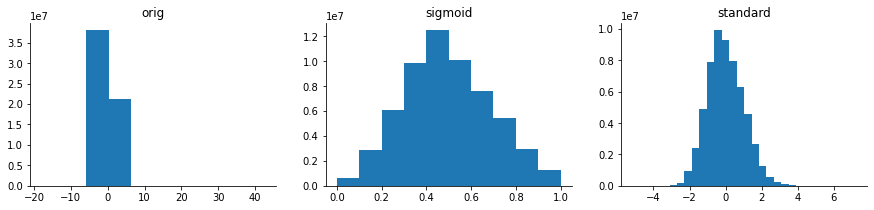

In [28]:
fig = plt.figure(figsize=(15,3))
fig.add_subplot(1,3,1)
plt.hist(energy.flatten());
plt.title('orig')
fig.add_subplot(1,3,2)
plt.hist(sigmoid_energy.flatten());
plt.title('sigmoid')
fig.add_subplot(1,3,3)
plt.hist(standard_energy.flatten(), bins=30);
plt.title('standard')
sns.despine()

### Run PCA

In [29]:
pca = PCA(n_components=100)
pcs = pca.fit_transform(standard_energy)

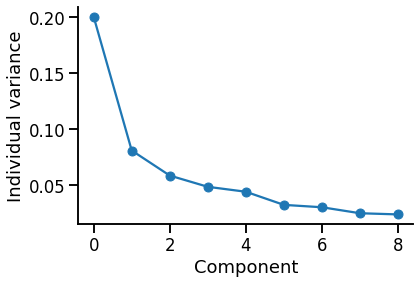

In [30]:
#Plotting the Cumulative Summation of the Explained Variance
sns.set_context("talk")
plt.plot(pca.explained_variance_ratio_[:9], 'o', linestyle="-")
plt.xlabel('Component')
plt.ylabel('Individual variance') 
sns.despine()

In [ ]:
np.save(data_dir + 'results/gene_expression/pca_components.npy', pcs)

### Save first 4 PCAs as images and plot

In [31]:
mask_img = nb.load(data_dir + 'allen_atlas/cortex_mask_tight_200um.nii.gz')
mask = np.array(mask_img.dataobj)
aff = mask_img.affine
hdr = mask_img.header

In [ ]:
pca_img = np.zeros((mask.shape[0], mask.shape[1], mask.shape[2], 4))
for p in range(4):
    pca_img[:,:,:,p] = np.array(masker.inverse_transform(pcs[:,p]).dataobj)
nb.save(nb.Nifti1Image(pca_img, aff, hdr), data_dir + 'results/gene_expression/pca_img.nii.gz')

In [33]:
x=30
y=12
z=20

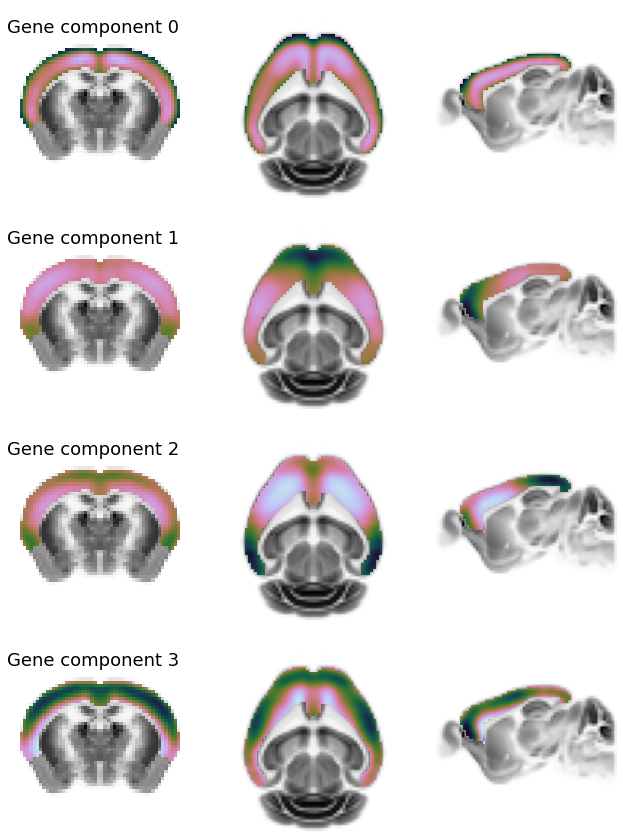

In [38]:
template = np.array(nb.load(data_dir+'allen_atlas/template_200um.nii.gz').dataobj)
gradients = np.array(nb.load(data_dir + 'results/gene_expression/pca_img.nii.gz').dataobj)
fig = plt.figure(figsize=(9,12))
for g in range(4):
    
    gradient = gradients[:,:,:,g]
    gradient[gene_mask_thr==0] = np.nan
    vmax = np.max([np.abs(np.nanmin(gradient)), np.abs(np.nanmax(gradient))])
    vmin = -vmax
    
    template_img = [template[x,:,:], template[:,y,:], template[:,:,z].T]
    gradient_img = [gradient[x,:,:], gradient[:,y,:], gradient[:,:,z].T]
    
    for i in range(3):
        
        fig.add_subplot(4,3,(g*3+(i+1)))
        plt.imshow(template_img[i],  cmap='Greys', aspect='equal');
        plt.imshow(gradient_img[i],  cmap="cubehelix_r", aspect='equal', vmin=vmin, vmax=vmax);
        if i == 0:
            plt.title('Gene component %s' %g, loc='left')
        plt.axis('off');

plt.tight_layout()

In [ ]:
g1 = pca_img[:,:,:,0]
pca_img[:,:,:,p] = np.array(masker.inverse_transform(pcs[:,p]).dataobj)
nb.save(nb.Nifti1Image(g1, aff), data_dir + 'results/gene_expression/g1_viz.nii.gz')

### Calculate Loading of individual Genes to PCs

In [ ]:
loading_matrix = (pca.components_.T * np.sqrt(pca.explained_variance_))[:,:4]

In [ ]:
loading_df = pd.DataFrame(columns=['Gene Symbol', 'Entrez Gene ID', 'PC1', 'PC2', 'PC3', 'PC4'])
loading_df['Entrez Gene ID'] = np.asarray(pd.read_csv(data_dir + 'allen_atlas/gene_expression/energy.csv', 
                                                      usecols=[0])).squeeze()
for e in range(len(loading_df)):
    loading_df.loc[e,'Gene Symbol']=df[df['Entrez Gene ID']==loading_df.loc[e,'Entrez Gene ID']]['Gene Symbol'].values[0]
    
loading_df.loc[:,'PC1':'PC4'] = loading_matrix

loading_df.to_csv(data_dir + 'results/gene_expression/loading.csv')

In [ ]:
for i in range(4):
    np.savetxt(data_dir + 'results/gene_expression/PC{}_loading_pos.txt'.format(i+1), 
               np.asarray(loading_df.sort_values(by='PC{}'.format(i+1), ascending=False)['Gene Symbol']), 
               fmt='%s')

In [ ]:
for i in range(4):
    np.savetxt(data_dir + 'results/gene_expression/PC{}_loading_neg.txt'.format(i+1), 
               np.asarray(loading_df.sort_values(by='PC{}'.format(i+1), ascending=True)['Gene Symbol']), 
               fmt='%s')

### Correlate 4 PCs with 6 Gradients

In [41]:
gradients = io_mesh.load_mesh(data_dir+'results/embedding/embed_sampled_mesh.vtk')['data']
pcs = io_mesh.load_mesh(data_dir+'results/gene_expression/pcs_mesh.vtk')['data']
cortex = np.where(gradients[:,0]!=0)[0]

In [45]:
for g in range(6):
    for p in [1,2,3]:
        rs = []
        surrogates = np.load(data_dir + 'results/null_models/surface/surrogates/surf{}_surrogates.npy'.format(g))
        for s in range(10000):
            r_val, _ = stats.spearmanr(surrogates[s,:], pcs[:,p][cortex])
            rs.append(r_val)
    
        r_val, _ = stats.spearmanr(gradients[:,g][cortex], pcs[:,p][cortex])
        p_val = np.where(np.abs(rs)>=np.abs(r_val))[0].shape[0] / (len(rs)+1) * 18
        if p_val <= 0.05:
            print('Gradient {}, PC {}: Spearman r={:.2f}, p={:.4f}'.format(g+1, p+1, r_val, p_val))

Gradient 3, PC 3: Spearman r=-0.71, p=0.0036
Gradient 5, PC 2: Spearman r=0.71, p=0.0000


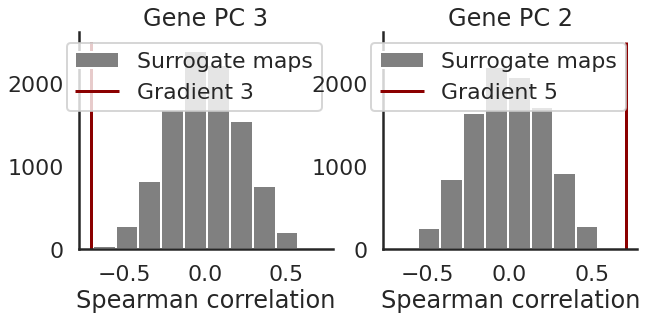

In [46]:
sns.set_style('white')
sns.set_context('poster')
fig = plt.figure(figsize=(10,4))

idx=1
for g,p in [(2,2), (4,1)]:

    rs = []
    surrogates = np.load(data_dir + 'results/null_models/surface/surrogates/surf{}_surrogates.npy'.format(g))
    for s in range(10000):
        r_val, _ = stats.spearmanr(surrogates[s,:], pcs[:,p][cortex])
        rs.append(r_val)

    r_val, _ = stats.spearmanr(gradients[:,g][cortex], pcs[:,p][cortex])
    p_val = np.where(np.abs(rs)>=np.abs(r_val))[0].shape[0] / (len(rs)+1)

    fig.add_subplot(1,2,idx)
    idx+=1
    plt.hist(rs, color='grey', label='Surrogate maps')
    plt.vlines(r_val, 0,2500, color='darkred', label='Gradient {}'.format(g+1))
    plt.xlabel('Spearman correlation')
    plt.title('Gene PC {}'.format(p+1))
    plt.legend()
    sns.despine()

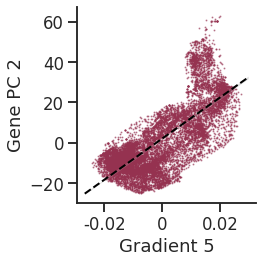

In [47]:
sns.set_style('ticks')
sns.set_context('talk')
fig = plt.figure(figsize=(4,4))
c = sns.color_palette('twilight_shifted', 10)[-2]

sns.regplot(gradients[:,4][cortex], pcs[:,1][cortex], 
            fit_reg=True,
            line_kws={'color':'black', 'linewidth':2, 
                      'linestyle':'--'},
            scatter_kws={'alpha':0.5, 's':1, 'color':c},  
            truncate=False)
plt.xticks([-0.02, 0, 0.02], [-0.02, 0, 0.02])
plt.xlabel('Gradient 5')
plt.ylabel('Gene PC 2')
sns.despine()
plt.tight_layout()
plt.savefig('/home/julia/Documents/projects/mouse_gradients/figures/pics/Gradient5_Genes2.svg')

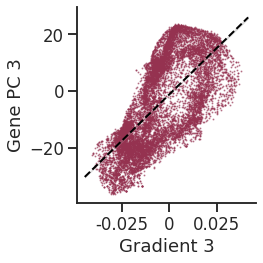

In [48]:
sns.set_style('ticks')
sns.set_context('talk')
fig = plt.figure(figsize=(4,4))
c = sns.color_palette('twilight_shifted', 10)[-2]

sns.regplot(gradients[:,2][cortex], -pcs[:,2][cortex], 
            line_kws={'color':'black', 'linewidth':2, 
                      'linestyle':'--'},
            scatter_kws={'alpha':0.5, 's':1, 'color':c},
            fit_reg=True,
            truncate=False)
plt.xticks([-0.025, 0, 0.025], [-0.025, 0, 0.025])
plt.xlabel('Gradient 3')
plt.ylabel('Gene PC 3')
sns.despine()
plt.tight_layout()
plt.savefig('/home/julia/Documents/projects/mouse_gradients/figures/pics/Gradient3_Genes3.svg')